# Start

- Import required libraries
- Import database

In [ ]:
!git clone https://github.com/cypr1ss/machine-learning-algorithms-for-predicting-the-oxidation-potential-of-glycerol.git

Cloning into 'machine-learning-algorithms-for-predicting-the-oxidation-potential-of-glycerol'...
remote: Enumerating objects: 8, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 8 (delta 1), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (8/8), 2.28 MiB | 5.15 MiB/s, done.
Resolving deltas: 100% (1/1), done.


In [ ]:
!pip install scikeras
import matplotlib.ticker as ticker
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from matplotlib.ticker import PercentFormatter
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV, KFold
from sklearn.metrics import mean_squared_error, r2_score, make_scorer, mean_absolute_error
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from matplotlib.ticker import MultipleLocator
from sklearn import linear_model
from sklearn.linear_model import LinearRegression, BayesianRidge, Lasso, Ridge
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor, AdaBoostRegressor, HistGradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
import tensorflow as tf
from tensorflow.keras import layers
!pip install shap -q
import shap
from shap.models import Model
import shap
from scipy.stats import t, randint, uniform, loguniform
from sklearn.inspection import permutation_importance
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.models import Sequential
!pip install hmmlearn -q
from hmmlearn.hmm import GaussianHMM
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.tree import DecisionTreeRegressor
!pip install scikeras[tensorflow]
from scikeras.wrappers import KerasRegressor
from mlxtend.regressor import StackingRegressor
!pip install catboost -q
import catboost as cb
from matplotlib.colors import LinearSegmentedColormap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.6/164.6 kB 2.4 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.7 MB/s eta 0:00:00


In [ ]:
data = pd.read_csv('/content/machine-learning-algorithms-for-predicting-the-oxidation-potential-of-glycerol/glycerol_oxidation_dataset.csv', encoding = 'latin-1')

# Dataset

- Gap filling
- Definition of the data used

In [ ]:
# Replace NaNs in numerical columns with the column mean.
numeric_cols = data.select_dtypes(include=[np.number]).columns
data[numeric_cols] = data[numeric_cols].apply(lambda col: col.fillna(col.mean()), axis=0)

In [ ]:
data_analysis = data[['deposited_material', 'deposited_material(elements)', 'RE','WE', 'WE(element)','Electrolyte','pH', 'onset_pot', 'ox_pot', 'ox_onset', 'current_density', 'scan_rate' ]]

# Models


## Oxidation Potential

In [ ]:
data_features_oxidation = pd.read_csv('machine-learning-algorithms-for-predicting-the-oxidation-potential-of-glycerol/data_features_oxidation.csv', encoding = 'latin-1')
X = data_features_oxidation[['rGO', 'OH', 'WE_FTO', 'ox_onset', 'WE_CC', 'E2_av','E3', 'WE_Au', 'WE_Ni', 'WE_Pt', 'E2', 'E1_av', 'Org', 'WE_GCD', 'WE_SELF', 'A_concentration', 'E4', 'E1', 'G', 'WE_CP', 'WE_GE', 'CNT', 'scan_rate', 'WE_GCE', 'RE', 'El_conc', 'pH', 'Electrolyte', 'E3/4_av']]
y = data_features_oxidation['ox_pot']

### Random Forest - OX

In [ ]:
# random state was defaulted to 50 for data splitting
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 50)

model = RandomForestRegressor(random_state = 7)

#aqui ele usara o dado de treino para ajustar o modelo
model.fit(X_train, y_train)

#aqui ele testará a predição a partir dos dados de teste
y_pred= model.predict(X_test)

#aqui vai comparar o valor de teste real e o predito pelo modelo
reg_model_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
reg_model_diff

#e aqui são as métricas que ele usa para averiguar o erro. Vamos dar atenção principalmente para o R² e o RMSE
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print('Mean Absolute Error:', mae)
print('Mean Square Error:', mse)

print('Root Mean Square Error:', rmse)
print('R2 Score:', r2)

Mean Absolute Error: 0.10811064354838712
Mean Square Error: 0.02120984597170894
Root Mean Square Error: 0.14563600506642901
R2 Score: 0.8158273443504491


Below, I search only for the different random states of the model. This search is performed based on the best models found through RandomizeSearchCV

In [ ]:
best_results = []

for random_state in range(1, 100):


    model = RandomForestRegressor(n_estimators = 92, min_samples_split = 2, min_samples_leaf = 1, max_features = 'sqrt', criterion='squared_error', bootstrap = False, random_state = random_state, max_depth = 28)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    mae = metrics.mean_absolute_error(y_test, y_pred)
    mse = metrics.mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    best_results.append({'Random State': random_state, 'RMSE': rmse, 'R2 Score': r2})

results_df = pd.DataFrame(best_results)


sorted_results = results_df.sort_values(by='RMSE', ascending=True)
display(sorted_results)

Random State      RMSE  R2 Score
70            71  0.138153  0.834267
27            28  0.139327  0.831437
49            50  0.140294  0.829091
44            45  0.142016  0.824870
62            63  0.142079  0.824715
..           ...       ...       ...
83            84  0.156523  0.787261
51            52  0.156714  0.786744
26            27  0.157106  0.785675
75            76  0.157638  0.784222
7              8  0.157901  0.783501

[99 rows x 3 columns]

In [ ]:
best_20_ox = pd.DataFrame(sorted_results.head(20))
best_20_ox = best_20_ox.reset_index(drop=True)
display(best_20_ox)

Random State      RMSE  R2 Score
0             71  0.138153  0.834267
1             28  0.139327  0.831437
2             50  0.140294  0.829091
3             45  0.142016  0.824870
4             63  0.142079  0.824715
5             66  0.143185  0.821975
6             38  0.143214  0.821902
7             47  0.143317  0.821646
8             59  0.143517  0.821148
9             25  0.143523  0.821133
10            12  0.143570  0.821015
11            64  0.143703  0.820684
12            19  0.144415  0.818902
13            96  0.144801  0.817933
14            24  0.144829  0.817863
15            85  0.145040  0.817331
16            18  0.145126  0.817115
17            46  0.145301  0.816675
18            22  0.145330  0.816600
19            55  0.145555  0.816033

In [ ]:
predicted = []

for i in range (0,20) :

  model = RandomForestRegressor(n_estimators = 92, min_samples_split = 2, min_samples_leaf = 1, max_features = 'sqrt', criterion='squared_error', bootstrap = False, random_state=best_20_ox['Random State'][i], max_depth = 28)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  predicted.append(y_pred)

predicted_result = pd.DataFrame(predicted)

In [ ]:
results = []  # Initialize results as a list

for i in range(1, 21):
    selected_rows = predicted_result.iloc[0:i]

    sum_rows = selected_rows.sum(axis=0)
    num_rows = selected_rows.shape[0]

    mean_values_rows = sum_rows / num_rows

    mae = metrics.mean_absolute_error(y_test, mean_values_rows)
    mse = metrics.mean_squared_error(y_test, mean_values_rows)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, mean_values_rows)

    results.append({'Number': i, 'RMSE': rmse, 'R2 Score': r2})  # Append to the list

results = pd.DataFrame(results)  # Create a DataFrame outside the loop

<Figure size 800x500 with 0 Axes>

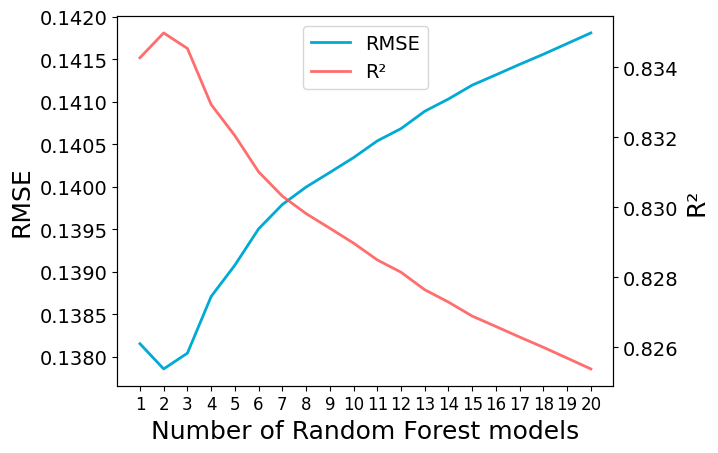

In [ ]:
x = results['Number']
y1 = results['RMSE']
y2 = results['R2 Score']

plt.figure(figsize=(8, 5))

fig, ax1 = plt.subplots()

line1 = ax1.plot(x, y1, color='#00aad4ff', label='RMSE', linewidth=2)
ax1.set_xlabel('Number of Random Forest models', fontsize=18)
ax1.set_ylabel('RMSE', fontsize=18)
ax1.tick_params(axis='y', labelsize=14)

ax2 = ax1.twinx()
line2 = ax2.plot(x, y2, color='#ff5757dd', label='R²', linewidth=2)
ax2.set_ylabel('R²', fontsize=18)
ax2.tick_params(axis='y', labelsize=14)

lines = line1 + line2
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc='upper center', fontsize=14)

ax1.set_xticks(x)
ax1.set_xticklabels(x.astype(int), fontsize=12)

plt.show()


In [ ]:
predicted = []

for i in range (0,4) :

  model = RandomForestRegressor(n_estimators = 92, min_samples_split = 2, min_samples_leaf = 1, max_features = 'sqrt', criterion='squared_error', bootstrap = False, random_state=best_20_ox['Random State'][i], max_depth = 28)
  model.fit(X_train, y_train)

  y_pred = model.predict(X_test)

  predicted.append(y_pred)

predicted_result = pd.DataFrame(predicted)

In [ ]:

selected_rows = predicted_result.copy()

sum_rows = selected_rows.sum(axis=0)
num_rows = selected_rows.shape[0]

mean_values_rows = sum_rows / num_rows

mae = metrics.mean_absolute_error(y_test, mean_values_rows)
mse = metrics.mean_squared_error(y_test, mean_values_rows)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, mean_values_rows)

In [ ]:

print('Mean Absolute Error:', mae)
print('Mean Square Error:', mse)

print('Root Mean Square Error:', rmse)
print('R2 Score:', r2)

Mean Absolute Error: 0.09988245064428475
Mean Square Error: 0.01924003145260241
Root Mean Square Error: 0.13870844045191486
R2 Score: 0.8329319462228436


In [ ]:

df = pd.DataFrame(y_test)
df = df.reset_index(drop=True)

df_dif = pd.DataFrame(mean_values_rows)
df_dif = df_dif.reset_index(drop=True)

# Adding the prediction to the original DataFrame
df['Predicted value'] = df_dif

# Converting columns to numeric values
df.iloc[:, 0] = pd.to_numeric(df.iloc[:, 0], errors='coerce')
df['Predicted value'] = pd.to_numeric(df['Predicted value'], errors='coerce')

# Calculating the absolute difference
diferenca_absoluta = (df.iloc[:, 0] - df['Predicted value']).abs()

# Sorting the DataFrame by absolute difference
df['Absolute Error'] = diferenca_absoluta
df_ordenado = df.sort_values(by='Absolute Error')

# Extracting sorted values
mean_values_rows = df_ordenado['Predicted value']
y_test = df_ordenado.iloc[:, 0]

real_value = y_test
pred_value = mean_values_rows

# Displaying results
print("Valores reais ordenados:")
print(real_value.head())

print("Valores preditos ordenados:")
print(pred_value.head())

# Calculating evaluation metrics
mae = metrics.mean_absolute_error(real_value, pred_value)
mse = metrics.mean_squared_error(real_value, pred_value)
rmse = np.sqrt(metrics.mean_squared_error(real_value, pred_value))
r2 = r2_score(real_value, pred_value)

print('Mean Absolute Error:', mae)
print('Mean Square Error:', mse)
print('Root Mean Square Error:', rmse)
print('R2 Score:', r2)


Valores reais ordenados:
11    0.00000
60    0.97300
51    0.73300
37    0.07400
29    0.19439
Name: ox_pot, dtype: float64
Valores preditos ordenados:
11   -0.000223
60    0.972000
51    0.735456
37    0.077093
29    0.199094
Name: Predicted value, dtype: float64
Mean Absolute Error: 0.09988245064428475
Mean Square Error: 0.01924003145260242
Root Mean Square Error: 0.13870844045191488
R2 Score: 0.8329319462228435


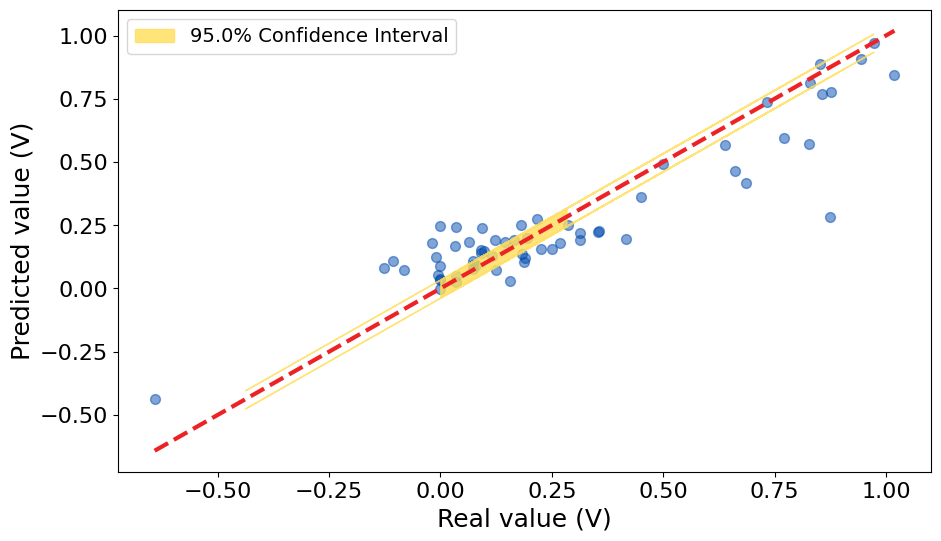

In [ ]:
# Supondo que você já tenha os arrays real_value e pred_value definidos

# Cria uma figura
plt.figure(figsize=(10.5, 6))

# Scatter plot para todas as previsões
plt.scatter(real_value, pred_value, c='#004aad', alpha=0.5, s=50)

# Linha diagonal
plt.plot([min(real_value), max(real_value)], [min(real_value), max(real_value)], '--', c='#ed2225', linewidth=3)

# Confidence level (e.g., 95%)
confidence_level = 0.95
alpha = 1 - confidence_level

# Calculate standard errors of coefficients
se_slope = np.sqrt(np.mean((real_value - pred_value) ** 2) / (len(real_value) - 2)) / np.std(pred_value)
se_intercept = se_slope * np.sqrt(np.mean(pred_value**2))

# Calculate t-critical value
t_critical = t.ppf(1 - alpha / 2, df=len(real_value) - 2)

# Calculate confidence intervals for slope and intercept
slope_interval = t_critical * se_slope
intercept_interval = t_critical * se_intercept

# Generate predictions and prediction intervals
lower_bound = pred_value - t_critical * np.sqrt(np.mean((real_value - pred_value) ** 2) / (len(real_value) - 2))
upper_bound = pred_value + t_critical * np.sqrt(np.mean((real_value - pred_value) ** 2) / (len(real_value) - 2))

# Configurações do gráfico
plt.xlabel('Real value (V)', fontsize=18)
plt.ylabel('Predicted value (V)', fontsize=18)
plt.fill_between(pred_value, lower_bound, upper_bound, color='#ffde59', alpha=0.8, label=f'{confidence_level * 100}% Confidence Interval')
plt.tick_params(axis='both', which='major', labelsize=16)
plt.legend(fontsize=14)
plt.savefig("grafico_com_barras_de_erro.png", bbox_inches='tight', transparent=True)
plt.show()


In [ ]:

# Feature Importance

feature_importances_list = []

random_state_values = [45]

for random_state in random_state_values:
    rf = RandomForestRegressor(n_estimators = 92, min_samples_split = 2, min_samples_leaf = 1, max_features = 'sqrt', criterion='squared_error', bootstrap = False, random_state = random_state, max_depth = 28)

    rf.fit(X, y)

    importances = rf.feature_importances_

    feature_importances_list.append(rf.feature_importances_)

feature_importances_matrix = np.array(feature_importances_list)

average_feature_importances = np.mean(feature_importances_matrix, axis=0)


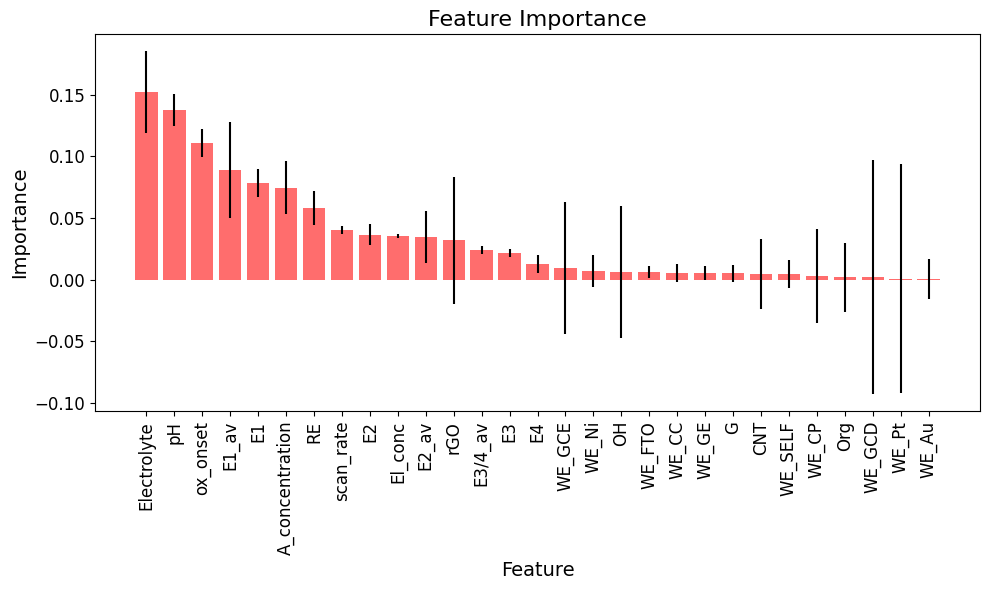

In [ ]:
rf.fit(X, y)

# Getting the feature importances
importances = rf.feature_importances_

# Creating a DataFrame to store the feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Sorting the features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Calculating the standard deviation of feature importances across trees
std_deviation = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
feature_importance_df['Std_Dev'] = std_deviation

# Graph configurations
plt.figure(figsize=(10, 6))
bar_color = '#ff5757dd'  # Bar color

# Plotting the bar chart
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'], color=bar_color, yerr=feature_importance_df['Std_Dev'])
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Feature', fontsize=14)
plt.ylabel('Importance', fontsize=14)
plt.title('Feature Importance', fontsize=16)
plt.tight_layout()
plt.show()


In [ ]:
# SHAP

model = RandomForestRegressor(n_estimators = 92, min_samples_split = 2, min_samples_leaf = 1, max_features = 'sqrt', criterion='squared_error', bootstrap = False, random_state = random_state, max_depth = 28)
model.fit(X_train, y_train)

# Initializing SHAP
explainer = shap.Explainer(model)

# Calculating SHAP values
shap_values = explainer.shap_values(X_test)

# Initializes SHAP
shap.initjs()

# Generates the force plot using the 0th instance from X_test as an example
shap.force_plot(explainer.expected_value, shap_values[0], X_test.iloc[0])


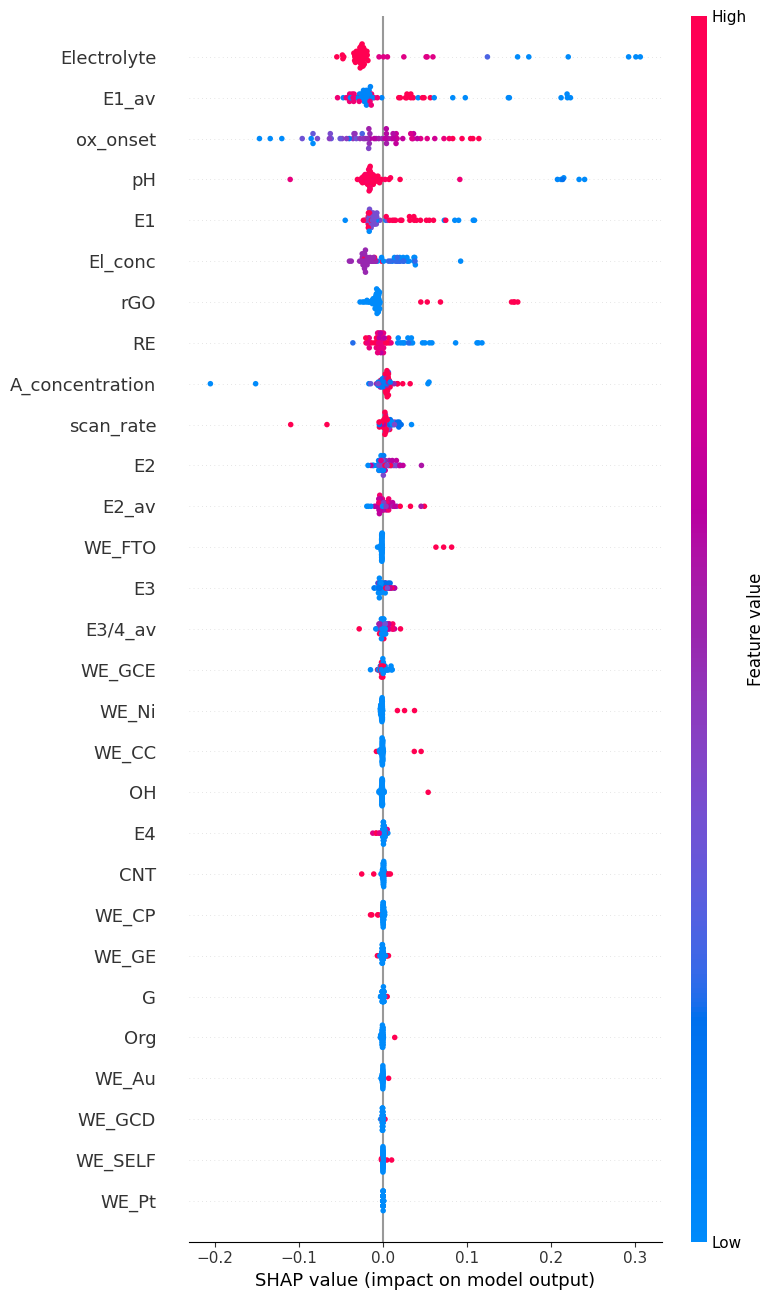

In [ ]:
explainer = shap.Explainer(model)
shap_values = explainer(X_test)

num_features = 10

shap.summary_plot(shap_values, X_test, max_display=num_features)

Abaixo, busco no maior número de hiperparâmetros possíveis

In [ ]:
# Defining the parameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': [int(x) for x in np.linspace(start=10, stop=400, num=20)],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [int(x) for x in np.linspace(1, 50, num=10)] + [None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'random_state':  [x for x in (0, 100, 10)],
    'criterion': ['friedman_mse', 'absolute_error', 'squared_error']
}

# Configuring the RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=RandomForestRegressor(),
    param_distributions=param_dist,
    n_iter=1000,
    cv=5,
    verbose=1,
    n_jobs=1
)

# Running the RandomizedSearchCV
random_search.fit(X_train, y_train)

# Extracting the best parameters and the model
best_params = random_search.best_params_
best_model = random_search.best_estimator_

# Making predictions on the test set
y_pred = best_model.predict(X_test)

# Calculating performance metrics
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Displaying the results
print('Best parameters:', best_params)
print('Mean Absolute Error:', mae)
print('Mean Square Error:', mse)
print('Root Mean Square Error:', rmse)
print('R2 Score:', r2)


Fitting 5 folds for each of 1000 candidates, totalling 5000 fits
Best parameters: {'random_state': 10, 'n_estimators': 10, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 44, 'criterion': 'squared_error', 'bootstrap': False}
Mean Absolute Error: 0.1174668064516129
Mean Square Error: 0.02781836451635483
Root Mean Square Error: 0.1667883824382107
R2 Score: 0.7584432213398342


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [ ]:
# Fitting 5 folds for each of 1000 candidates, totalling 5000 fits
# Best parameters: {'random_state': 10, 'n_estimators': 92, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 28, 'criterion': 'squared_error', 'bootstrap': False}
# Mean Absolute Error: 0.1012676218690926
# Mean Square Error: 0.020520784133879862
# Root Mean Square Error: 0.14325077358911492
# R2 Score: 0.8195087279249134
# /usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
#   _data = np.array(data, dtype=dtype, copy=copy,

In [ ]:
# BEST MODEL FOR SELECTED FEATURES POSSIBLE
# For now, we will keep the "random_state=100" as default

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

# Here we will choose the model as Random Forest Regression, and keep 'random_state' as 7 for now

best_rf_params = {'random_state': 10, 'n_estimators': 92, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 28, 'criterion': 'squared_error', 'bootstrap': False}
best_rf_model = RandomForestRegressor(**best_rf_params)

# Here, we will use the training data to fit the model
best_rf_model.fit(X_train, y_train)

# Here, the model will predict using the test data
y_pred = best_rf_model.predict(X_test)

# Here, we will compare the actual and predicted values from the test data
reg_model_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
reg_model_diff

# These are the metrics used to evaluate the error. We will focus mainly on R² and RMSE
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print('Mean Absolute Error:', mae)
print('Mean Square Error:', mse)

print('Root Mean Square Error:', rmse)
print('R2 Score:', r2)


Mean Absolute Error: 0.10254992092683506
Mean Square Error: 0.021371888953600895
Root Mean Square Error: 0.14619127523077735
R2 Score: 0.8144202673568575


### Decision tree

In [ ]:
results = []

# Defining the range of values for random_state
random_states = range(1, 100)  # or any other range you desire

for rs_split in random_states:

    # Choosing the model as Decision Tree Regressor
    tree_reg = DecisionTreeRegressor(random_state=rs_split)

    # Fitting the model with the training data
    tree_reg.fit(X_train, y_train)

    # Making predictions with the test data
    y_pred_tree = tree_reg.predict(X_test)

    # Calculating the error metrics
    mae_tree = metrics.mean_absolute_error(y_test, y_pred_tree)
    mse_tree = metrics.mean_squared_error(y_test, y_pred_tree)
    rmse_tree = np.sqrt(metrics.mean_squared_error(y_test, y_pred_tree))
    r2_tree = r2_score(y_test, y_pred_tree)

    # Storing the results
    results.append((rs_split, mae_tree, mse_tree, rmse_tree, r2_tree))

# Converting the results to a DataFrame
results_df = pd.DataFrame(results, columns=['Random State', 'MAE', 'MSE', 'RMSE', 'R2'])

# Selecting the top 10 highest R2 values
top_10_r2 = results_df.nlargest(10, 'R2')

# Selecting the top 10 lowest RMSE values
top_10_rmse = results_df.nsmallest(10, 'RMSE')

# Displaying the results
print("Top 10 highest R2 values:")
print(top_10_r2)

print("\nTop 10 lowest RMSE values:")
print(top_10_rmse)


Top 10 melhores valores de R2:
    Random State       MAE       MSE      RMSE        R2
71            72  0.112458  0.030897  0.175776  0.731708
45            46  0.117266  0.033602  0.183309  0.708220
84            85  0.117852  0.033986  0.184352  0.704891
20            21  0.122790  0.037101  0.192617  0.677836
95            96  0.125918  0.037819  0.194472  0.671602
12            13  0.126363  0.038062  0.195095  0.669492
91            92  0.124907  0.038236  0.195540  0.667985
86            87  0.128535  0.038247  0.195568  0.667889
58            59  0.127995  0.038619  0.196518  0.664654
28            29  0.127821  0.038675  0.196659  0.664173

Top 10 melhores valores de RMSE:
    Random State       MAE       MSE      RMSE        R2
71            72  0.112458  0.030897  0.175776  0.731708
45            46  0.117266  0.033602  0.183309  0.708220
84            85  0.117852  0.033986  0.184352  0.704891
20            21  0.122790  0.037101  0.192617  0.677836
95            96  0.125

In [ ]:
# Here we will choose the model as Random Forest Regression, and the 'random_state' will remain 7 for now
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)
tree_model = DecisionTreeRegressor(random_state = 72)

# Here, it will use the training data to fit the model
tree_model.fit(X_train, y_train)

# Here, it will test the prediction using the test data
y_pred = tree_model.predict(X_test)

# Here it will compare the actual test values and the predicted ones by the model
reg_model_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
reg_model_diff

# And here are the metrics it uses to assess the error. We will focus mainly on R² and RMSE
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print('Mean Absolute Error:', mae)
print('Mean Square Error:', mse)

print('Root Mean Square Error:', rmse)
print('R2 Score:', r2)


Mean Absolute Error: 0.11245806451612902
Mean Square Error: 0.030897299819354834
Root Mean Square Error: 0.1757762777491742
R2 Score: 0.731707728206926


In [ ]:
# Define the model
dt = DecisionTreeRegressor(random_state=73)

# Define the hyperparameter search space with valid values
param_grid = {
    'ccp_alpha': [0.0, 0.01, 0.1, 1.0],
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error'],
    'max_depth': [None, 10, 20, 30, 50, 70, 100],
    'max_features': [None, 'sqrt', 'log2', 0.5, 0.8],
    'max_leaf_nodes': [None, 10, 20, 30, 50, 100],
}

# Define the evaluation metric
scorer = make_scorer(mean_squared_error, greater_is_better=False)

randomize_search = RandomizedSearchCV(estimator=dt, param_distributions=param_grid, n_iter = 100, scoring=scorer, cv=5, n_jobs=1, verbose=1)

# Fit the model
randomize_search.fit(X_train, y_train)

# Best combination of hyperparameters
best_params = randomize_search.best_params_
print(f"Best hyperparameters found: {best_params}")

# Prediction with the best model
best_model = randomize_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calculate RMSE on the test set
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE on the test set: {rmse}")


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Melhores hiperparâmetros encontrados: {'max_leaf_nodes': 30, 'max_features': 'sqrt', 'max_depth': 30, 'criterion': 'friedman_mse', 'ccp_alpha': 0.0}
RMSE no conjunto de teste: 0.1962407907842828


### XGBoost

In [ ]:
# Create the XGBoost model for regression
model = XGBRegressor(objective='reg:squarederror', random_state=0, n_estimators=50, max_depth=None)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Display the model's performance metrics
print('XGBoost Regression Metrics:')
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('R2 Score:', r2)


XGBoost Regression Metrics:
Mean Absolute Error: 0.09804061870333167
Mean Squared Error: 0.01854674914805099
Root Mean Squared Error: 0.1361864499429036
R2 Score: 0.8389519636861664


In [ ]:
param_dist = {
    'learning_rate': uniform(0, 1),  # Learning rate
    'max_depth': randint(3, 10),          # Maximum depth of the tree
    'n_estimators': randint(0, 200),     # Number of trees in the ensemble
    'gamma': uniform(0, 0.5),             # Gamma regularization
    'reg_alpha': uniform(0, 0.5),         # L1 regularization
    'reg_lambda': uniform(0, 0.5),         # L2 regularization
    'random_state': randint(0, 100)
}
# Create the XGBoost model for regression
model = XGBRegressor(objective='reg:squarederror')

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=1000, scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=1)

# Run the random search on the training data
random_search.fit(X_train, y_train)

# Best parameters found
print('Best Parameters:', random_search.best_params_)

# Best model found
best_model = random_search.best_estimator_

# Make predictions with the best model
y_pred = best_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('XGBoost Regression Metrics:')
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('R2 Score:', r2)


Fitting 5 folds for each of 1000 candidates, totalling 5000 fits
Best Parameters: {'gamma': 0.015081630504242216, 'learning_rate': 0.20790643874705117, 'max_depth': 4, 'n_estimators': 130, 'random_state': 30, 'reg_alpha': 0.19236458169745613, 'reg_lambda': 0.207441153795337}
XGBoost Regression Metrics:
Mean Absolute Error: 0.11257008473984656
Mean Squared Error: 0.022549295514755364
Root Mean Squared Error: 0.1501642284792066
R2 Score: 0.8041964263428177


### Linear Regression


In [ ]:
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_test)

# Display the results
print("Evaluation Metrics:")
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R^2 Score:", r2)

# Regression coefficients
print("\nCoefficient (slope):", model.coef_[0])
print("Intercept:", model.intercept_)


Métricas de Avaliação:
Mean Absolute Error (MAE): 0.1774321258107203
Mean Squared Error (MSE): 0.055326738922086886
Root Mean Squared Error (RMSE): 0.23521636618672367
R^2 Score: 0.5195781973475075

Coeficiente (slope): 0.24362161248371494
Intercepto: 1.0530053685129497


### Gradient Boost Regression

In [ ]:
# Instantiating the Gradient Boosting Regressor model
gb_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=50)

# Training the model
gb_regressor.fit(X_train, y_train)

# Making predictions on the test set
y_pred = gb_regressor.predict(X_test)

# Calculating evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # RMSE
r2 = r2_score(y_test, y_pred)

# Printing the evaluation metrics
print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)
print('R2 Score:', r2)


Mean Squared Error (MSE): 0.01986849632580678
Root Mean Squared Error (RMSE): 0.14095565375609018
R2 Score: 0.8274747616287218


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
# Defining the parameter grid
param_grid = {
    'random_state': list(range(0, 101, 10)),
    'max_depth': randint(1, 100),
    'n_estimators': randint(1, 200),
    'learning_rate': uniform(0, 1)
}

# Instantiating the Gradient Boosting Regressor model
gb_regressor = GradientBoostingRegressor()

# Instantiating the GridSearchCV
randomize_search = RandomizedSearchCV(estimator=gb_regressor, param_distributions=param_grid, cv=5, n_iter=1000, n_jobs=1, verbose=1, scoring='neg_mean_squared_error')

# Training the GridSearchCV
randomize_search.fit(X_train, y_train)

# Getting the best parameters
best_params = randomize_search.best_params_
print("Best parameters found by Randomize Search:", best_params)

# Training the model with the best parameters
best_gb_regressor = GradientBoostingRegressor(**best_params)
best_gb_regressor.fit(X_train, y_train)

# Making predictions on the test set
y_pred = best_gb_regressor.predict(X_test)

# Calculating evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # RMSE
r2 = r2_score(y_test, y_pred)

# Printing the evaluation metrics
print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)
print('R2 Score:', r2)


Fitting 5 folds for each of 1000 candidates, totalling 5000 fits
Best parameters found by Randomize Search: {'learning_rate': 0.07540073089095167, 'max_depth': 2, 'n_estimators': 199, 'random_state': 100}
Mean Squared Error (MSE): 0.027177566426246514
Root Mean Squared Error (RMSE): 0.1648561992351107
R2 Score: 0.7640074996541524


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
best_Gb_regressor_model =GradientBoostingRegressor(learning_rate = 0.1, max_depth = 3, n_estimators = 100, random_state = 50)

###Bayesian Ridge Regression

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Mean Squared Error (MSE): 0.05270883694363408
Root Mean Squared Error (RMSE): 0.22958405202372853
R2 Score: 0.542310373726581


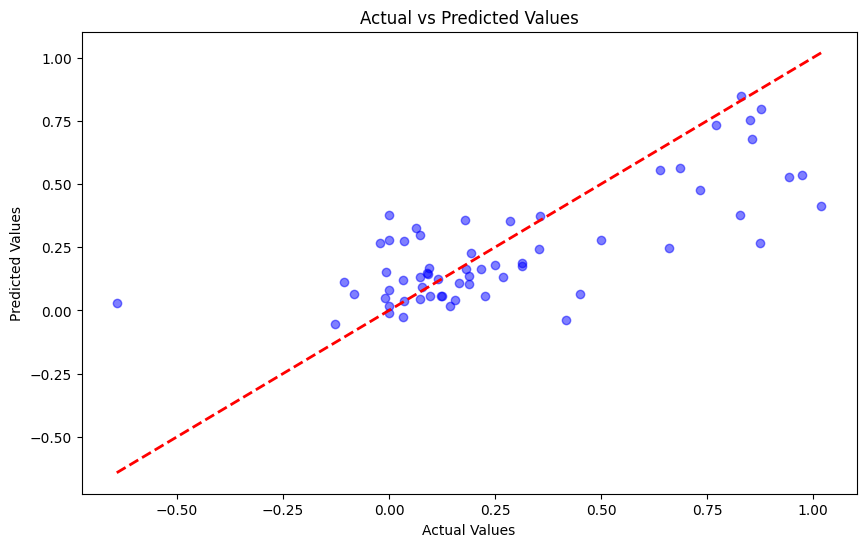

In [ ]:
# Instantiating the Bayesian Ridge Regression model
bayesian_ridge = BayesianRidge()

# Training the model
bayesian_ridge.fit(X_train, y_train)

# Making predictions on the test set
y_pred = bayesian_ridge.predict(X_test)

# Calculating evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # RMSE
r2 = r2_score(y_test, y_pred)

# Printing the evaluation metrics
print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)
print('R2 Score:', r2)

# Plotting predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()


In [ ]:
# Define the Bayesian Ridge model
model = BayesianRidge()

# Define the hyperparameter grid for RandomizedSearchCV
param_dist = {
    'alpha_1': loguniform(1e-9, 1e-3),
    'alpha_2': loguniform(1e-9, 1e-3),
    'lambda_1': loguniform(1e-9, 1e-3),
    'lambda_2': loguniform(1e-9, 1e-3)
}

# Use RandomizedSearchCV to find the best hyperparameters
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=1000, cv=5, verbose=1, random_state=42)
random_search.fit(X_train, y_train)

# Best model found
best_model = random_search.best_estimator_

# Make predictions with the best model
y_pred = best_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('Bayesian Ridge Regression Metrics:')
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('R2 Score:', r2)

print('Best Parameters:', random_search.best_params_)


Fitting 5 folds for each of 1000 candidates, totalling 5000 fits
Bayesian Ridge Regression Metrics:
Mean Absolute Error: 0.16336857292493911
Mean Squared Error: 0.05267822964205849
Root Mean Squared Error: 0.22951738418267686
R2 Score: 0.5425761478402149
Best Parameters: {'alpha_1': 2.1789786747300817e-09, 'alpha_2': 0.00015428874893266074, 'lambda_1': 7.540602622541999e-05, 'lambda_2': 0.0009961071093253036}


In [ ]:
best_BRR_model = BayesianRidge(alpha_1 = 2.1789786747300817e-09,  alpha_2 = 0.00015428874893266074, lambda_1 = 7.540602622541999e-05, lambda_2 =  0.0009961071093253036)

### Gaussian Process Regression

In [ ]:
# Define the kernel for the GPR
kernel = RBF(length_scale=1.0, length_scale_bounds=(1e-1, 10.0)) + WhiteKernel(noise_level=1, noise_level_bounds=(1e-3, 1e0))

# Create the GPR model with the defined kernel
model = GaussianProcessRegressor(kernel=kernel, random_state=42)

# Train the model with the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred, sigma = model.predict(X_test, return_std=True)

# Calculating evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # RMSE
r2 = r2_score(y_test, y_pred)

# Printing the evaluation metrics
print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)
print('R2 Score:', r2)


Mean Squared Error (MSE): 0.08397804157782039
Root Mean Squared Error (RMSE): 0.28978965057058265
R2 Score: 0.2707887198112733


/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__length_scale is close to the specified upper bound 10.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
# Define the hyperparameter grid
param_grid = {
    'kernel': [1.0 * RBF(length_scale=1.0, length_scale_bounds=(1e-1, 10.0)) + WhiteKernel(noise_level=1, noise_level_bounds=(1e-3, 1e0)),
               1.0 * RBF(length_scale=0.5, length_scale_bounds=(1e-2, 1.0)) + WhiteKernel(noise_level=1, noise_level_bounds=(1e-3, 1e0)),
               1.0 * RBF(length_scale=2.0, length_scale_bounds=(1e-1, 20.0)) + WhiteKernel(noise_level=1, noise_level_bounds=(1e-3, 1e0))],
}

# Create the GPR model
model = GaussianProcessRegressor()

# Define the evaluation metric - MSE
scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scorer, cv=5, verbose=1)

# Run GridSearchCV to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Get the model with the best hyperparameters
best_model = grid_search.best_estimator_

# Make predictions on the test data
y_pred = best_model.predict(X_test)

# Calculate evaluation metrics with the best hyperparameters
mse = mean_squared_error(y_test, y_pred)
r2 = best_model.score(X_test, y_test)

print('Best parameters found by GridSearchCV:')
print(grid_search.best_params_)
print('Mean Squared Error (MSE):', mse)
print('R2 Score:', r2)


Fitting 5 folds for each of 3 candidates, totalling 15 fits


/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified upper bound 10.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified upper bound 10.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified upper bound 1.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:452: Converge

Best parameters found by GridSearchCV:
{'kernel': 1**2 * RBF(length_scale=1) + WhiteKernel(noise_level=1)}
Mean Squared Error (MSE): 0.0880137473313022
R2 Score: 0.23574524768845195


In [ ]:
best_GPR_model = GaussianProcessRegressor(kernel=1.0 ** 2 * RBF(length_scale=1.0) + WhiteKernel(noise_level=1))

###  K-Nearest Neighbors Regression (KNN Regression)

In [ ]:
# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the KNN model
knn = KNeighborsRegressor()

# Define the parameter grid for GridSearch
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [20, 30, 40, 50],
    'p': [1, 2]
}

# Use GridSearchCV to find the best hyperparameters
try:
    grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, n_jobs=1, scoring='neg_mean_squared_error')
    grid_search.fit(X_train_scaled, y_train)

    # Best model found
    best_knn = grid_search.best_estimator_

    # Train the model with the best hyperparameters
    best_knn.fit(X_train_scaled, y_train)

    # Make predictions
    y_pred = best_knn.predict(X_test_scaled)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Print the best parameters and evaluation metrics
    print('Best Parameters:', grid_search.best_params_)
    print('Mean Squared Error:', mse)
    print('Root Mean Squared Error:', rmse)
    print('R2 Score:', r2)

except Exception as e:
    print("An error occurred during the grid search process:", str(e))


Best Parameters: {'algorithm': 'auto', 'leaf_size': 20, 'metric': 'manhattan', 'n_neighbors': 7, 'p': 1, 'weights': 'distance'}
Mean Squared Error: 0.04972850023896509
Root Mean Squared Error: 0.2229988794567477
R2 Score: 0.5681897000715659


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [ ]:
best_KNN_model = KNeighborsRegressor(algorithm='auto', leaf_size=20, metric='manhattan', n_neighbors=9, p=1, weights='distance')

### LASSO

Training MSE: 0.05137397639811199
Testing MSE: 0.05051370213659476
Training RMSE: 0.226658281115233
Testing RMSE: 0.2247525353285136
Training R2 Score: 0.487361022161951
Testing R2 Score: 0.5613715120045513


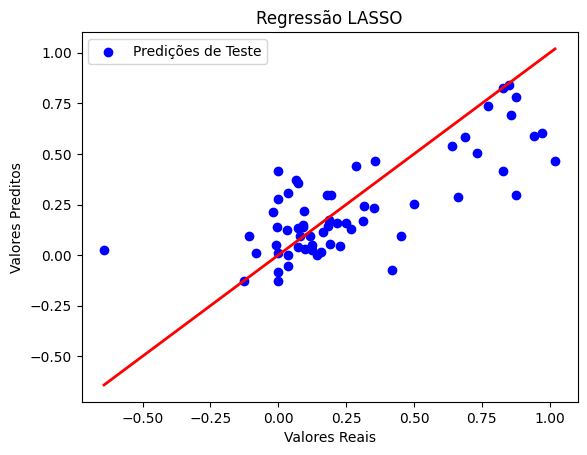

In [ ]:
# Creating the LASSO model
lasso = Lasso(alpha=0.001)

# Training the model
lasso.fit(X_train, y_train)

# Prediction
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

# Model evaluation
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Calculating RMSE
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

# Displaying results
print(f'Training MSE: {mse_train}')
print(f'Testing MSE: {mse_test}')
print(f'Training RMSE: {rmse_train}')
print(f'Testing RMSE: {rmse_test}')
print(f'Training R2 Score: {r2_train}')
print(f'Testing R2 Score: {r2_test}')

# Plotting results
plt.scatter(y_test, y_test_pred, color='blue', label='Test Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('LASSO Regression')
plt.legend()
plt.show()


Melhor valor de alpha: 0.001
RMSE com melhor alpha: 0.2247525353285136


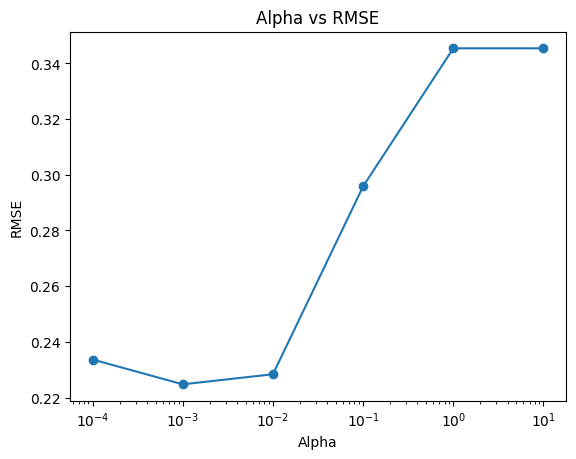

In [ ]:
# List of alpha values to test
alpha_values = [0.0001, 0.001, 0.01, 0.1, 1, 10]

# Variables to store the best alpha and its respective RMSE
best_alpha = None
best_rmse = float('inf')

# Dictionary to store the results
results = {}

# Iterate over alpha values
for alpha in alpha_values:
    # Create the LASSO model with the current alpha value
    lasso = Lasso(alpha=alpha)

    # Train the model
    lasso.fit(X_train, y_train)

    # Make predictions on the test set
    y_test_pred = lasso.predict(X_test)

    # Calculate MSE and RMSE
    mse_test = mean_squared_error(y_test, y_test_pred)
    rmse_test = np.sqrt(mse_test)

    # Store the results
    results[alpha] = rmse_test

    # Check if this alpha has the lowest RMSE
    if rmse_test < best_rmse:
        best_rmse = rmse_test
        best_alpha = alpha

# Display the best alpha value and its corresponding RMSE
print(f'Best alpha value: {best_alpha}')
print(f'RMSE with best alpha: {best_rmse}')

# Plot alpha values vs RMSE
plt.plot(list(results.keys()), list(results.values()), marker='o')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('RMSE')
plt.title('Alpha vs RMSE')
plt.show()


### Ridge

Training MSE: 0.05086461540315727
Testing MSE: 0.05499707528192237
Training R2 Score: 0.4924437180736062
Testing R2 Score: 0.52244078428761


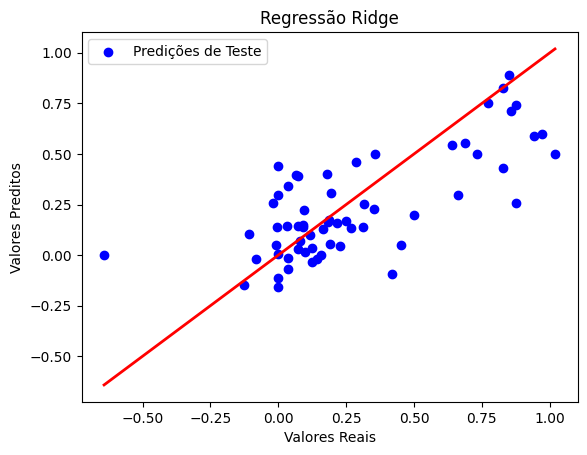

In [ ]:
# Creating the Ridge model
ridge = Ridge(alpha=0.1)

# Training the model
ridge.fit(X_train, y_train)

# Prediction
y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)

# Evaluation of the model
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f'Training MSE: {mse_train}')
print(f'Testing MSE: {mse_test}')
print(f'Training R2 Score: {r2_train}')
print(f'Testing R2 Score: {r2_test}')

# PLotting results
plt.scatter(y_test, y_test_pred, color='blue', label='Predições de Teste')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel('Valores Reais')
plt.ylabel('Valores Preditos')
plt.title('Regressão Ridge')
plt.legend()
plt.show()


Melhor valor de alpha: 10
RMSE com melhor alpha: 0.23067908839608858


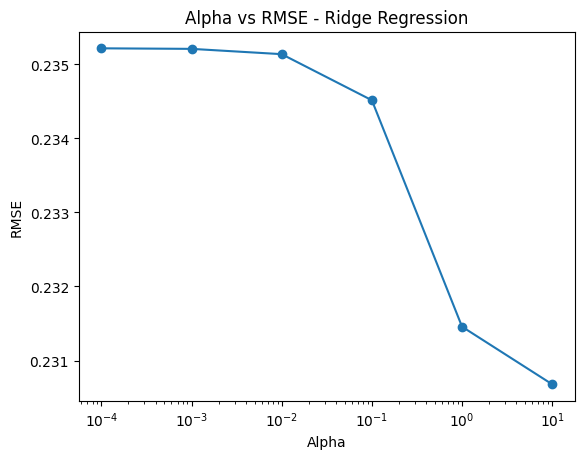

In [ ]:
# List of alpha values to test
alpha_values = [0.0001, 0.001, 0.01, 0.1, 1, 10]

# Variables to store the best alpha and its respective RMSE
best_alpha = None
best_rmse = float('inf')

# Dictionary to store the results
results = {}

# Iterate over alpha values
for alpha in alpha_values:
    # Create the Ridge model with the current alpha value
    ridge = Ridge(alpha=alpha)

    # Train the model
    ridge.fit(X_train, y_train)

    # Make predictions on the test set
    y_test_pred = ridge.predict(X_test)

    # Calculate MSE and RMSE
    mse_test = mean_squared_error(y_test, y_test_pred)
    rmse_test = np.sqrt(mse_test)

    # Store the results
    results[alpha] = rmse_test

    # Check if this alpha has the lowest RMSE
    if rmse_test < best_rmse:
        best_rmse = rmse_test
        best_alpha = alpha

# Display the best alpha value and its corresponding RMSE
print(f'Best alpha value: {best_alpha}')
print(f'RMSE with best alpha: {best_rmse}')

# Plot alpha values vs RMSE
plt.plot(list(results.keys()), list(results.values()), marker='o')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('RMSE')
plt.title('Alpha vs RMSE - Ridge Regression')
plt.show()


### Histogram-Based Gradient Boosting (HistGradientBoosting)

In [ ]:
# Instantiate the model
model = HistGradientBoostingRegressor(random_state=7)

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Compare the actual test values with the predicted values from the model
reg_model_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
print(reg_model_diff)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('Mean Absolute Error:', mae)
print('Mean Square Error:', mse)
print('Root Mean Square Error:', rmse)
print('R2 Score:', r2)


     Actual value  Predicted value
114       0.66070         0.440002
74        0.07400         0.021091
256       0.03304         0.061305
82        0.09000         0.272641
234       0.15600         0.018570
..            ...              ...
141       0.26800         0.283153
61       -0.00600         0.089958
31        0.82700         0.397146
18        0.97300         0.834981
286       0.31400         0.200765

[62 rows x 2 columns]
Mean Absolute Error: 0.12249167172618516
Mean Square Error: 0.029396731888687504
Root Mean Square Error: 0.17145475172385133
R2 Score: 0.7447376946263986


In [ ]:
# Initialize the HistGradientBoostingRegressor model
model = HistGradientBoostingRegressor()

# Define the hyperparameters for the search
param_grid = {
    'max_iter': [100, 200, 300],
    'min_samples_leaf': [20, 30, 40],
    'random_state': list(range(0, 101, 10)),
    'max_depth': list(randint(0, 100).rvs(5)),
    'learning_rate': uniform(0, 1)
}

# Set up the RandomizedSearchCV
randomize_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=1000, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=1)

# Fit the model to the training data
randomize_search.fit(X_train, y_train)

# Get the best parameters
best_params = randomize_search.best_params_
print("Best parameters found: ", best_params)

# Train the model with the best parameters
best_model = HistGradientBoostingRegressor(**best_params)
best_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('R2 Score:', r2)


Fitting 5 folds for each of 1000 candidates, totalling 5000 fits
Melhores parâmetros encontrados:  {'learning_rate': 0.078832336755284, 'max_depth': 66, 'max_iter': 300, 'min_samples_leaf': 20, 'random_state': 0}
Mean Squared Error: 0.026305555917124034
Root Mean Squared Error: 0.16218987612401717
R2 Score: 0.7715794778492616


### *AdaBoost*

In [ ]:
# Data normalization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the base model for AdaBoost
base_model = DecisionTreeRegressor(max_depth=4)

# Initialize the AdaBoost model
ada_model = AdaBoostRegressor(estimator=base_model, n_estimators=100, random_state=42)

# Train the model
ada_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = ada_model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('R2 Score:', r2)


Mean Squared Error: 0.031935475205331326
Root Mean Squared Error: 0.1787049949087359
R2 Score: 0.7226928811344707


In [ ]:
# Define the hyperparameters for the search
param_grid = {
    'random_state': list(range(0, 101, 10)),
    'estimator__max_depth': randint(1, 100),
    'n_estimators': randint(1, 200),
    'learning_rate': uniform(0, 1)
}

base_model = DecisionTreeRegressor()

# Initialize the AdaBoost model
ada_model = AdaBoostRegressor(estimator=base_model)

# Instantiate RandomizedSearchCV
randomize_search = RandomizedSearchCV(estimator=ada_model, param_distributions=param_grid, n_iter=100, cv=5, n_jobs=1, verbose=1, scoring='neg_mean_squared_error')

# Train RandomizedSearchCV
randomize_search.fit(X_train_scaled, y_train)

# Obtain the best parameters
best_params = randomize_search.best_params_
print("Best parameters found by Randomized Search:", best_params)

# Train the model with the best parameters using set_params
ada_model.set_params(**best_params)

# Fit the model with the best parameters
ada_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = ada_model.predict(X_test_scaled)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # RMSE
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)
print('R2 Score:', r2)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters found by Randomized Search: {'estimator__max_depth': 85, 'learning_rate': 0.41075716526694384, 'n_estimators': 59, 'random_state': 40}
Mean Squared Error (MSE): 0.020564579061290316
Root Mean Squared Error (RMSE): 0.1434035531682891
R2 Score: 0.8214304270250284


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Treino:
Mean Absolute Error: 0.0028855737704918025
Mean Square Error: 0.00012004805245901628
Root Mean Square Error: 0.010956644215224673
R2 Score: 0.9988020917355679

Teste:
Mean Absolute Error: 0.08692951612903226
Mean Square Error: 0.01491096695645161
Root Mean Square Error: 0.12211047029821648
R2 Score: 0.870522756915093


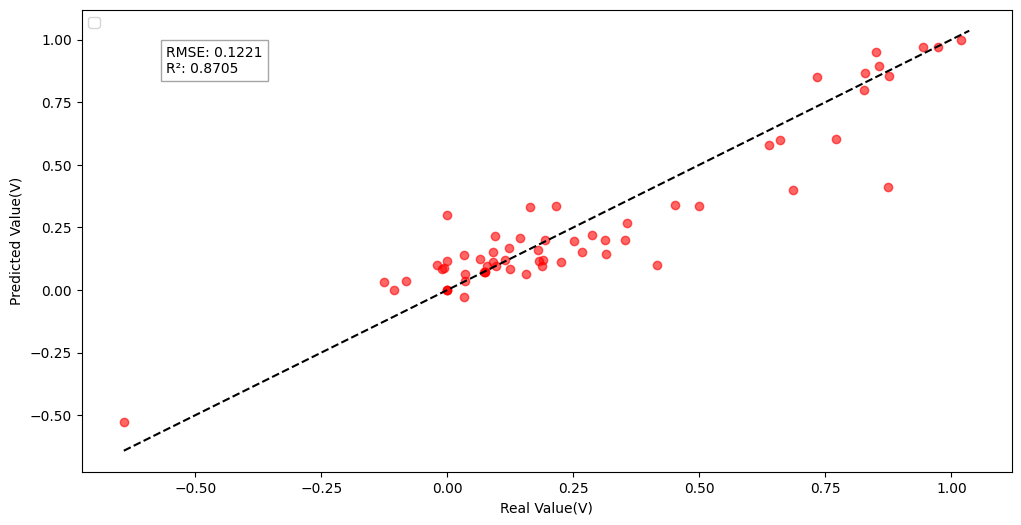

In [ ]:
# Best hyperparameters found
best_params = {'estimator__max_depth': 22, 'learning_rate': 0.5757081015363346, 'n_estimators': 79, 'random_state': 0}

# Train the model with the best parameters
best_base_model = DecisionTreeRegressor(max_depth=best_params['estimator__max_depth'])
best_model_ox = AdaBoostRegressor(estimator=best_base_model,
                               n_estimators=best_params['n_estimators'],
                               learning_rate=best_params['learning_rate'],
                               random_state=best_params['random_state'])
best_model_ox.fit(X_train_scaled, y_train)

# Predictions
y_train_pred = best_model_ox.predict(X_train_scaled)
y_test_pred = best_model_ox.predict(X_test_scaled)

# Evaluate the model with the metrics for the training set
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

print('Treino:')
print('Mean Absolute Error:', train_mae)
print('Mean Square Error:', train_mse)
print('Root Mean Square Error:', train_rmse)
print('R2 Score:', train_r2)

# Evaluate the model with the metrics for the test set
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

print('\nTeste:')
print('Mean Absolute Error:', test_mae)
print('Mean Square Error:', test_mse)
print('Root Mean Square Error:', test_rmse)
print('R2 Score:', test_r2)

# # Plot of actual vs predicted values
plt.figure(figsize=(12, 6))

# # Train
# plt.scatter(y_train, y_train_pred, color='blue', label='Treino', alpha=0.6, marker='o')
# Test
plt.scatter(y_test, y_test_pred, color='red', alpha=0.6, marker='o')

# reference line
plt.plot([min(y), max(y)], [min(y), max(y)], color='black', linestyle='--')
# Texto com as métricas RMSE e R² para o conjunto de teste
metrics_text = f"RMSE: {test_rmse:.4f}\nR²: {test_r2:.4f}"
plt.text(x=min(y) + (max(y) - min(y)) * 0.05,
         y=max(y) - (max(y) - min(y)) * 0.1,
         s=metrics_text,
         fontsize=10,
         bbox=dict(facecolor='white', alpha=0.7, edgecolor='gray'))

plt.xlabel('Real Value(V)')
plt.ylabel('Predicted Value(V)')
plt.legend(loc='upper left')
plt.show()


In [ ]:
best_results_ada_oxidation = []

for random_state in range(0, 100):

    # Train the model with the best parameters
    best_base_model = DecisionTreeRegressor(max_depth=best_params['estimator__max_depth'])
    best_model_ox = AdaBoostRegressor(estimator=best_base_model,
                               n_estimators=best_params['n_estimators'],
                               learning_rate=best_params['learning_rate'],
                               random_state=random_state)
    best_model_ox.fit(X_train, y_train)

    y_pred = best_model_ox.predict(X_test)

    mae = metrics.mean_absolute_error(y_test, y_pred)
    mse = metrics.mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    best_results_ada_oxidation.append({'Random State': random_state, 'RMSE': rmse, 'R2 Score': r2})

results_df = pd.DataFrame(best_results_ada_oxidation)


sorted_results = results_df.sort_values(by='RMSE', ascending=True)
display(sorted_results)

Random State      RMSE  R2 Score
94            94  0.110611  0.893762
18            18  0.126304  0.861476
53            53  0.130269  0.852642
46            46  0.130406  0.852332
17            17  0.132147  0.848364
..           ...       ...       ...
61            61  0.151967  0.799467
40            40  0.153517  0.795356
90            90  0.155094  0.791129
39            39  0.158521  0.781798
33            33  0.159340  0.779536

[100 rows x 3 columns]

In [ ]:
best_20_ox = pd.DataFrame(sorted_results.head(20))
best_20_ox = best_20_ox.reset_index(drop=True)
display(best_20_ox)

Random State      RMSE  R2 Score
0             94  0.110611  0.893762
1             18  0.126304  0.861476
2             53  0.130269  0.852642
3             46  0.130406  0.852332
4             17  0.132147  0.848364
5             78  0.132734  0.847014
6             83  0.132892  0.846649
7             76  0.133131  0.846096
8             28  0.133622  0.844960
9             23  0.133675  0.844837
10            89  0.134610  0.842659
11            75  0.134935  0.841897
12             0  0.135508  0.840552
13            74  0.135750  0.839983
14             3  0.135872  0.839694
15            13  0.136054  0.839265
16            10  0.136414  0.838412
17            32  0.136644  0.837869
18            56  0.136758  0.837598
19            66  0.136832  0.837422

In [ ]:
predicted = []

for i in range (0,20) :

    # Train the model with the best hyperparams
    best_base_model = DecisionTreeRegressor(max_depth=best_params['estimator__max_depth'])
    best_model_ox = AdaBoostRegressor(estimator=best_base_model,
                               n_estimators=best_params['n_estimators'],
                               learning_rate=best_params['learning_rate'],
                               random_state=best_20_ox['Random State'][i])
    best_model_ox.fit(X_train, y_train)

    y_pred = best_model_ox.predict(X_test)

    predicted.append(y_pred)

predicted_result = pd.DataFrame(predicted)

In [ ]:
results = []  # Initialize results as a list

for i in range(1, 21):
    selected_rows = predicted_result.iloc[0:i]

    sum_rows = selected_rows.sum(axis=0)
    num_rows = selected_rows.shape[0]

    mean_values_rows = sum_rows / num_rows

    mae = metrics.mean_absolute_error(y_test, mean_values_rows)
    mse = metrics.mean_squared_error(y_test, mean_values_rows)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, mean_values_rows)

    results.append({'Number': i, 'RMSE': rmse, 'R2 Score': r2})  # Append to the list

results = pd.DataFrame(results)  # Create a DataFrame outside the loop

<Figure size 800x500 with 0 Axes>

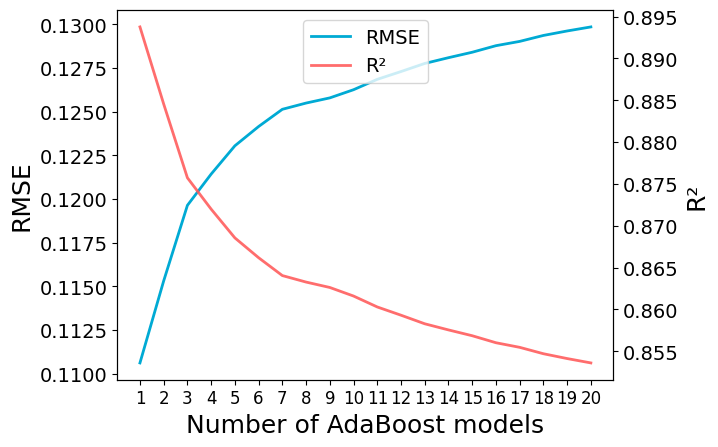

In [ ]:
x = results['Number']
y1 = results['RMSE']
y2 = results['R2 Score']

plt.figure(figsize=(8, 5))

fig, ax1 = plt.subplots()

line1 = ax1.plot(x, y1, color='#00aad4ff', label='RMSE', linewidth=2)
ax1.set_xlabel('Number of AdaBoost models', fontsize=18)
ax1.set_ylabel('RMSE', fontsize=18)
ax1.tick_params(axis='y', labelsize=14)

ax2 = ax1.twinx()
line2 = ax2.plot(x, y2, color='#ff5757dd', label='R²', linewidth=2)
ax2.set_ylabel('R²', fontsize=18)
ax2.tick_params(axis='y', labelsize=14)

lines = line1 + line2
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc='upper center', fontsize=14)

ax1.set_xticks(x)
ax1.set_xticklabels(x.astype(int), fontsize=12)

plt.show()


In [ ]:
predicted = []

for i in range (0,4) :

  # Train the model with the best hyperparams
  best_base_model = DecisionTreeRegressor(max_depth=best_params['estimator__max_depth'])
  best_model_ox = AdaBoostRegressor(estimator=best_base_model,
                               n_estimators=best_params['n_estimators'],
                               learning_rate=best_params['learning_rate'],
                               random_state=best_20_ox['Random State'][i])
  best_model_ox.fit(X_train, y_train)

  y_pred = best_model_ox.predict(X_test)
  predicted.append(y_pred)

predicted_result = pd.DataFrame(predicted)

In [ ]:

selected_rows = predicted_result.copy()

sum_rows = selected_rows.sum(axis=0)
num_rows = selected_rows.shape[0]

mean_values_rows = sum_rows / num_rows

mae = metrics.mean_absolute_error(y_test, mean_values_rows)
mse = metrics.mean_squared_error(y_test, mean_values_rows)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, mean_values_rows)

In [ ]:

print('Mean Absolute Error:', mae)
print('Mean Square Error:', mse)

print('Root Mean Square Error:', rmse)
print('R2 Score:', r2)

Mean Absolute Error: 0.08395076612903227
Mean Square Error: 0.014743172182157259
Root Mean Square Error: 0.12142146507993247
R2 Score: 0.8719797787731078


In [ ]:
# Assuming y_test and mean_values_rows are already defined
# If y_test is a Series, convert it to a DataFrame for better manipulation
df = pd.DataFrame(y_test)
df = df.reset_index(drop=True)

# If mean_values_rows is also a Series, convert it to a DataFrame
df_dif = pd.DataFrame(mean_values_rows)
df_dif = df_dif.reset_index(drop=True)

# Adding the prediction to the original DataFrame
df['Predicted value'] = df_dif

# Converting columns to numeric values
df.iloc[:, 0] = pd.to_numeric(df.iloc[:, 0], errors='coerce')
df['Predicted value'] = pd.to_numeric(df['Predicted value'], errors='coerce')

# Calculating the absolute difference
absolute_difference = (df.iloc[:, 0] - df['Predicted value']).abs()

# Sorting the DataFrame by absolute difference
df['Absolute Error'] = absolute_difference
df_sorted = df.sort_values(by='Absolute Error')

# Extracting sorted values
mean_values_rows = df_sorted['Predicted value']
y_test = df_sorted.iloc[:, 0]

real_value = y_test
pred_value = mean_values_rows

# Displaying results
print("Ordered real values:")
print(real_value.head())

print("Ordered predicted values:")
print(pred_value.head())

# Calculating evaluation metrics
mae = metrics.mean_absolute_error(real_value, pred_value)
mse = metrics.mean_squared_error(real_value, pred_value)
rmse = np.sqrt(metrics.mean_squared_error(real_value, pred_value))
r2 = r2_score(real_value, pred_value)

print('Mean Absolute Error:', mae)
print('Mean Square Error:', mse)
print('Root Mean Square Error:', rmse)
print('R2 Score:', r2)


Valores reais ordenados:
1     0.074
47    0.000
37    0.074
11    0.000
10    0.000
Name: ox_pot, dtype: float64
Valores preditos ordenados:
1     0.074
47    0.000
37    0.074
11    0.000
10    0.000
Name: Predicted value, dtype: float64
Mean Absolute Error: 0.08395076612903227
Mean Square Error: 0.014743172182157257
Root Mean Square Error: 0.12142146507993246
R2 Score: 0.8719797787731078


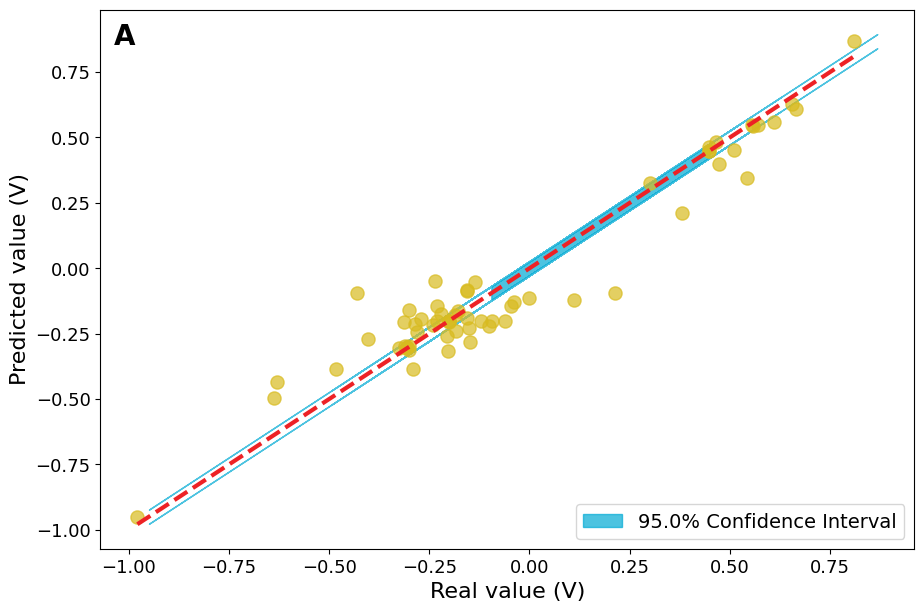

In [ ]:
# Supondo que você já tenha os arrays real_value e pred_value definidos

# Cria uma figura
plt.figure(figsize=(10.5, 7))



# Linha diagonal
plt.plot([min(real_value), max(real_value)], [min(real_value), max(real_value)], '--', c='#ed2225', linewidth=3)

# Confidence level (e.g., 95%)
confidence_level = 0.95
alpha = 1 - confidence_level

# Calculate standard errors of coefficients
se_slope = np.sqrt(np.mean((real_value - pred_value) ** 2) / (len(real_value) - 2)) / np.std(pred_value)
se_intercept = se_slope * np.sqrt(np.mean(pred_value**2))

# Calculate t-critical value
t_critical = t.ppf(1 - alpha / 2, df=len(real_value) - 2)

# Calculate confidence intervals for slope and intercept
slope_interval = t_critical * se_slope
intercept_interval = t_critical * se_intercept

# Generate predictions and prediction intervals
lower_bound = pred_value - t_critical * np.sqrt(np.mean((real_value - pred_value) ** 2) / (len(real_value) - 2))
upper_bound = pred_value + t_critical * np.sqrt(np.mean((real_value - pred_value) ** 2) / (len(real_value) - 2))



# Configurações do gráfico
plt.xlabel('Real value (V)', fontsize=16)
plt.ylabel('Predicted value (V)', fontsize=16)
plt.fill_between(pred_value, lower_bound, upper_bound, color='#00aad4ff', alpha=0.7, label=f'{confidence_level * 100}% Confidence Interval')

# Scatter plot para todas as previsões
plt.scatter(real_value, pred_value, c='#d8bb1fff', alpha=0.7, s=90)
plt.tick_params(axis='both', which='major', labelsize=13)
plt.legend(fontsize=14, loc='lower right')
plt.savefig("grafico_com_barras_de_erro.png", bbox_inches='tight', transparent=True)

plt.text(
    0.03, 0.95, 'A',  # Ajuste de posição (x, y)
    transform=plt.gca().transAxes,  # Coordenadas relativas ao gráfico
    fontsize=20, fontweight='bold',
    ha='center', va='center', color='black'
)
plt.savefig("predvsreal_BEST_OX.png", dpi=900, bbox_inches='tight')
plt.show()


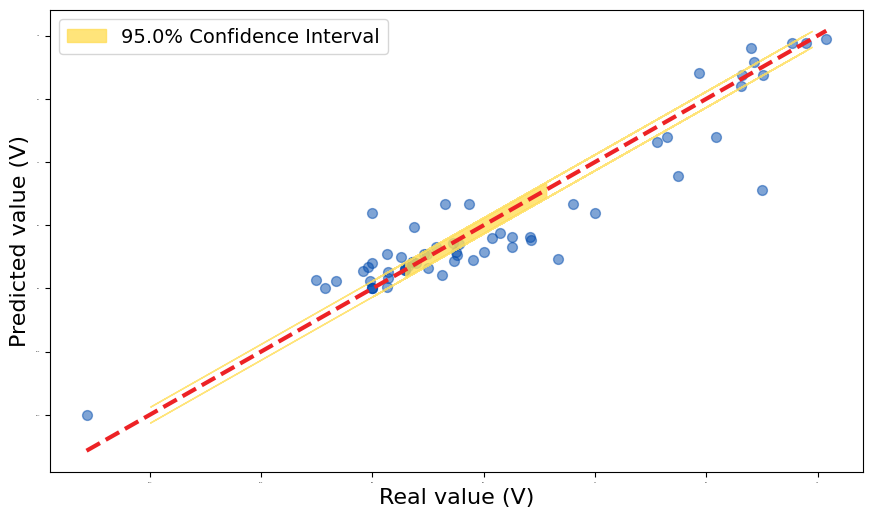

In [ ]:
# Create a figure
plt.figure(figsize=(10.5, 6))

# Scatter plot for all predictions
plt.scatter(real_value, pred_value, c='#004aad', alpha=0.5, s=50)

# Diagonal line
plt.plot([min(real_value), max(real_value)], [min(real_value), max(real_value)], '--', c='#ed2225', linewidth=3)

# Confidence level (e.g., 95%)
confidence_level = 0.95
alpha = 1 - confidence_level

# Calculate standard errors of coefficients
se_slope = np.sqrt(np.mean((real_value - pred_value) ** 2) / (len(real_value) - 2)) / np.std(pred_value)
se_intercept = se_slope * np.sqrt(np.mean(pred_value**2))

# Calculate t-critical value
t_critical = t.ppf(1 - alpha / 2, df=len(real_value) - 2)

# Calculate confidence intervals for slope and intercept
slope_interval = t_critical * se_slope
intercept_interval = t_critical * se_intercept

# Generate predictions and prediction intervals
lower_bound = pred_value - t_critical * np.sqrt(np.mean((real_value - pred_value) ** 2) / (len(real_value) - 2))
upper_bound = pred_value + t_critical * np.sqrt(np.mean((real_value - pred_value) ** 2) / (len(real_value) - 2))

# Graph settings
plt.xlabel('Real value (V)', fontsize=16)
plt.ylabel('Predicted value (V)', fontsize=16)
plt.fill_between(pred_value, lower_bound, upper_bound, color='#ffde59', alpha=0.8, label=f'{confidence_level * 100}% Confidence Interval')
plt.tick_params(axis


In [ ]:

# Feature Importance

feature_importances_list = []

random_state_values = [45]

for random_state in random_state_values:
    best_base_model = DecisionTreeRegressor(max_depth=best_params['estimator__max_depth'])
    ada = AdaBoostRegressor(estimator=best_base_model,
                               n_estimators=best_params['n_estimators'],
                               learning_rate=best_params['learning_rate'],
                               random_state=best_20_ox['Random State'][i])
    ada.fit(X_train_scaled, y_train)

    importances = ada.feature_importances_

    feature_importances_list.append(ada.feature_importances_)

feature_importances_matrix = np.array(feature_importances_list)

average_feature_importances = np.mean(feature_importances_matrix, axis=0)


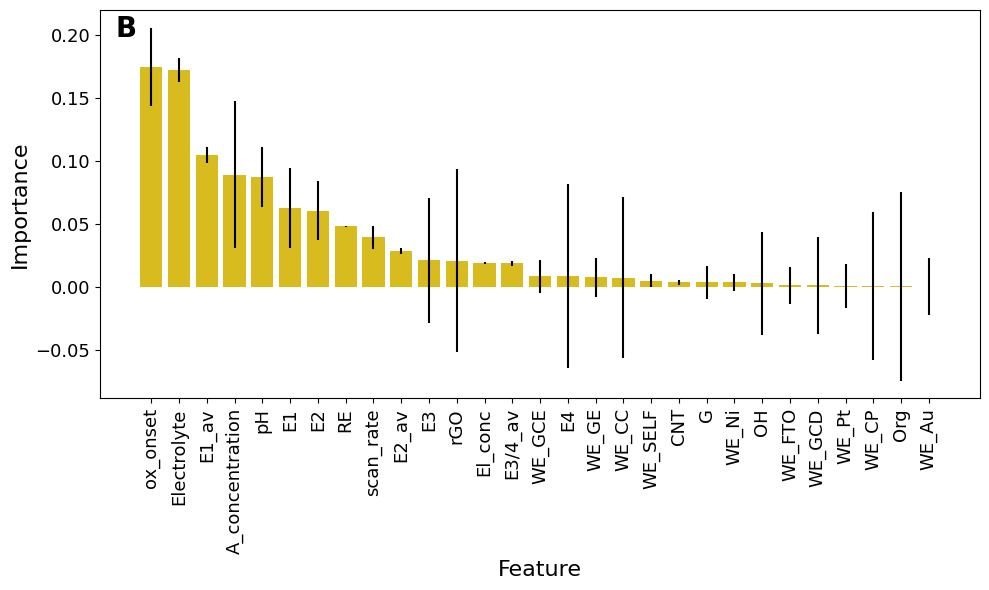

In [ ]:
# Fit the AdaBoost model
ada.fit(X, y)

# Obtaining feature importances
importances = ada.feature_importances_

# Creating a DataFrame to store feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Sorting features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Calculating the standard deviation of feature importances across trees
std_deviation = np.std([tree.feature_importances_ for tree in ada.estimators_], axis=0)
feature_importance_df['Std_Dev'] = std_deviation

# Plot settings
plt.figure(figsize=(10, 6))
bar_color = '#d8bb1fff'  # Bar color

# Plotting the bar chart
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'], color=bar_color, yerr=feature_importance_df['Std_Dev'])
plt.xticks(rotation=90, fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Feature', fontsize=16)
plt.ylabel('Importance', fontsize=16)

plt.text(
    0.03, 0.95, 'B',  # Position adjustment (x, y)
    transform=plt.gca().transAxes,  # Coordinates relative to the plot
    fontsize=20, fontweight='bold',
    ha='center', va='center', color='black'
)
plt.savefig("feature_importance_BEST_OX.png", dpi=900, bbox_inches='tight')
#plt.title('Feature Importance', fontsize=16)
plt.tight_layout()
plt.show()


PermutationExplainer explainer: 63it [00:45,  1.10it/s]


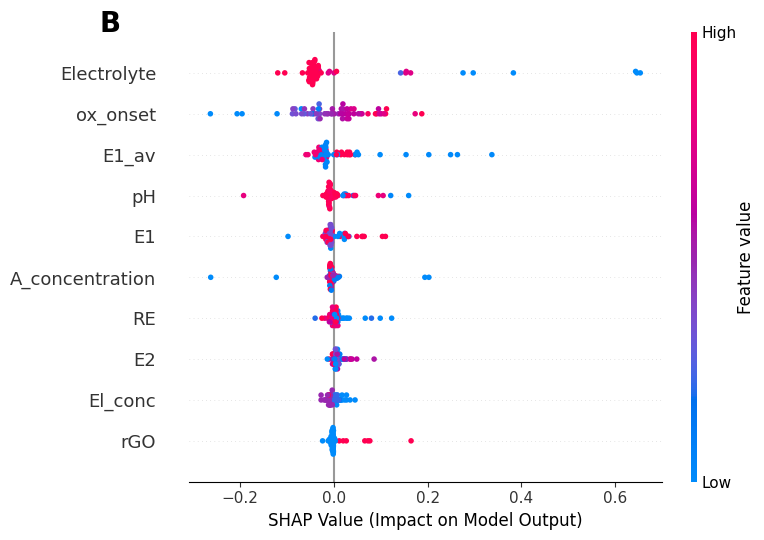

In [ ]:
# Data preprocessing
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Selecting numeric features
numeric_features = X.select_dtypes(include=['float64', 'int64']).columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ])

# Transforming the data
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Training the model with the best hyperparameters
best_params = {'estimator__max_depth': 22, 'learning_rate': 0.5757081015363346, 'n_estimators': 79, 'random_state': 0}
best_base_model = DecisionTreeRegressor(max_depth=best_params['estimator__max_depth'])
best_model_ox = AdaBoostRegressor(
    estimator=best_base_model,
    n_estimators=best_params['n_estimators'],
    learning_rate=best_params['learning_rate'],
    random_state=best_params['random_state']
)
best_model_ox.fit(X_train_transformed, y_train)

# Creating a wrapper for SHAP
class AdaBoostWrapper:
    def __init__(self, model):
        self.model = model

    def __call__(self, X):
        return self.model.predict(X)

# Creating the SHAP explainer
model_wrapper = AdaBoostWrapper(best_model_ox)
explainer = shap.Explainer(model_wrapper, X_train_transformed)

# Calculating SHAP values
shap_values = explainer(X_test_transformed)

# Generating SHAP summary plot with label "B"
plt.figure(figsize=(10, 6))

# Generate SHAP summary plot without showing it automatically
shap.summary_plot(shap_values, X_test_transformed, feature_names=X.columns, max_display=10, show=False)

# Adding the label "B" to the upper-left corner of the plot
plt.text(
    x=-0.5,  # Position on the X-axis (adjust as needed)
    y=10,  # Position on the Y-axis, near the top
    s="B",  # Text to display
    fontsize=20,
    color="black",
    fontweight="bold"
)

# Adding labels and saving the plot
plt.xlabel("SHAP Value (Impact on Model Output)", fontsize=12)
plt.savefig("shap_oxidation.png", dpi=900, bbox_inches='tight', transparent=True)
plt.tight_layout()
plt.show()


### Artificial Neural Network


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.1730 - val_loss: 0.1009
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1132 - val_loss: 0.0792
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0679 - val_loss: 0.0747
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0462 - val_loss: 0.0736
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0449 - val_loss: 0.0742
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0385 - val_loss: 0.0737
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0256 - val_loss: 0.0739
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0221 - val_loss: 0.0757
Epoch 9/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0174 - val_loss: 0.0760
Epoch 10/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0158 - val_loss: 0.0782
Epoch 11/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0202 - val_loss: 0.0813
Epoch 12/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0183 - val_l

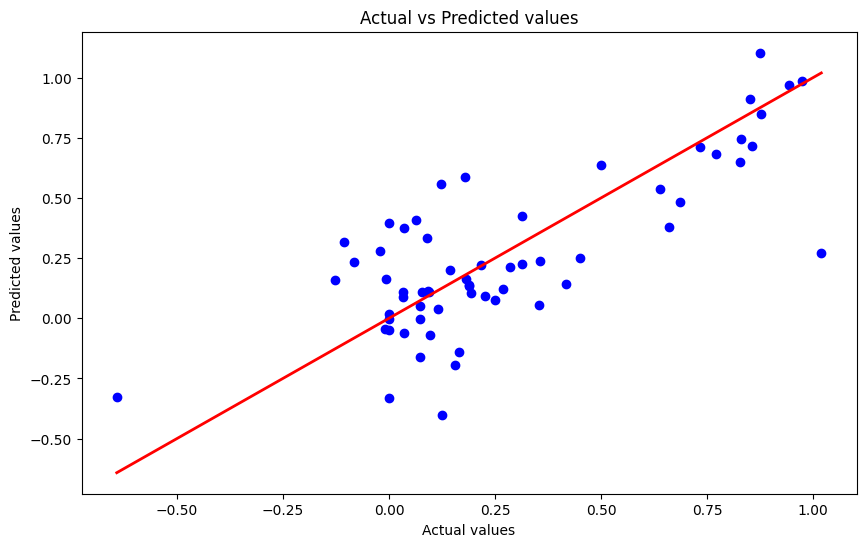

In [ ]:
# Data normalization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create the ANN model
model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=100, batch_size=16, verbose=1)

# Evaluate the model
y_pred = model.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print('Mean Absolute Error:', mae)
print('Mean Square Error:', mse)
print('Root Mean Square Error:', rmse)
print('R2 Score:', r2)

# Compare actual and predicted values
reg_model_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred.flatten()})
print(reg_model_diff)

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted values')
plt.show()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3059 - mse: 0.3059 - val_loss: 0.1273 - val_mse: 0.1273
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1299 - mse: 0.1299 - val_loss: 0.0968 - val_mse: 0.0968
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1519 - mse: 0.1519 - val_loss: 0.0980 - val_mse: 0.0980
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1039 - mse: 0.1039 - val_loss: 0.0942 - val_mse: 0.0942
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0933 - mse: 0.0933 - val_loss: 0.0864 - val_mse: 0.0864
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0779 - mse: 0.0779 - val_loss: 0.0826 - val_mse: 0.0826
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0810 - mse: 0.0810 - val_loss: 0.0820 - val_mse: 0.0820
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0761 - mse: 0.0761 - val_loss: 0.0800 - val_mse: 0.0800
Epoch 9/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.06

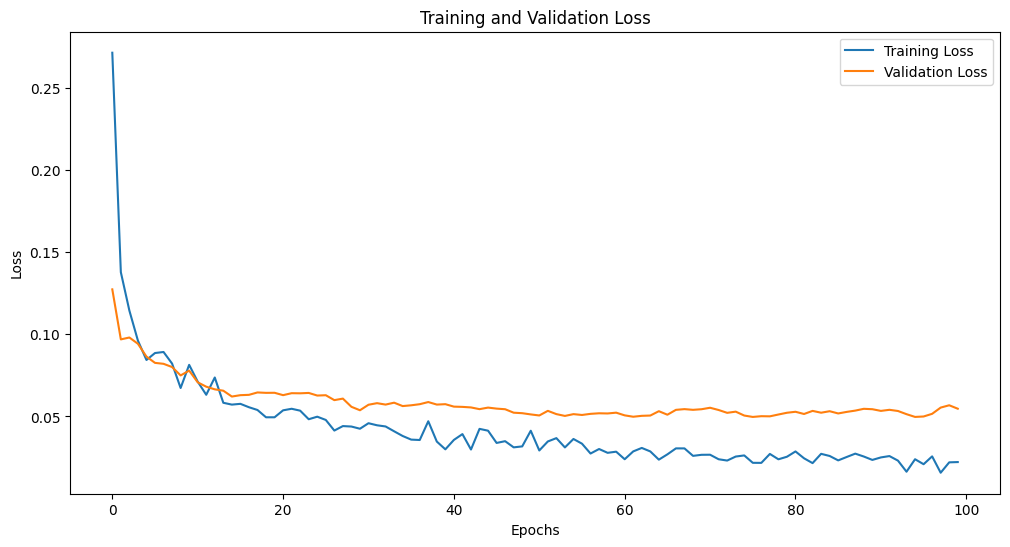

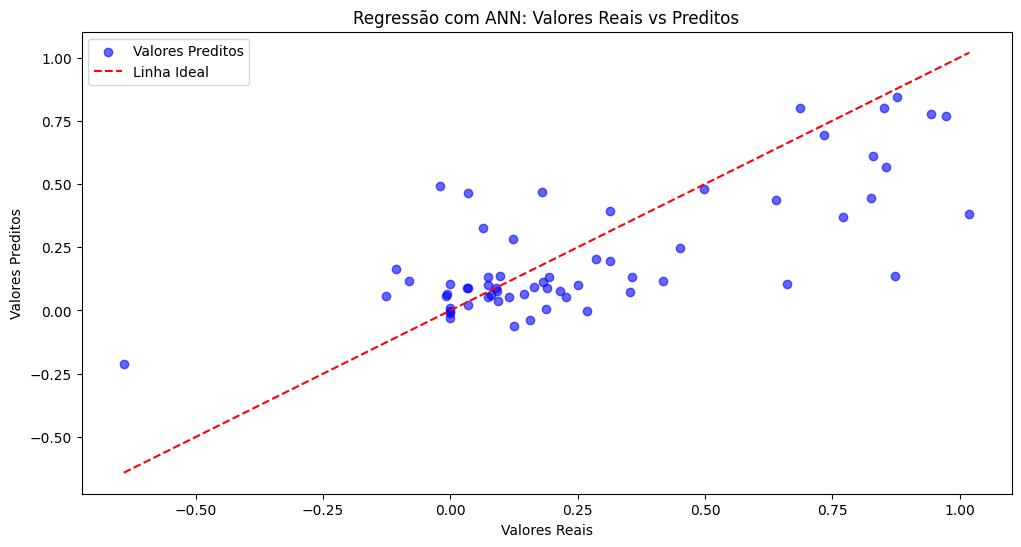

In [ ]:
# Data normalization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Building the ANN model
model = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]),  # First hidden layer
    Dropout(0.2),  # Regularization
    Dense(32, activation='relu'),  # Second hidden layer
    Dropout(0.2),
    Dense(16, activation='relu'),  # Third hidden layer
    Dense(1)  # Output layer for regression
])

# Model compilation
model.compile(optimizer='adam', loss='mse', metrics=['mse'])

# Model training
history = model.fit(
    X_train_scaled, y_train,
    validation_data=(X_test_scaled, y_test),
    epochs=100,
    batch_size=16,
    verbose=1
)

# Model evaluation
y_pred = model.predict(X_test_scaled)

# Metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mse):.4f}")
print(f"R² Score: {r2:.4f}")

# Visualizing training history
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# Plot of Actual vs Predicted Values
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Regression with ANN: Actual vs Predicted Values')
plt.legend()
plt.show()


In [ ]:
def create_model(optimizer='adam', neurons=32, activation='relu', dropout_rate=0.2):
    """
    Builds the Keras model with the given hyperparameters.

    Args:
        optimizer (str, optional): The optimizer to use. Defaults to 'adam'.
        neurons (int, optional): The number of neurons in the first hidden layer. Defaults to 32.
        activation (str, optional): The activation function to use. Defaults to 'relu'.
        dropout_rate (float, optional): The dropout rate. Defaults to 0.2.

    Returns:
        keras.Model: The compiled Keras model.
    """
    model = Sequential([
        Dense(neurons, activation=activation, input_dim=X_train.shape[1]),
        Dropout(dropout_rate),
        Dense(int(neurons / 2), activation=activation),
        Dropout(dropout_rate),
        Dense(1)
    ])
    model.compile(optimizer=optimizer, loss='mse', metrics=['mse'])
    return model


# Wrapping the model with KerasRegressor
model = KerasRegressor(build_fn=create_model, verbose=0)

# Hyperparameters to search for
# Moved 'activation' and other model parameters to be arguments of the 'build_fn'
param_grid = {
    'batch_size': [16, 32, 64],
    'epochs': [50, 100],
    'optimizer': ['adam', 'rmsprop'],
    'model__neurons': [32, 64, 128],  # Use 'model__' prefix for model parameters
    'model__activation': ['relu', 'tanh'], # Use 'model__' prefix for model parameters
    'model__dropout_rate': [0.2, 0.3] # Use 'model__' prefix for model parameters
}

# Grid search with GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, verbose=1, n_jobs=-1)
grid_result = grid.fit(X_train_scaled, y_train)

# Display the best hyperparameters
print("Best Hyperparameters found:")
print(grid_result.best_params_)

# Training with the best hyperparameters
best_model = grid_result.best_estimator_
y_pred = best_model.predict(X_test_scaled)

# Model evaluation
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"\nResults with the best hyperparameters:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")


Fitting 5 folds for each of 144 candidates, totalling 720 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Melhores Hiperparâmetros encontrados:
{'batch_size': 32, 'epochs': 50, 'model__activation': 'relu', 'model__dropout_rate': 0.2, 'model__neurons': 128, 'optimizer': 'adam'}

Resultados com os melhores hiperparâmetros:
Mean Squared Error (MSE): 0.0394
Root Mean Squared Error (RMSE): 0.1985
R² Score: 0.6579


### CatBoost

In [ ]:
# Creating the CatBoostRegressor model
cat_boost_model = cb.CatBoostRegressor(
    iterations=5000,       # Number of trees
    learning_rate= 0.0963,    # Learning rate
    depth=6,              # Depth of the tree
    verbose=10,            # Display output every 10 iterations
)

# Training the model
cat_boost_model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = cat_boost_model.predict(X_test)

# Evaluating the model's performance
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

# Displaying the results
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R2 Score: {r2:.4f}")


0:	learn: 0.3105897	total: 7.37ms	remaining: 36.8s
10:	learn: 0.2403284	total: 67.4ms	remaining: 30.6s
20:	learn: 0.2007647	total: 108ms	remaining: 25.5s
30:	learn: 0.1745645	total: 157ms	remaining: 25.2s
40:	learn: 0.1553145	total: 226ms	remaining: 27.3s
50:	learn: 0.1417032	total: 274ms	remaining: 26.6s
60:	learn: 0.1317185	total: 327ms	remaining: 26.5s
70:	learn: 0.1207173	total: 386ms	remaining: 26.8s
80:	learn: 0.1096602	total: 451ms	remaining: 27.4s
90:	learn: 0.0999639	total: 513ms	remaining: 27.7s
100:	learn: 0.0937611	total: 572ms	remaining: 27.7s
110:	learn: 0.0877617	total: 613ms	remaining: 27s
120:	learn: 0.0833447	total: 645ms	remaining: 26s
130:	learn: 0.0782899	total: 685ms	remaining: 25.5s
140:	learn: 0.0742815	total: 725ms	remaining: 25s
150:	learn: 0.0696036	total: 772ms	remaining: 24.8s
160:	learn: 0.0661792	total: 815ms	remaining: 24.5s
170:	learn: 0.0630747	total: 856ms	remaining: 24.2s
180:	learn: 0.0595570	total: 902ms	remaining: 24s
190:	learn: 0.0560668	total: 

In [ ]:
# Learning rate values to be tested
learning_rates = np.linspace(0.01, 0.1, 50)  # Testing 50 values between 0.01 and 0.1

# Variables to store the best results
best_learning_rate = None
best_rmse = float('inf')
best_model = None

# Iterate over the learning rate values
results = []
for lr in learning_rates:
    # Create and train the model with the current learning rate
    model = cb.CatBoostRegressor(
        iterations=5000,
        learning_rate=lr,
        depth=6,
        verbose=0
    )

    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5
    r2 = r2_score(y_test, y_pred)

    # Store the results
    results.append((lr, mse, rmse, r2))

    # Update the best model if the RMSE is lower
    if rmse < best_rmse:
        best_rmse = rmse
        best_learning_rate = lr
        best_model = model

# Display the results for each learning rate
print(f"{'Learning Rate':<15} {'MSE':<10} {'RMSE':<10} {'R2 Score':<10}")
for lr, mse, rmse, r2 in results:
    print(f"{lr:<15.4f} {mse:<10.4f} {rmse:<10.4f} {r2:<10.4f}")

# Display the best learning rate found
print("\nBest result:")
print(f"Learning Rate: {best_learning_rate:.4f}")
print(f"RMSE: {best_rmse:.4f}")


Learning Rate   MSE        RMSE       R2 Score  
0.0100          0.0200     0.1414     0.8264    
0.0118          0.0198     0.1407     0.8280    
0.0137          0.0207     0.1440     0.8200    
0.0155          0.0193     0.1390     0.8323    
0.0173          0.0195     0.1395     0.8309    
0.0192          0.0199     0.1411     0.8272    
0.0210          0.0196     0.1399     0.8301    
0.0229          0.0195     0.1398     0.8303    
0.0247          0.0202     0.1422     0.8243    
0.0265          0.0199     0.1411     0.8271    
0.0284          0.0199     0.1409     0.8275    
0.0302          0.0187     0.1369     0.8372    
0.0320          0.0197     0.1405     0.8287    
0.0339          0.0203     0.1423     0.8241    
0.0357          0.0203     0.1425     0.8236    
0.0376          0.0199     0.1410     0.8274    
0.0394          0.0199     0.1412     0.8269    
0.0412          0.0197     0.1404     0.8288    
0.0431          0.0201     0.1419     0.8251    
0.0449          0.02

### Oxidation potential models - Overview



In [ ]:
# Definition of the function to build the neural network model
def build_model(input_shape, learning_rate=0.01, dropout_rate=0.2, neurons=128, activation='relu'):
    model = Sequential()
    model.add(Dense(neurons, activation=activation, input_shape=(input_shape,)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(neurons // 2, activation=activation))  # Reducing the neurons by half in the second layer
    model.add(Dropout(dropout_rate))
    model.add(Dense(1))  # Output for regression

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# Specific parameters
params = {
    'batch_size': 32,
    'epochs': 50,
    'model__activation': 'relu',
    'model__dropout_rate': 0.2,
    'model__neurons': 128,
    'optimizer': 'adam'
}

# Training the ANN model with the adapted parameters
ann_model = build_model(
    input_shape=X_train.shape[1],
    learning_rate=0.01,  # Fixed learning rate as per the parameters
    dropout_rate=params['model__dropout_rate'],
    neurons=params['model__neurons'],
    activation=params['model__activation']
)

# Training the model with batch size and epochs defined in the parameters
ann_model.fit(
    X_train, y_train,
    epochs=params['epochs'],
    batch_size=params['batch_size'],
    verbose=0
)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1176 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Evaluation Results:
       Model     MSE_Train  MSE_Test    RMSE_Train  RMSE_Test  R2_Train  \
0      Lasso  5.137398e-02  0.050514  2.266583e-01   0.224753  0.487361   
1      Ridge  5.538034e-02  0.053213  2.353303e-01   0.230679  0.447383   
2        KNN  0.000000e+00  0.067591  0.000000e+00   0.259982  1.000000   
3   CatBoost  5.372681e-14  0.019014  2.317904e-07   0.137892  1.000000   
4   AdaBoost  1.200481e-04  0.014911  1.095664e-02   0.122110  0.998802   
5        XGB  3.235089e-05  0.018547  5.687784e-03   0.136186  0.999677   
6        HGB  6.151100e-03  0.026536  7.842895e-02   0.162898  0.938621   
7         RF  8.658742e-09  0.021372  9.305236e-05   0.146191  1.000000   
8         LR  5.085946e-02  0.055327  2.255204e-01   0.235216  0.492495   
9        GPR  1.164572e-02  0.088014  1.079153e-01   0.296671  0.883792   
10       BRR  5.410495e-02

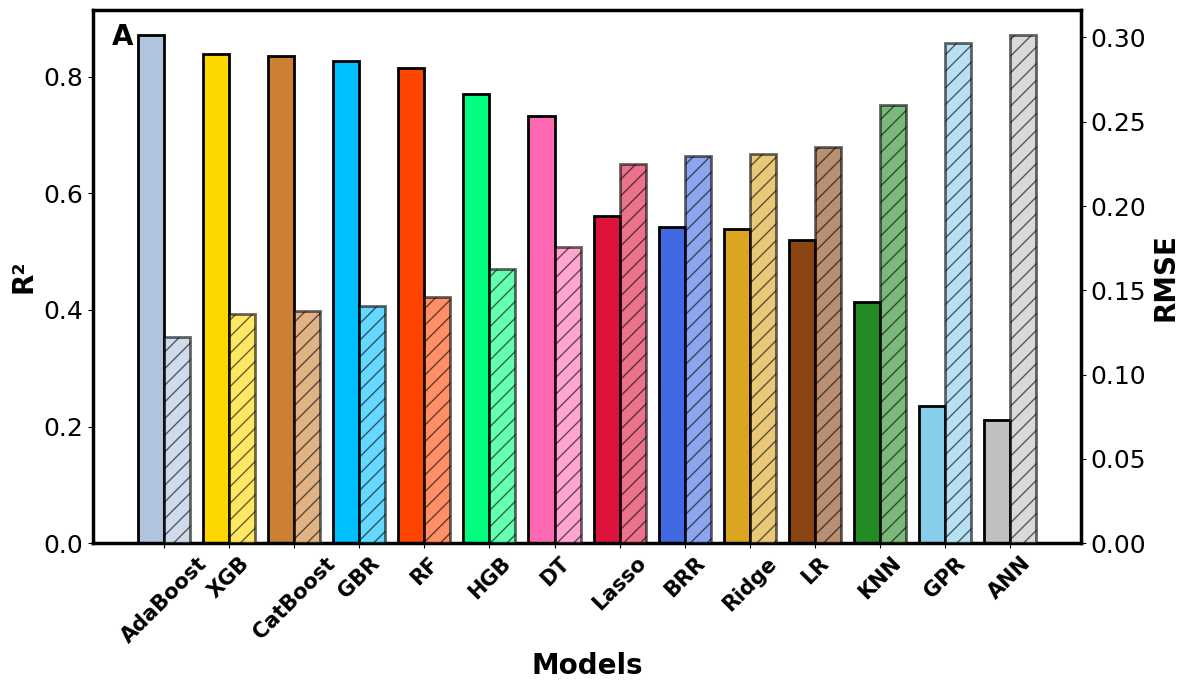

In [ ]:
class ModelEvaluator:
    def __init__(self, X_train, X_test, y_train, y_test):
        self.X_train = X_train.copy()
        self.X_test = X_test.copy()
        self.y_train = y_train.copy()
        self.y_test = y_test.copy()

        # Create scaled versions of the data
        self.scaler = StandardScaler()
        self.X_train_scaled = self.scaler.fit_transform(self.X_train)
        self.X_test_scaled = self.scaler.transform(self.X_test)

        # Define models with their respective parameters
        self.models = {
            'Lasso': Lasso(alpha=0.001),
            'Ridge': Ridge(alpha=10),
            'KNN': KNeighborsRegressor(
                algorithm='auto', leaf_size=20,
                metric='manhattan', n_neighbors=7,
                p=1, weights='distance'
            ),
            'CatBoost': cb.CatBoostRegressor(
                iterations=5000, learning_rate=0.0963,
                depth=6, verbose=0
            ),
            'AdaBoost': AdaBoostRegressor(
                estimator=DecisionTreeRegressor(max_depth=22),
                random_state=0, learning_rate=0.5757081015363346,
                n_estimators=79
            ),
            'XGB': XGBRegressor(
                objective='reg:squarederror', random_state=0,
                n_estimators=50, max_depth=None
            ),
            'HGB': HistGradientBoostingRegressor(
                learning_rate=0.0788, max_depth=66,
                max_iter=300, min_samples_leaf=20,
                random_state=0
            ),
            'RF': RandomForestRegressor(
                n_estimators=92, min_samples_split=2,
                min_samples_leaf=1, max_features='sqrt',
                criterion='squared_error', bootstrap=False,
                random_state=10, max_depth=28
            ),
            'LR': LinearRegression(),
            'GPR': GaussianProcessRegressor(
                kernel=1.0 ** 2 * RBF(length_scale=1.0) + WhiteKernel(noise_level=1)
            ),
            'BRR': BayesianRidge(
                alpha_1=2.17e-09, alpha_2=0.000154,
                lambda_1=7.54e-05, lambda_2=0.000996
            ),
            'DT': DecisionTreeRegressor(random_state=72),
            'GBR': GradientBoostingRegressor(
                n_estimators=100, learning_rate=0.1,
                max_depth=3, random_state=50
            ),
            'ANN': ann_model  # Assuming ann_model is already defined
        }

        # List of models that require scaled data
        self.scaled_models = ['ANN', 'AdaBoost']

    def evaluate_model(self, name, model):
        """Evaluates a single model and returns its metrics"""
        # Decides whether to use scaled data or not
        if name in self.scaled_models:
            X_train = self.X_train_scaled
            X_test = self.X_test_scaled
        else:
            X_train = self.X_train
            X_test = self.X_test

        # Train the model
        model.fit(X_train, self.y_train)

        # Make predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Calculate metrics
        metrics = {
            'Model': name,
            'MSE_Train': mean_squared_error(self.y_train, y_train_pred),
            'MSE_Test': mean_squared_error(self.y_test, y_test_pred),
            'RMSE_Train': np.sqrt(mean_squared_error(self.y_train, y_train_pred)),
            'RMSE_Test': np.sqrt(mean_squared_error(self.y_test, y_test_pred)),
            'R2_Train': r2_score(self.y_train, y_train_pred),
            'R2_Test': r2_score(self.y_test, y_test_pred)
        }

        return metrics

    def evaluate_all_models(self):
        """Evaluates all models and returns a DataFrame with the results"""
        results = []
        for name, model in self.models.items():
            try:
                metrics = self.evaluate_model(name, model)
                results.append(metrics)
            except Exception as e:
                print(f"Error evaluating {name}: {str(e)}")

        return pd.DataFrame(results)

    def plot_results(self, results_df):
        import matplotlib.pyplot as plt
        import numpy as np

        # Custom metallic colors
        colors = [
            '#B0C4DE', '#FFD700', '#CD7F32', '#00BFFF',
            '#FF4500', '#00FF7F', '#FF69B4', '#DC143C',
            '#4169E1', '#DAA520', '#8B4513', '#228B22',
            '#87CEEB', '#C0C0C0'
        ]

        # Sort by R2
        results_sorted = results_df.sort_values('R2_Test', ascending=False)

        # Prepare figure
        fig, ax1 = plt.subplots(figsize=(12, 7))
        ax2 = ax1.twinx()

        # Set up x-axis
        x = np.arange(len(results_sorted['Model']))
        width = 0.4

        # R² Bars (left axis)
        r2_bars = ax1.bar(
            x - width/2,
            results_sorted['R2_Test'],
            width,
            color=colors,
            edgecolor='black',
            linewidth=2,
            label='R²'
        )

        # RMSE Bars (right axis)
        rmse_bars = ax2.bar(
            x + width/2,
            results_sorted['RMSE_Test'],
            width,
            color=colors,
            edgecolor='black',
            linewidth=2,
            alpha=0.6,  # More transparent
            hatch='//',  # Adds hatch to some models
            label='RMSE'
        )

        # R² axis settings
        ax1.set_xlabel("Models", fontsize=20, fontweight='bold')
        ax1.set_ylabel("R²", color='black', fontsize=20, fontweight='bold')
        ax1.set_xticks(x)
        ax1.set_xticklabels(results_sorted['Model'], rotation=45, fontsize=15, fontweight='bold')
        ax1.tick_params(axis='y', labelcolor='black', labelsize=18)
        ax1.spines['left'].set_color('black')
        ax1.spines['left'].set_linewidth(2)

        # RMSE axis settings
        ax2.set_ylabel("RMSE", color='black', fontsize=20, fontweight='bold')
        ax2.tick_params(axis='y', labelcolor='black', labelsize=18)
        ax2.spines['right'].set_color('black')
        ax2.spines['right'].set_linewidth(2)

        # Adjust spine thickness
        ax1.spines['top'].set_linewidth(2.5)
        ax1.spines['right'].set_linewidth(2.5)
        ax1.spines['bottom'].set_linewidth(2.5)
        ax1.spines['left'].set_linewidth(2.5)
        plt.text(
            0.03, 0.95, 'A',  # Adjust position (x, y)
            transform=plt.gca().transAxes,  # Relative coordinates to the plot
            fontsize=20, fontweight='bold',
            ha='center', va='center', color='black'
        )
        # General style
        plt.tight_layout()
        plt.savefig("ox_outputs.png", dpi=900, bbox_inches='tight')
        plt.show()


# Usage of the class
evaluator = ModelEvaluator(X_train, X_test, y_train, y_test)
results_df = evaluator.evaluate_all_models()
print("Evaluation Results:")
print(results_df)
evaluator.plot_results(results_df)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0943 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0757 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0578 
Average Training Times:
       Model      mean       std
0        ANN  0.149022  0.104851
1   AdaBoost  0.356780  0.099433
2        BRR  0.008435  0.005607
3   CatBoost  7.274764  2.712343
4         DT  0.013169  0.012089
5        GBR  0.205241  0.125914
6        GPR  0.579717  0.711489
7        HGB  0.522434  0.379338
8        KNN  0.004653  0.004515
9         LR  0.003530  0.001407
10     Lasso  0.004185  0.000917
11        RF  0.181957  0.117024
12     Ridge  0.003143  0.000700
13       XGB  0.192970  0.178819


<ipython-input-12-7d5733900f18>:127: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(sorted_results['Model'], rotation=90, fontsize=18, fontweight='bold')


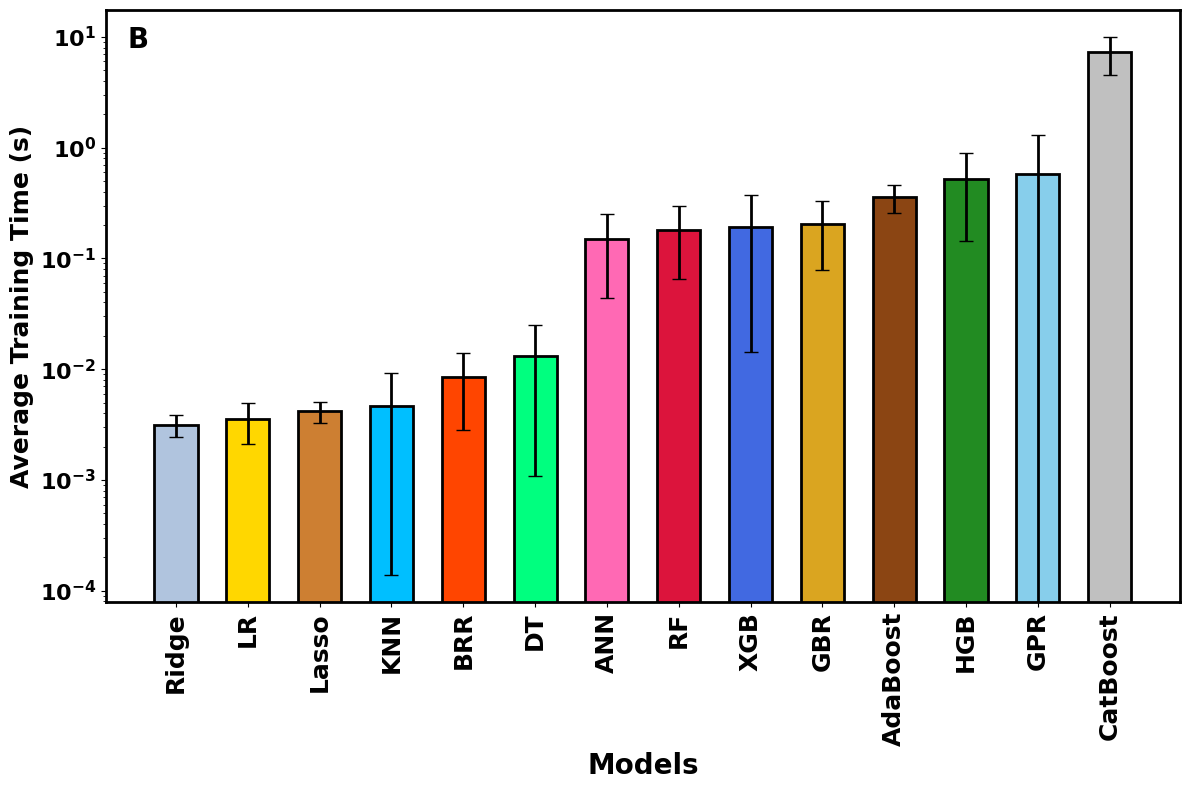

In [ ]:
import time

# Custom metallic colors
colors = [
    '#B0C4DE', '#FFD700', '#CD7F32', '#00BFFF',
    '#FF4500', '#00FF7F', '#FF69B4', '#DC143C',
    '#4169E1', '#DAA520', '#8B4513', '#228B22',
    '#87CEEB', '#C0C0C0'
]

# Function to calculate the training time of each model
def calculate_training_time(name, model, X_train, y_train, scaler=None):
    # Scale data if necessary
    if scaler is not None and name in ['ANN', 'AdaBoost']:
        X_train = scaler.transform(X_train)

    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time
    return {'Model': name, 'Training_Time': training_time}

# Preparation of models with hyperparameters from the first code
models = [
    ('Lasso', Lasso(alpha=0.001)),
    ('Ridge', Ridge(alpha=10)),
    ('KNN', KNeighborsRegressor(
        algorithm='auto', leaf_size=20,
        metric='manhattan', n_neighbors=7,
        p=1, weights='distance'
    )),
    ('CatBoost', cb.CatBoostRegressor(
        iterations=5000, learning_rate=0.0963,
        depth=6, verbose=0
    )),
    ('AdaBoost', AdaBoostRegressor(
        estimator=DecisionTreeRegressor(max_depth=22),
        random_state=0, learning_rate=0.5757081015363346,
        n_estimators=79
    )),
    ('XGB', XGBRegressor(
        objective='reg:squarederror', random_state=0,
        n_estimators=50, max_depth=None
    )),
    ('HGB', HistGradientBoostingRegressor(
        learning_rate=0.0788, max_depth=66,
        max_iter=300, min_samples_leaf=20,
        random_state=0
    )),
    ('RF', RandomForestRegressor(
        n_estimators=92, min_samples_split=2,
        min_samples_leaf=1, max_features='sqrt',
        criterion='squared_error', bootstrap=False,
        random_state=10, max_depth=28
    )),
    ('LR', LinearRegression()),
    ('GPR', GaussianProcessRegressor(
        kernel=1.0 ** 2 * RBF(length_scale=1.0) + WhiteKernel(noise_level=1)
    )),
    ('BRR', BayesianRidge(
        alpha_1=2.17e-09, alpha_2=0.000154,
        lambda_1=7.54e-05, lambda_2=0.000996
    )),
    ('DT', DecisionTreeRegressor(random_state=72)),
    ('GBR', GradientBoostingRegressor(
        n_estimators=100, learning_rate=0.1,
        max_depth=3, random_state=50
    )),
    ('ANN', ann_model),
]

# Data scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# List to store the results of each execution
all_results = []

# Runs the code three times to calculate training times
for _ in range(3):
    run_results = []
    for name, model in models:
        run_results.append(calculate_training_time(name, model, X_train, y_train, scaler))
    all_results.append(pd.DataFrame(run_results))

# Calculates the average and standard deviation of training times
results_df = pd.concat(all_results)
average_training_times = results_df.groupby('Model')['Training_Time'].agg(['mean', 'std']).reset_index()

# Displays the DataFrame with average times and standard deviation
print("Average Training Times:")
print(average_training_times)


# Bar chart for average training time
fig, ax = plt.subplots(figsize=(12, 8))

# Sort the results by average training time
sorted_results = average_training_times.sort_values(by='mean')

colors = [ '#B0C4DE', '#FFD700', '#CD7F32', '#00BFFF', '#FF4500', '#00FF7F', '#FF69B4', '#DC143C','#4169E1', '#DAA520', '#8B4513', '#228B22', '#87CEEB', '#C0C0C0']

# Ensure that the number of colors is sufficient for the models
colors = colors * (len(sorted_results) // len(colors) + 1)

# Create the bar chart
bars = ax.bar(
    sorted_results['Model'],
    sorted_results['mean'],
    color=colors[:len(sorted_results)],  # Apply the colors
    edgecolor='black',
    linewidth=2,
    width=0.6
)

# Add error bars (standard deviation)
ax.errorbar(
    sorted_results['Model'],
    sorted_results['mean'],
    yerr=sorted_results['std'],
    fmt='none',
    ecolor='black',
    elinewidth=2,
    capsize=5
)

# Configure X-axis labels
ax.set_xticklabels(sorted_results['Model'], rotation=90, fontsize=18, fontweight='bold')

# Configure Y-axis labels
ax.set_yscale('log')  # Logarithmic scale
ax.set_ylabel("Average Training Time (s)", fontsize=18, fontweight='bold')
ax.set_xlabel("Models", fontsize=20, fontweight='bold')
plt.yticks(fontsize=16, fontweight = 'bold')

# Adjust axis thickness
for spine in ax.spines.values():
    spine.set_linewidth(2)

# Change background of the chart
ax.set_facecolor('white')  # Background of the chart area
fig.patch.set_facecolor('white')  # Background of the entire figure

# Adjust layout
plt.tight_layout()

plt.text(
    0.03, 0.95, 'B',  # Position adjustment (x, y)
    transform=plt.gca().transAxes,  # Coordinates relative to the plot
    fontsize=20, fontweight='bold',
    ha='center', va='center', color='black'
)

# Save the chart (optional)
plt.savefig("training_time_with_error_bars.png", dpi=900, bbox_inches='tight')

# Show the chart
plt.show()


## Onset potential


#### Feature selection

In [ ]:
data_features_onset_potential = pd.read_csv('/content/machine-learning-algorithms-for-predicting-the-oxidation-potential-of-glycerol/data_features_oxidation.csv', encoding = 'latin-1')
# data_features_onset_potential = pd.read_csv('/content/data_features_oxidation.csv', encoding = 'latin-1')

In [ ]:
display(data_features_onset_potential)

pH  scan_rate  current_density  onset_pot   ox_pot  ox_onset  \
0    13.79       10.0           42.700   -0.40600  0.21400     0.620   
1     0.59       50.0            0.425    0.64519  0.80519     0.160   
2    13.79        5.0           55.000    0.47600  0.64400     0.168   
3    13.79        5.0           24.520   -0.16800  0.37400     0.542   
4    13.79        5.0           99.200   -0.27600  0.33200     0.608   
..     ...        ...              ...        ...      ...       ...   
301  13.79       50.0            0.000   -0.24861  0.14539     0.394   
302  12.71       50.0           95.377   -0.17989  0.34511     0.525   
303  13.56       50.0          158.700   -0.54600  0.12300     0.669   
304  13.45       20.0           96.097   -0.44000 -0.09800     0.342   
305  13.45       20.0           87.762   -0.59000 -0.07100     0.519   

     A_concentration  El_conc  E1  E2  ...  WE_CP  WE_FTO  WE_GCD  WE_GCE  \
0                1.0      1.0  78  28  ...      0       0       0       0   
1                0.2      0.5  78   0  ...      0       0       0       0   
2                1.0      1.0  28  27  ...      0       0       0       0   
3                1.0      1.0  79   0  ...      0       0       0       0   
4                1.0      1.0  79  28  ...      0       0       0       0   
..               ...      ...  ..  ..  ...    ...     ...     ...     ...   
301              1.0      1.0  78  28  ...      0       0       0       1   
302              0.1      1.0  46  83  ...      0       0       1       0   
303              0.5      0.5  78  47  ...      0       0       0       1   
304              0.5      1.0  46  79  ...      0       0       0       1   
305              0.5      1.0  46  47  ...      0       0       0       1   

     WE_GE  WE_NPSS  WE_Ni  WE_Pt  WE_SELF  WE_Ti  
0        0        0      0      0        0      1  
1        0        0      0      1        0      0  
2        1        0      0      0        0      0  
3        1        0      0      0        0      0  
4        1        0      0      0        0      0  
..     ...      ...    ...    ...      ...    ...  
301      0        0      0      0        0      0  
302      0        0      0      0        0      0  
303      0        0      0      0        0      0  
304      0        0      0      0        0      0  
305      0        0      0      0        0      0  

[306 rows x 35 columns]

In [ ]:
features_normalized_onset = data_features_onset_potential.loc[:,:].values

features_normalized_onset = StandardScaler().fit_transform(features_normalized)

features_normalized_onset = pd.DataFrame(features_normalized_onset)

header = list(data_features_oxidation.columns.values)
features_normalized_onset.columns = header

correlation_onset = features_normalized.corr()



NameError: name 'features_normalized' is not defined

In [ ]:
pd.set_option('display.max_rows', None)

display(correlation_onset['onset_pot'])

In [ ]:
# Ordenar a coluna 'Pot_Ox_V (NHE)' do maior para o menor e exibir
sorted_correlation_onset = correlation['onset_pot'].sort_values(ascending=False)


# Restaurar as configurações de exibição padrão
pd.reset_option('display.max_rows')

# Obter a primeira coluna como uma lista
correlation_onset_list_values = sorted_correlation_onset.tolist()
correlation_onset_list = sorted_correlation_onset.index.tolist()

# Exibir as listas
print("Primeira coluna como lista:", correlation_onset_list_values)
print("Segunda coluna como lista:", correlation_onset_list)

### Random Forest - ONSET

In [ ]:
# X são nossas features e Y é o resultado que obteremos do valor do onset potential
data_features_onset_potential = pd.read_csv('/content/machine-learning-algorithms-for-predicting-the-oxidation-potential-of-glycerol/data_features_oxidation.csv', encoding = 'latin-1')
X_onset = data_features_onset_potential[['E3/4_av', 'rGO', 'OH', 'WE_FTO', 'ox_onset', 'WE_CC', 'E2_av','E3', 'WE_Au', 'WE_Ni', 'WE_Pt', 'E2', 'E1_av', 'Org', 'WE_GCD', 'WE_SELF', 'A_concentration', 'E4', 'E1', 'G', 'WE_CP', 'WE_GE', 'CNT', 'scan_rate', 'WE_GCE', 'RE', 'El_conc', 'pH', 'Electrolyte']]
y_onset = data_features_onset_potential['onset_pot']
X_train_onset,X_test_onset, y_train_onset, y_test_onset = train_test_split(X_onset, y_onset, test_size = 0.2, random_state = 50)

In [ ]:
model = RandomForestRegressor(n_estimators= 50 , random_state = 1, max_depth= None)


#aqui ele usara o dado de treino para ajustar o modelo
model.fit(X_train_onset, y_train_onset)

#aqui ele testará a predição a partir dos dados de teste
y_pred_onset= model.predict(X_test_onset)

#aqui vai comparar o valor de teste real e o predito pelo modelo
reg_model_diff = pd.DataFrame({'Actual value': y_test_onset, 'Predicted value': y_pred_onset})
reg_model_diff

#e aqui são as métricas que ele usa para averiguar o erro. Vamos dar atenção principalmente para o R² e o RMSE
mae = metrics.mean_absolute_error(y_test_onset, y_pred_onset)
mse = metrics.mean_squared_error(y_test_onset, y_pred_onset)
rmse = np.sqrt(metrics.mean_squared_error(y_test_onset, y_pred_onset))
r2 = r2_score(y_test_onset, y_pred_onset)

print('Mean Absolute Error:', mae)
print('Mean Square Error:', mse)

print('Root Mean Square Error:', rmse)
print('R2 Score:', r2)


Mean Absolute Error: 0.1175003574193549
Mean Square Error: 0.03351760522986665
Root Mean Square Error: 0.18307813968321465
R2 Score: 0.7641969122591915


In [ ]:
# Instanciando e treinando o modelo
model = RandomForestRegressor(n_estimators= 50 , random_state = 1, max_depth=None)
model.fit(X_train_onset, y_train_onset)

# Fazendo predições
y_pred_onset = model.predict(X_test_onset)

# Garantindo que os valores sejam numéricos
y_test_onset = pd.to_numeric(y_test_onset)
y_pred_onset = pd.to_numeric(y_pred_onset)

# Comparando os valores reais e preditos
reg_model_diff = pd.DataFrame({
    'Actual value': y_test_onset,
    'Predicted value': y_pred_onset,
    'Error': y_test_onset - y_pred_onset
})

# Calculando métricas de avaliação
mae = metrics.mean_absolute_error(y_test_onset, y_pred_onset)
mse = metrics.mean_squared_error(y_test_onset, y_pred_onset)
rmse = np.sqrt(metrics.mean_squared_error(y_test_onset, y_pred_onset))
r2 = r2_score(y_test_onset, y_pred_onset)

print('Mean Absolute Error:', mae)
print('Mean Square Error:', mse)
print('Root Mean Square Error:', rmse)
print('R2 Score:', r2)

# Exibindo o DataFrame completo
print(reg_model_diff)

# Exibindo as primeiras 5 instâncias específicas
print(reg_model_diff.head(5))


Mean Absolute Error: 0.1175003574193549
Mean Square Error: 0.03351760522986665
Root Mean Square Error: 0.18307813968321465
R2 Score: 0.7641969122591915
     Actual value  Predicted value     Error
114      -0.03930        -0.190091  0.150791
74       -0.30600        -0.286220 -0.019780
256      -0.31296        -0.220313 -0.092647
82       -0.28000        -0.232065 -0.047935
234      -0.04600        -0.231057  0.185057
..            ...              ...       ...
141      -0.15100        -0.230774  0.079774
61       -0.32600        -0.306840 -0.019160
31        0.38000        -0.279566  0.659566
18        0.44900         0.447899  0.001101
286      -0.29000        -0.409538  0.119538

[62 rows x 3 columns]
     Actual value  Predicted value     Error
114      -0.03930        -0.190091  0.150791
74       -0.30600        -0.286220 -0.019780
256      -0.31296        -0.220313 -0.092647
82       -0.28000        -0.232065 -0.047935
234      -0.04600        -0.231057  0.185057


MELHOR MODELO DE RF ABAIXO

In [ ]:
# Instanciando e treinando o modelo
model = RandomForestRegressor(n_estimators= 70 , random_state = 1, max_depth=None)
model.fit(X_train_onset, y_train_onset)

# Fazendo predições
y_pred = model.predict(X_test_onset)

# Garantindo que os valores sejam numéricos
y_test_onset = pd.to_numeric(y_test_onset)
y_pred = pd.to_numeric(y_pred)

# Comparando os valores reais e preditos
reg_model_diff = pd.DataFrame({
    'Actual value': y_test_onset,
    'Predicted value': y_pred,
    'Error': y_test_onset - y_pred
})

# Calculando métricas de avaliação
mae = metrics.mean_absolute_error(y_test_onset, y_pred_onset)
mse = metrics.mean_squared_error(y_test_onset, y_pred_onset)
rmse = np.sqrt(metrics.mean_squared_error(y_test_onset, y_pred_onset))
r2 = r2_score(y_test_onset, y_pred_onset)

print('Mean Absolute Error:', mae)
print('Mean Square Error:', mse)
print('Root Mean Square Error:', rmse)
print('R2 Score:', r2)

# Exibindo o DataFrame completo
print(reg_model_diff)

# Exibindo as primeiras 5 instâncias específicas
print(reg_model_diff.head(5))


Mean Absolute Error: 0.1175003574193549
Mean Square Error: 0.03351760522986665
Root Mean Square Error: 0.18307813968321465
R2 Score: 0.7641969122591915
     Actual value  Predicted value     Error
114      -0.03930        -0.190871  0.151571
74       -0.30600        -0.281357 -0.024643
256      -0.31296        -0.206462 -0.106498
82       -0.28000        -0.229657 -0.050343
234      -0.04600        -0.215014  0.169014
..            ...              ...       ...
141      -0.15100        -0.239541  0.088541
61       -0.32600        -0.298951 -0.027049
31        0.38000        -0.299061  0.679061
18        0.44900         0.425272  0.023728
286      -0.29000        -0.370719  0.080719

[62 rows x 3 columns]
     Actual value  Predicted value     Error
114      -0.03930        -0.190871  0.151571
74       -0.30600        -0.281357 -0.024643
256      -0.31296        -0.206462 -0.106498
82       -0.28000        -0.229657 -0.050343
234      -0.04600        -0.215014  0.169014


In [ ]:
# Definindo a grade de parâmetros para RandomizedSearchCV
param_dist = {
    'n_estimators': [int(x) for x in np.linspace(start=10, stop=400, num=20)],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [int(x) for x in np.linspace(1, 50, num=10)] + [None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'random_state':  [x for x in (0, 100, 10)],
    'criterion': ['friedman_mse', 'absolute_error', 'squared_error']
}

# Configurando o RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=RandomForestRegressor(),
    param_distributions=param_dist,
    n_iter=1000,
    cv=5,
    verbose=1,
    n_jobs=1
)

# Executando o RandomizedSearchCV
random_search.fit(X_train_onset, y_train_onset)

# Extraindo os melhores parâmetros e o modelo
best_params = random_search.best_params_
best_model = random_search.best_estimator_

# Fazendo previsões no conjunto de teste
y_pred = best_model.predict(X_test_onset)

# Calculando métricas de desempenho
mae = metrics.mean_absolute_error(y_test_onset, y_pred)
mse = metrics.mean_squared_error(y_test_onset, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_onset, y_pred)

# Exibindo os resultados
print('Best parameters:', best_params)
print('Mean Absolute Error:', mae)
print('Mean Square Error:', mse)
print('Root Mean Square Error:', rmse)
print('R2 Score:', r2)


Fitting 5 folds for each of 1000 candidates, totalling 5000 fits
Best parameters: {'random_state': 10, 'n_estimators': 92, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 17, 'criterion': 'squared_error', 'bootstrap': False}
Mean Absolute Error: 0.10945906266027082
Mean Square Error: 0.020879741573469827
Root Mean Square Error: 0.14449824072794046
R2 Score: 0.8531068225045175


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Treino (Onset Potential):
Mean Absolute Error: 0.01976080900820355
Mean Square Error: 0.0003904895726586985
Root Mean Square Error: 0.01976080900820355
R2 Score: 0.9971969375016944

Teste (Onset Potential):
Mean Absolute Error: 0.14449824072794046
Mean Square Error: 0.020879741573469827
Root Mean Square Error: 0.14449824072794046
R2 Score: 0.8531068225045175


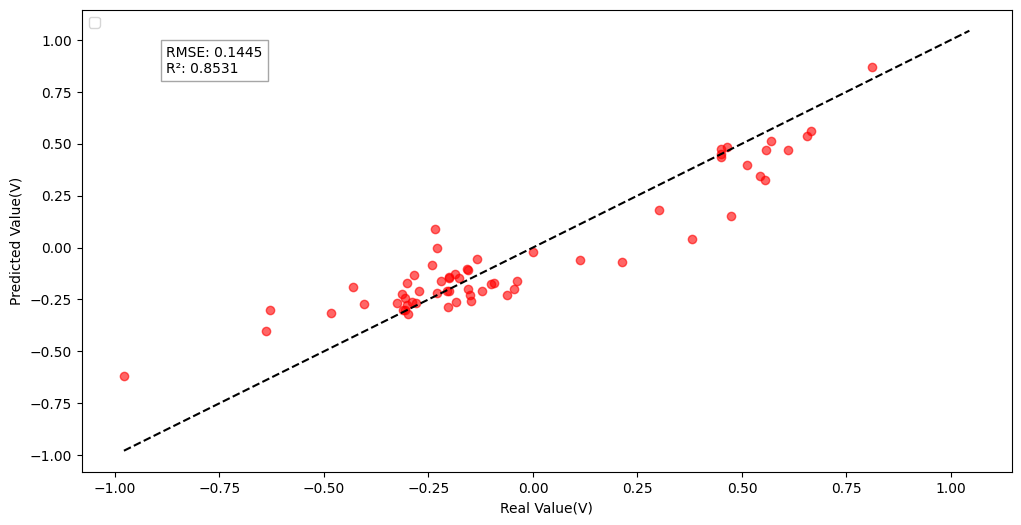

In [ ]:
# Melhor hiperparâmetros encontrados para onset
best_params_RF_onset = {'random_state': 10, 'n_estimators': 92, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 17, 'criterion': 'squared_error', 'bootstrap': False}

# Treinar o modelo com os melhores parâmetros
rf_onset = RandomForestRegressor(**best_params_RF_onset)
rf_onset.fit(X_train_onset, y_train_onset)

# Previsões
y_train_pred_onset = rf_onset.predict(X_train_onset)
y_test_pred_onset = rf_onset.predict(X_test_onset)

# Avaliar o modelo com as métricas para o conjunto de treino
train_mae_onset = mean_squared_error(y_train_onset, y_train_pred_onset, squared=False)
train_mse_onset = mean_squared_error(y_train_onset, y_train_pred_onset)
train_rmse_onset = np.sqrt(train_mse_onset)
train_r2_onset = r2_score(y_train_onset, y_train_pred_onset)

print('Treino (Onset Potential):')
print('Mean Absolute Error:', train_mae_onset)
print('Mean Square Error:', train_mse_onset)
print('Root Mean Square Error:', train_rmse_onset)
print('R2 Score:', train_r2_onset)

# Avaliar o modelo com as métricas para o conjunto de teste
test_mae_onset = mean_squared_error(y_test_onset, y_test_pred_onset, squared=False)
test_mse_onset = mean_squared_error(y_test_onset, y_test_pred_onset)
test_rmse_onset = np.sqrt(test_mse_onset)
test_r2_onset = r2_score(y_test_onset, y_test_pred_onset)

print('\nTeste (Onset Potential):')
print('Mean Absolute Error:', test_mae_onset)
print('Mean Square Error:', test_mse_onset)
print('Root Mean Square Error:', test_rmse_onset)
print('R2 Score:', test_r2_onset)

# Gráfico dos valores reais vs preditos
plt.figure(figsize=(12, 6))

# Treino
# plt.scatter(y_train_onset, y_train_pred_onset, color='blue', label='Treino', alpha=0.6, marker='o')
# Teste
plt.scatter(y_test_onset, y_test_pred_onset, color='red', alpha=0.6, marker='o')
# Texto com as métricas RMSE e R² para o conjunto de teste
metrics_text = f"RMSE: {test_rmse_onset:.4f}\nR²: {test_r2_onset:.4f}"
plt.text(x=min(y_onset) + (max(y_onset) - min(y_onset)) * 0.05,
         y=max(y_onset) - (max(y_onset) - min(y_onset)) * 0.1,
         s=metrics_text,
         fontsize=10,
         bbox=dict(facecolor='white', alpha=0.7, edgecolor='gray'))

# Linha de referência
plt.plot([min(y_onset), max(y_onset)], [min(y_onset), max(y_onset)], color='black', linestyle='--')


plt.xlabel('Real Value(V)')
plt.ylabel('Predicted Value(V)')
# plt.title('Valores Reais vs Preditos - Onset Potential (Treino e Teste)')
plt.legend(loc='upper left')
plt.savefig("adaboost_onset_bset.png", bbox_inches='tight', transparent=True)
plt.show()

### XGBoost - Onset

In [ ]:
# Treinar o modelo de XGBoost para onset potential
model_onset = XGBRegressor(n_estimators=30, random_state=0, max_depth=None)
model_onset.fit(X_train_onset, y_train_onset)

# Fazer previsões no conjunto de treino e teste para onset potential
train_preds_onset = model_onset.predict(X_train_onset)
test_preds_onset = model_onset.predict(X_test_onset)

# Calcular as métricas de avaliação para o onset potential
mae_onset = mean_absolute_error(y_test_onset, test_preds_onset)
mse_onset = mean_squared_error(y_test_onset, test_preds_onset)
rmse_onset = np.sqrt(mse_onset)
r2_onset = r2_score(y_test_onset, test_preds_onset)

print('Onset Potential - Mean Absolute Error:', mae_onset)
print('Onset Potential - Mean Square Error:', mse_onset)
print('Onset Potential - Root Mean Square Error:', rmse_onset)
print('Onset Potential - R2 Score:', r2_onset)


Onset Potential - Mean Absolute Error: 0.11595370588013
Onset Potential - Mean Square Error: 0.036956025818905225
Onset Potential - Root Mean Square Error: 0.1922395011929266
Onset Potential - R2 Score: 0.7400069325071659


In [ ]:
# Definir os parâmetros para RandomizedSearchCV
param_dist = {
    'learning_rate': uniform(0, 1),  # Taxa de aprendizado
    'max_depth': randint(3, 10),          # Profundidade máxima da árvore
    'n_estimators': randint(0, 200),     # Número de árvores no ensemble
    'random_state': randint(0, 100)
}
# Criar o modelo XGBoost para regressão
model = XGBRegressor(objective='reg:squarederror')

# Configurar RandomizedSearchCV
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=1000, scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=1)

# Executar a busca aleatória nos dados de treino
random_search.fit(X_train_onset, y_train_onset)

# Melhores parâmetros encontrados
print('Best Parameters:', random_search.best_params_)

# Melhor modelo encontrado
best_model = random_search.best_estimator_

# Fazer previsões com o melhor modelo
y_pred = best_model.predict(X_test_onset)

# Calculando métricas de desempenho
mae = metrics.mean_absolute_error(y_test_onset, y_pred)
mse = metrics.mean_squared_error(y_test_onset, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_onset, y_pred)

print('XGBoost Regression Metrics:')
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('R2 Score:', r2)


Fitting 5 folds for each of 1000 candidates, totalling 5000 fits
Best Parameters: {'learning_rate': 0.14811745194987513, 'max_depth': 3, 'n_estimators': 66, 'random_state': 96}
XGBoost Regression Metrics:
Mean Absolute Error: 0.11806947183176394
Mean Squared Error: 0.02889638770662426
Root Mean Squared Error: 0.1699893752757044
R2 Score: 0.7967081061117728


In [ ]:
# Fitting 5 folds for each of 100 candidates, totalling 500 fits
# Best Parameters: {'learning_rate': 0.1256346712256433, 'max_depth': 3, 'n_estimators': 160, 'random_state': 15}
# XGBoost Regression Metrics:
# Mean Absolute Error: 0.11256908017370969
# Mean Squared Error: 0.023909367351145187
# Root Mean Squared Error: 0.15462654154816108
# R2 Score: 0.8317927963926992

In [ ]:
# Treinar o modelo de XGBoost para onset potential
params_xg_onset = {'learning_rate': 0.1256346712256433, 'max_depth': 3, 'n_estimators': 160, 'random_state': 15}
model_onset = XGBRegressor(**params_xg_onset)
model_onset.fit(X_train_onset, y_train_onset)

# Fazer previsões no conjunto de treino e teste para onset potential
train_preds_onset = model_onset.predict(X_train_onset)
test_preds_onset = model_onset.predict(X_test_onset)

# Calcular as métricas de avaliação para o onset potential
mae_onset = mean_absolute_error(y_test_onset, test_preds_onset)
mse_onset = mean_squared_error(y_test_onset, test_preds_onset)
rmse_onset = np.sqrt(mse_onset)
r2_onset = r2_score(y_test_onset, test_preds_onset)

print('Onset Potential - Mean Absolute Error:', mae_onset)
print('Onset Potential - Mean Square Error:', mse_onset)
print('Onset Potential - Root Mean Square Error:', rmse_onset)
print('Onset Potential - R2 Score:', r2_onset)


Onset Potential - Mean Absolute Error: 0.11256908017370969
Onset Potential - Mean Square Error: 0.023909367351145187
Onset Potential - Root Mean Square Error: 0.15462654154816108
Onset Potential - R2 Score: 0.8317927963926992


### Gradient Boost regression

In [ ]:
# Instanciando o modelo Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor(n_estimators=200, max_depth=3, random_state=6, criterion = 'squared_error')

# Treinando o modelo
gb_regressor.fit(X_train_onset, y_train_onset)

# Fazendo previsões no conjunto de teste
y_pred = gb_regressor.predict(X_test_onset)

# Calculando métricas de avaliação
mse = mean_squared_error(y_test_onset, y_pred)
rmse = mean_squared_error(y_test_onset, y_pred, squared=False)  # RMSE
r2 = r2_score(y_test_onset, y_pred)

# Imprimindo as métricas de avaliação
print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)
print('R2 Score:', r2)


Mean Squared Error (MSE): 0.020591856770060906
Root Mean Squared Error (RMSE): 0.1434986298542983
R2 Score: 0.855132149943394


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
# Definindo os parâmetros a serem ajustados
param_dist = {
    'n_estimators': np.arange(50, 300, 50),  # Número de estimadores
    'max_depth': np.arange(2, 11, 1),  # Profundidade máxima da árvore
    'learning_rate': [0.001, 0.01, 0.05, 0.1, 0.2],  # Taxa de aprendizado
    'subsample': [0.7, 0.8, 0.9, 1.0],  # Subamostragem
    'min_samples_split': np.arange(2, 10, 1),  # Número mínimo de amostras para dividir um nó
    'min_samples_leaf': np.arange(1, 10, 1),  # Número mínimo de amostras em uma folha
    'criterion': ['squared_error', 'friedman_mse'],  # Critério de divisão
    'random_state': randint(0,200)
}

# Instanciando o modelo Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor()

# Configurando o RandomizedSearchCV com 2000 iterações e 5 fold cross-validation
random_search = RandomizedSearchCV(
    gb_regressor,
    param_distributions=param_dist,
    n_iter=100,  # Número de iterações aleatórias
    scoring='neg_mean_squared_error',  # Mínimo erro quadrado
    cv=5,  # 5-fold cross-validation
    verbose=1,  # Exibir progresso
    n_jobs=-1  # Usar todos os núcleos disponíveis
)

# Treinando o modelo com RandomizedSearchCV
random_search.fit(X_train_onset, y_train_onset)

# Melhor modelo encontrado
best_model = random_search.best_estimator_

# Fazendo previsões no conjunto de teste
y_pred = best_model.predict(X_test_onset)

# Calculando métricas de avaliação
mse = mean_squared_error(y_test_onset, y_pred)
rmse = mean_squared_error(y_test_onset, y_pred, squared=False)  # RMSE
r2 = r2_score(y_test_onset, y_pred)

# Imprimindo as métricas de avaliação
print('Melhores hiperparâmetros encontrados:', random_search.best_params_)
print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)
print('R2 Score:', r2)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Melhores hiperparâmetros encontrados: {'criterion': 'squared_error', 'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 150, 'random_state': 190, 'subsample': 1.0}
Mean Squared Error (MSE): 0.024298991156532553
Root Mean Squared Error (RMSE): 0.15588133678068247
R2 Score: 0.8290517146317088


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### Adaboost

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Melhores parâmetros encontrados pelo Randomize Search: {'estimator__max_depth': 40, 'learning_rate': 0.6048986996292275, 'n_estimators': 21, 'random_state': 0}

Métricas de Avaliação:
Mean Squared Error (MSE): 0.027101757083870966
Root Mean Squared Error (RMSE): 0.16462611300723518
R2 Score: 0.8093336931516951


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


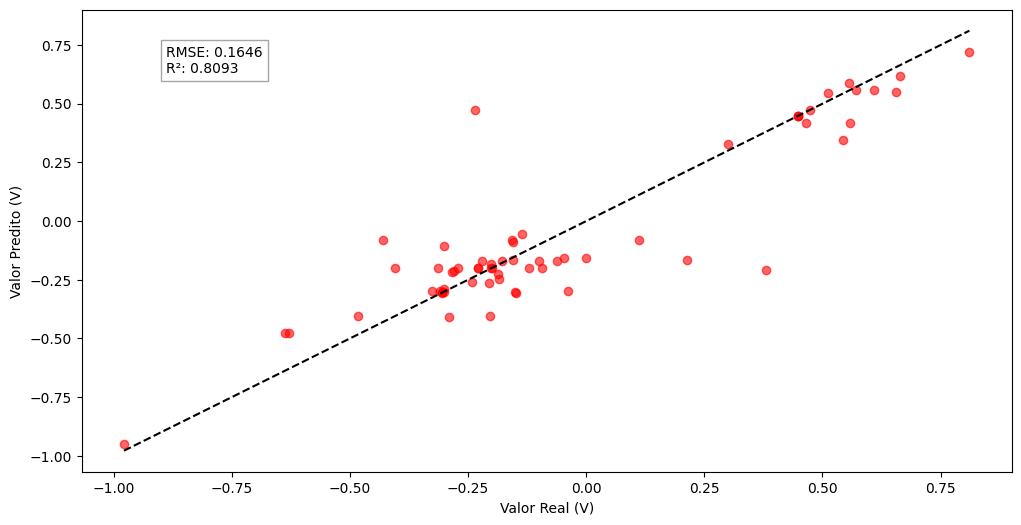

In [ ]:
X_train_onset,X_test_onset, y_train_onset, y_test_onset = train_test_split(X_onset, y_onset, test_size = 0.2, random_state = 50)
# Normalização dos dados
scaler = StandardScaler()
X_train_scaled_onset = scaler.fit_transform(X_train_onset)
X_test_scaled_onset = scaler.transform(X_test_onset)

# Definir os hiperparâmetros para busca
param_grid = {
    'random_state': list(range(0, 101, 10)),
    'estimator__max_depth': randint(1, 100),
    'n_estimators': randint(1, 200),
    'learning_rate': uniform(0, 1)
}

# Inicializar o modelo base
base_model_onset = DecisionTreeRegressor()

# Inicializar o modelo AdaBoost
ada_model_onset = AdaBoostRegressor(estimator=base_model_onset)

# Instanciando o RandomizeSearchCV
randomize_search = RandomizedSearchCV(
    estimator=ada_model_onset,
    param_distributions=param_grid,
    n_iter=50,
    cv=5,
    n_jobs=1,
    verbose=1,
    scoring='neg_mean_squared_error'
)

# Treinando o RandomizeSearchCV
randomize_search.fit(X_train_scaled_onset, y_train_onset)

# Obtendo os melhores parâmetros
best_params = randomize_search.best_params_
print("Melhores parâmetros encontrados pelo Randomize Search:", best_params)

# Criar um novo modelo com os melhores parâmetros
best_base_model_onset = DecisionTreeRegressor(max_depth=best_params['estimator__max_depth'])
best_ada_regressor_onset = AdaBoostRegressor(
    estimator=best_base_model_onset,
    n_estimators=best_params['n_estimators'],
    learning_rate=best_params['learning_rate'],
    random_state=best_params['random_state']
)

# Treinando o modelo com os melhores parâmetros
best_ada_regressor_onset.fit(X_train_scaled_onset, y_train_onset)

# Fazendo previsões no conjunto de teste
y_pred = best_ada_regressor_onset.predict(X_test_scaled_onset)

# Calculando métricas de avaliação
mse = mean_squared_error(y_test_onset, y_pred)
rmse = mean_squared_error(y_test_onset, y_pred, squared=False)  # RMSE
r2 = r2_score(y_test_onset, y_pred)

# Imprimindo as métricas de avaliação
print('\nMétricas de Avaliação:')
print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)
print('R2 Score:', r2)

# Opcional: Plotar resultados
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.scatter(y_test_onset, y_pred, color='red', alpha=0.6, marker='o')
plt.plot([y_test_onset.min(), y_test_onset.max()],
         [y_test_onset.min(), y_test_onset.max()],
         color='black', linestyle='--')

metrics_text = f"RMSE: {rmse:.4f}\nR²: {r2:.4f}"
plt.text(x=y_test_onset.min() + (y_test_onset.max() - y_test_onset.min()) * 0.05,
         y=y_test_onset.max() - (y_test_onset.max() - y_test_onset.min()) * 0.1,
         s=metrics_text,
         fontsize=10,
         bbox=dict(facecolor='white', alpha=0.7, edgecolor='gray'))

plt.xlabel('Valor Real (V)')
plt.ylabel('Valor Predito (V)')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Treino (Onset Potential):
Mean Absolute Error: 0.01549565481135879
Mean Square Error: 0.00024011531803278685
Root Mean Square Error: 0.01549565481135879
R2 Score: 0.9982763733262738

Teste (Onset Potential):
Mean Absolute Error: 0.11768861176303202
Mean Square Error: 0.01385060933870968
Root Mean Square Error: 0.11768861176303202
R2 Score: 0.9025581801933403


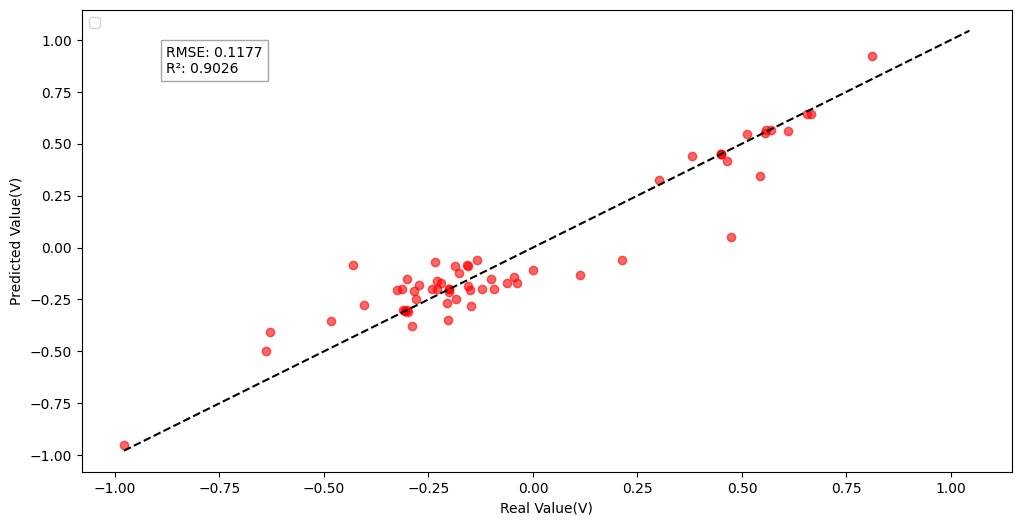

In [ ]:
# Normalização dos dados
scaler = StandardScaler()
X_train_scaled_onset = scaler.fit_transform(X_train_onset)
X_test_scaled_onset = scaler.transform(X_test_onset)

# Melhor hiperparâmetros encontrados para onset
best_params_onset = {'estimator__max_depth': 52, 'learning_rate': 0.8450247602329297, 'n_estimators': 74, 'random_state': 100}

# Treinar o modelo com os melhores parâmetros
best_base_model_onset = DecisionTreeRegressor(max_depth=best_params_onset['estimator__max_depth'])
ada_onset_model = AdaBoostRegressor(estimator=best_base_model_onset,
                                     n_estimators=best_params_onset['n_estimators'],
                                     learning_rate=best_params_onset['learning_rate'],
                                     random_state=best_params_onset['random_state'])

ada_onset_model.fit(X_train_scaled_onset, y_train_onset)

# Previsões
y_train_pred_onset = ada_onset_model.predict(X_train_scaled_onset)
y_test_pred_onset = ada_onset_model.predict(X_test_scaled_onset)

# Avaliar o modelo com as métricas para o conjunto de treino
train_mae_onset = mean_squared_error(y_train_onset, y_train_pred_onset, squared=False)
train_mse_onset = mean_squared_error(y_train_onset, y_train_pred_onset)
train_rmse_onset = np.sqrt(train_mse_onset)
train_r2_onset = r2_score(y_train_onset, y_train_pred_onset)

print('Treino (Onset Potential):')
print('Mean Absolute Error:', train_mae_onset)
print('Mean Square Error:', train_mse_onset)
print('Root Mean Square Error:', train_rmse_onset)
print('R2 Score:', train_r2_onset)

# Avaliar o modelo com as métricas para o conjunto de teste
test_mae_onset = mean_squared_error(y_test_onset, y_test_pred_onset, squared=False)
test_mse_onset = mean_squared_error(y_test_onset, y_test_pred_onset)
test_rmse_onset = np.sqrt(test_mse_onset)
test_r2_onset = r2_score(y_test_onset, y_test_pred_onset)

print('\nTeste (Onset Potential):')
print('Mean Absolute Error:', test_mae_onset)
print('Mean Square Error:', test_mse_onset)
print('Root Mean Square Error:', test_rmse_onset)
print('R2 Score:', test_r2_onset)

# Gráfico dos valores reais vs preditos
plt.figure(figsize=(12, 6))

# Treino
# plt.scatter(y_train_onset, y_train_pred_onset, color='blue', label='Treino', alpha=0.6, marker='o')
# Teste
plt.scatter(y_test_onset, y_test_pred_onset, color='red', alpha=0.6, marker='o')
# Texto com as métricas RMSE e R² para o conjunto de teste
metrics_text = f"RMSE: {test_rmse_onset:.4f}\nR²: {test_r2_onset:.4f}"
plt.text(x=min(y_onset) + (max(y_onset) - min(y_onset)) * 0.05,
         y=max(y_onset) - (max(y_onset) - min(y_onset)) * 0.1,
         s=metrics_text,
         fontsize=10,
         bbox=dict(facecolor='white', alpha=0.7, edgecolor='gray'))

# Linha de referência
plt.plot([min(y_onset), max(y_onset)], [min(y_onset), max(y_onset)], color='black', linestyle='--')


plt.xlabel('Real Value(V)')
plt.ylabel('Predicted Value(V)')
# plt.title('Valores Reais vs Preditos - Onset Potential (Treino e Teste)')
plt.legend(loc='upper left')
plt.savefig("adaboost_onset_bset.png", bbox_inches='tight', transparent=True)
plt.show()

PermutationExplainer explainer: 63it [01:26,  1.40s/it]


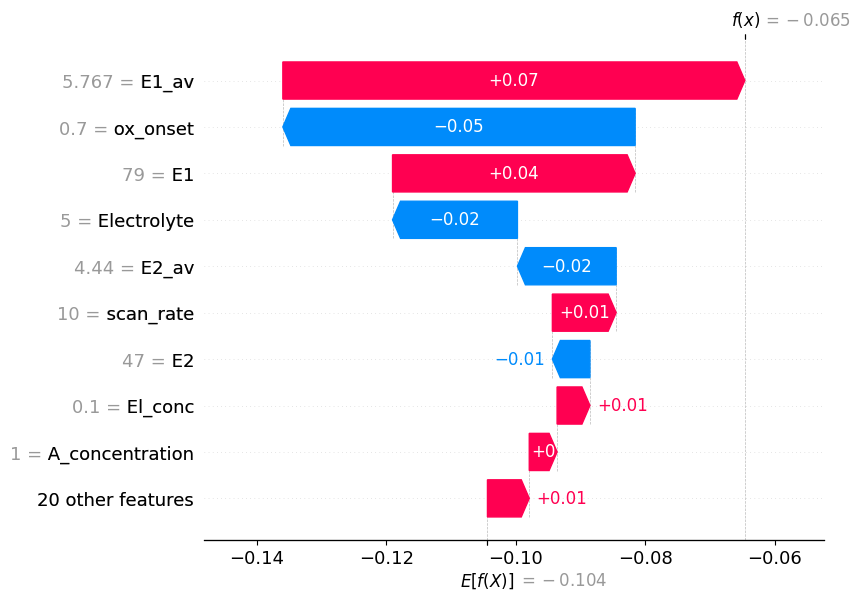

In [ ]:
class AdaBoostWrapper:
    def __init__(self, model):
        self.model = model

    def __call__(self, X):
        if isinstance(X, pd.DataFrame):
            return self.model.predict(X)
        else:
            return self.model.predict(X.reshape(1, -1))
# SHAP
ada_onset_model.fit(X_train_onset, y_train_onset)

# Criar o wrapper
model_wrapper = AdaBoostWrapper(ada_onset_model)

# Criar o explainer usando o wrapper
explainer = shap.Explainer(model_wrapper, X_train_onset)

# Calcular os valores SHAP
shap_values = explainer(X_test_onset)

# Visualizar
shap.initjs()
shap.plots.waterfall(shap_values[0])

PermutationExplainer explainer: 63it [00:49,  1.00s/it]


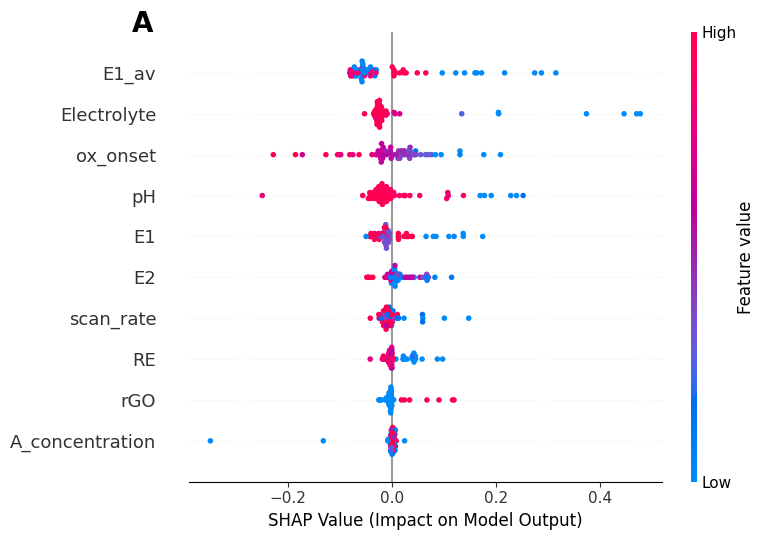

In [ ]:
import shap
import matplotlib.pyplot as plt

# Gerando os valores SHAP (ajuste o modelo e os dados de acordo com o seu caso)
explainer = shap.Explainer(model_wrapper, masker=X_train_onset)
shap_values = explainer(X_test_onset)

# Criar uma nova figura para o gráfico
plt.figure(figsize=(10, 6))

# Gerar o gráfico SHAP sem exibir automaticamente
shap.summary_plot(shap_values, X_test_onset, max_display=10, show=False)


# Adicionar a letra "A" ao canto superior esquerdo do gráfico
plt.text(
    x=-0.5,  # Posição no eixo X (ajuste conforme necessário)
    y=10,  # Posição no eixo Y, perto do topo
    s="A",  # Texto que será exibido
    fontsize=20,
    color="black",
    fontweight="bold"
)

# Adicionar título e rótulos
plt.xlabel("SHAP Value (Impact on Model Output)", fontsize=12)
plt.savefig("shap_onset.png", dpi=300, bbox_inches='tight', transparent=True)
# Exibir o gráfico
plt.tight_layout()
plt.show()


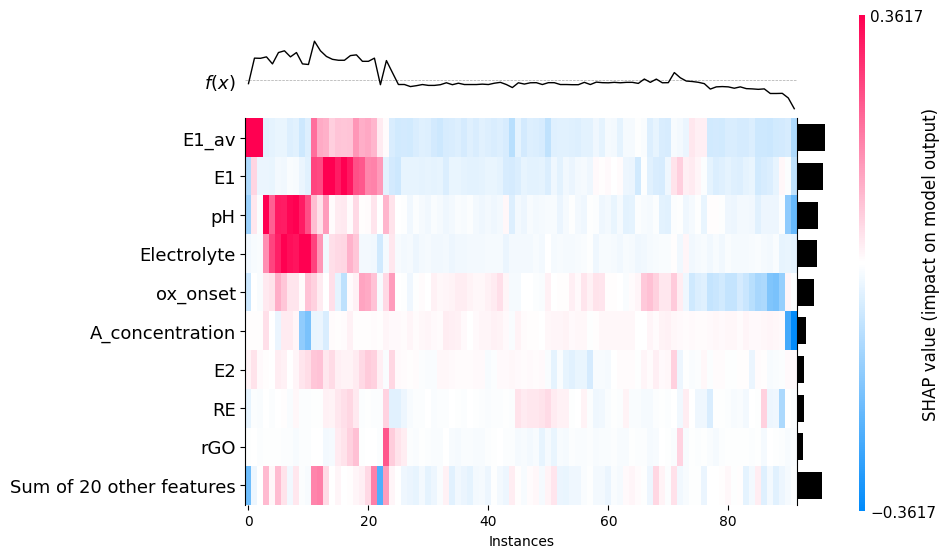

<Axes: xlabel='Instances'>

In [ ]:
shap.plots.heatmap(shap_values)

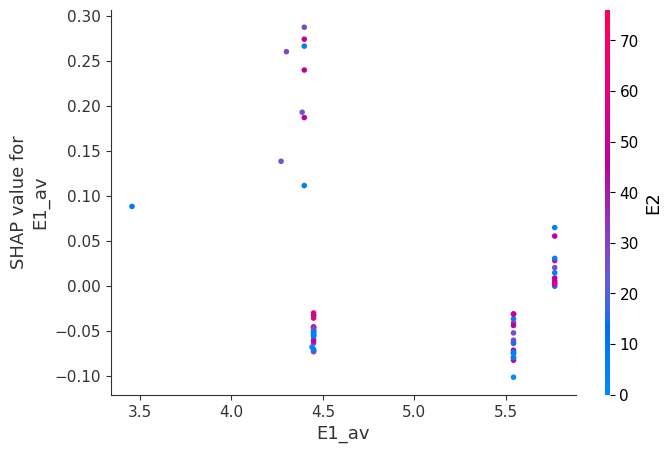

In [ ]:
feature_to_plot = "E1_av"  # Substitua pelo nome real da feature
shap.dependence_plot(feature_to_plot, shap_values.values, X_test_onset)

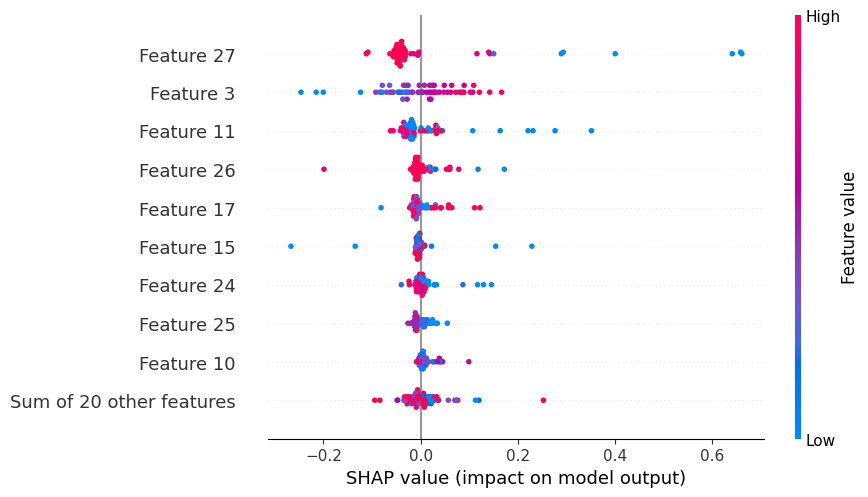

In [ ]:
shap.plots.beeswarm(shap_values)

In [ ]:
best_results_ada_onset = []

for random_state in range(1, 100):
    # Melhor hiperparâmetros encontrados
    best_params_onset = {'estimator__max_depth': 52, 'learning_rate': 0.8450247602329297, 'n_estimators': 74, 'random_state': 100}

    # Treinar o modelo com os melhores parâmetros
    best_base_model_onset = DecisionTreeRegressor(max_depth=best_params_onset['estimator__max_depth'])
    best_model_onset = AdaBoostRegressor(estimator=best_base_model_onset,
                               n_estimators=best_params_onset['n_estimators'],
                               learning_rate=best_params_onset['learning_rate'],
                               random_state=random_state)
    best_model_onset.fit(X_train_onset, y_train_onset)

    y_pred = best_model_onset.predict(X_test_onset)

    mae = metrics.mean_absolute_error(y_test_onset, y_pred)
    mse = metrics.mean_squared_error(y_test_onset, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test_onset, y_pred)

    best_results_ada_onset.append({'Random State': random_state, 'RMSE': rmse, 'R2 Score': r2})

results_df = pd.DataFrame(best_results_ada_onset)


sorted_results_onset = results_df.sort_values(by='RMSE', ascending=True)
display(sorted_results_onset)

Random State      RMSE  R2 Score
16            17  0.104608  0.923015
36            37  0.105708  0.921387
88            89  0.105733  0.921351
1              2  0.105966  0.921003
33            34  0.107010  0.919440
..           ...       ...       ...
97            98  0.167757  0.802013
30            31  0.171000  0.794285
25            26  0.171017  0.794243
85            86  0.172360  0.790998
58            59  0.174563  0.785623

[99 rows x 3 columns]

In [ ]:
best_20_onset = pd.DataFrame(sorted_results_onset.head(20))
best_20_onset = best_20_onset.reset_index(drop=True)
display(best_20_onset)

Random State      RMSE  R2 Score
0             17  0.104608  0.923015
1             37  0.105708  0.921387
2             89  0.105733  0.921351
3              2  0.105966  0.921003
4             34  0.107010  0.919440
5             62  0.108306  0.917476
6             96  0.108515  0.917157
7             78  0.109122  0.916227
8             20  0.114813  0.907262
9             99  0.115991  0.905349
10            81  0.118694  0.900887
11            91  0.118883  0.900570
12            42  0.119427  0.899659
13            49  0.119986  0.898717
14            67  0.122916  0.893709
15            66  0.123429  0.892821
16             4  0.123997  0.891832
17            43  0.124438  0.891062
18            90  0.125249  0.889637
19            29  0.125574  0.889062

In [ ]:
predicted = []

for i in range (0,20) :

    # Treinar o modelo com os melhores parâmetros
    best_base_model_onset = DecisionTreeRegressor(max_depth=best_params_onset['estimator__max_depth'])
    best_model_onset = AdaBoostRegressor(estimator=best_base_model_onset,
                               n_estimators=best_params_onset['n_estimators'],
                               learning_rate=best_params_onset['learning_rate'],
                               random_state=best_20_onset['Random State'][i])
    best_model_onset.fit(X_train_onset, y_train_onset)

    y_pred = best_model_onset.predict(X_test_onset)

    predicted.append(y_pred)

predicted_result = pd.DataFrame(predicted)

In [ ]:
results = []  # Initialize results as a list

for i in range(1, 21):
    selected_rows = predicted_result.iloc[0:i]

    sum_rows = selected_rows.sum(axis=0)
    num_rows = selected_rows.shape[0]

    mean_values_rows = sum_rows / num_rows

    mae = metrics.mean_absolute_error(y_test_onset, mean_values_rows)
    mse = metrics.mean_squared_error(y_test_onset, mean_values_rows)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test_onset, mean_values_rows)

    results.append({'Number': i, 'RMSE': rmse, 'R2 Score': r2})  # Append to the list

results = pd.DataFrame(results)  # Create a DataFrame outside the loop

In [ ]:

selected_rows = predicted_result.copy()

sum_rows = selected_rows.sum(axis=0)
num_rows = selected_rows.shape[0]

mean_values_rows = sum_rows / num_rows

mae = metrics.mean_absolute_error(y_test_onset, mean_values_rows)
mse = metrics.mean_squared_error(y_test_onset, mean_values_rows)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_onset, mean_values_rows)

In [ ]:

print('Mean Absolute Error:', mae)
print('Mean Square Error:', mse)

print('Root Mean Square Error:', rmse)
print('R2 Score:', r2)

Mean Absolute Error: 0.07571467741935484
Mean Square Error: 0.010968665366032256
Root Mean Square Error: 0.10473139627653331
R2 Score: 0.922833235132164


In [ ]:
# Supondo que y_test e mean_values_rows já estejam definidos
# Se y_test for um Series, transforme em DataFrame para melhor manipulação
df = pd.DataFrame(y_test_onset)
df = df.reset_index(drop=True)

# Se mean_values_rows também for um Series, transforme em DataFrame
df_dif = pd.DataFrame(mean_values_rows)
df_dif = df_dif.reset_index(drop=True)

# Adicionando a predição ao DataFrame original
df['Predicted value'] = df_dif

# Convertendo colunas para valores numéricos
df.iloc[:, 0] = pd.to_numeric(df.iloc[:, 0], errors='coerce')
df['Predicted value'] = pd.to_numeric(df['Predicted value'], errors='coerce')

# Calculando a diferença absoluta
diferenca_absoluta = (df.iloc[:, 0] - df['Predicted value']).abs()

# Ordenando o DataFrame pela diferença absoluta
df['Absolute Error'] = diferenca_absoluta
df_ordenado = df.sort_values(by='Absolute Error')

# Extraindo valores ordenados
mean_values_rows = df_ordenado['Predicted value']
y_test_onset = df_ordenado.iloc[:, 0]

real_value = y_test_onset
pred_value = mean_values_rows

# Exibindo resultados
print("Valores reais ordenados:")
print(real_value.head())

print("Valores preditos ordenados:")
print(pred_value.head())

# Calculando métricas de avaliação
mae = metrics.mean_absolute_error(real_value, pred_value)
mse = metrics.mean_squared_error(real_value, pred_value)
rmse = np.sqrt(metrics.mean_squared_error(real_value, pred_value))
r2 = r2_score(real_value, pred_value)

print('Mean Absolute Error:', mae)
print('Mean Square Error:', mse)
print('Root Mean Square Error:', rmse)
print('R2 Score:', r2)


Valores reais ordenados:
60    0.449
52   -0.201
5     0.449
36   -0.200
1    -0.306
Name: onset_pot, dtype: float64
Valores preditos ordenados:
60    0.44900
52   -0.20100
5     0.44900
36   -0.20015
1    -0.30445
Name: Predicted value, dtype: float64
Mean Absolute Error: 0.07571467741935485
Mean Square Error: 0.010968665366032256
Root Mean Square Error: 0.10473139627653331
R2 Score: 0.922833235132164


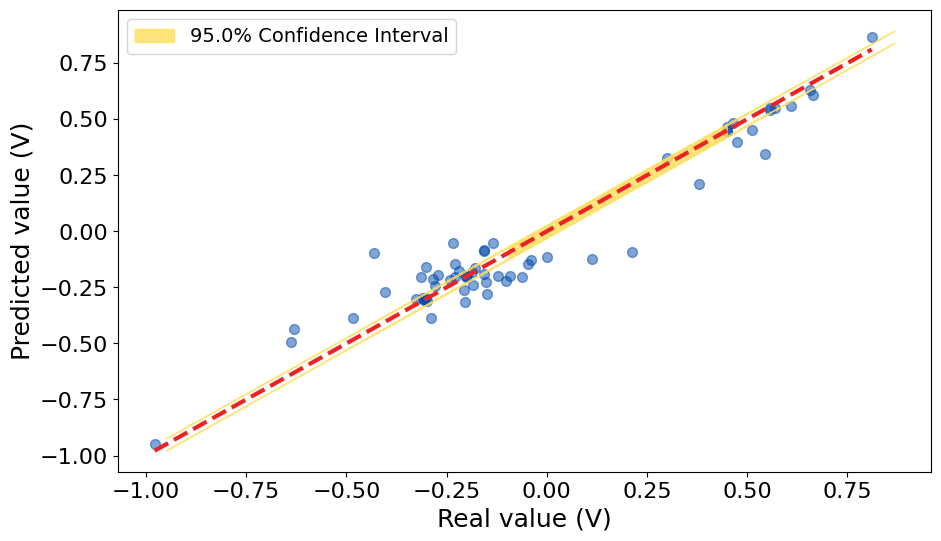

In [ ]:
# Supondo que você já tenha os arrays real_value e pred_value definidos

# Cria uma figura
plt.figure(figsize=(10.5, 6))

# Scatter plot para todas as previsões
plt.scatter(real_value, pred_value, c='#004aad', alpha=0.5, s=50)

# Linha diagonal
plt.plot([min(real_value), max(real_value)], [min(real_value), max(real_value)], '--', c='#ed2225', linewidth=3)

# Confidence level (e.g., 95%)
confidence_level = 0.95
alpha = 1 - confidence_level

# Calculate standard errors of coefficients
se_slope = np.sqrt(np.mean((real_value - pred_value) ** 2) / (len(real_value) - 2)) / np.std(pred_value)
se_intercept = se_slope * np.sqrt(np.mean(pred_value**2))

# Calculate t-critical value
t_critical = t.ppf(1 - alpha / 2, df=len(real_value) - 2)

# Calculate confidence intervals for slope and intercept
slope_interval = t_critical * se_slope
intercept_interval = t_critical * se_intercept

# Generate predictions and prediction intervals
lower_bound = pred_value - t_critical * np.sqrt(np.mean((real_value - pred_value) ** 2) / (len(real_value) - 2))
upper_bound = pred_value + t_critical * np.sqrt(np.mean((real_value - pred_value) ** 2) / (len(real_value) - 2))

# Configurações do gráfico
plt.xlabel('Real value (V)', fontsize=18)
plt.ylabel('Predicted value (V)', fontsize=18)
plt.fill_between(pred_value, lower_bound, upper_bound, color='#ffde59', alpha=0.8, label=f'{confidence_level * 100}% Confidence Interval')
plt.tick_params(axis='both', which='major', labelsize=16)
plt.legend(fontsize=14)
plt.savefig("grafico_com_barras_de_erro.png", bbox_inches='tight', transparent=True)
plt.show()


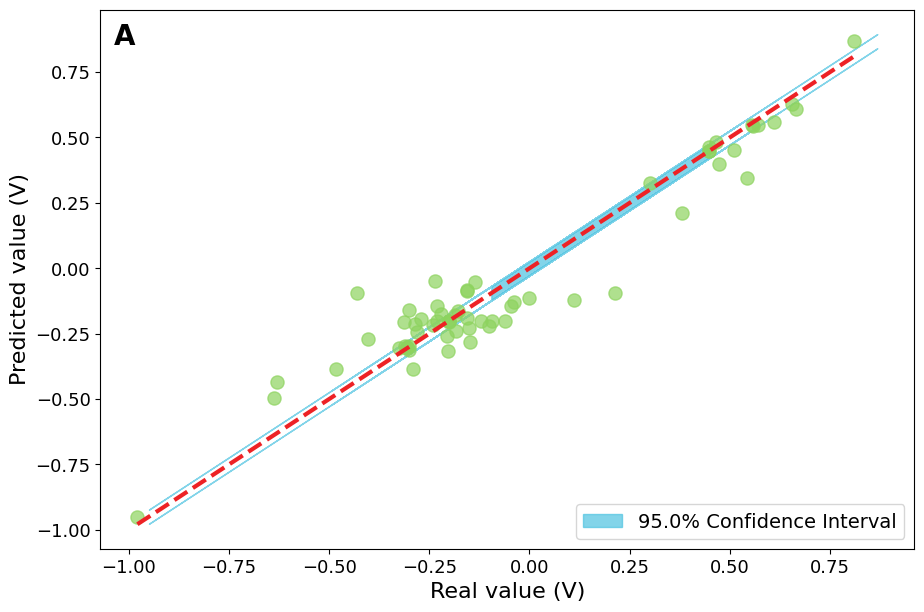

In [ ]:
# Supondo que você já tenha os arrays real_value e pred_value definidos

# Cria uma figura
plt.figure(figsize=(10.5, 7))


# Linha diagonal
plt.plot([min(real_value), max(real_value)], [min(real_value), max(real_value)], '--', c='#ed2225', linewidth=3)

# Confidence level (e.g., 95%)
confidence_level = 0.95
alpha = 1 - confidence_level

# Calculate standard errors of coefficients
se_slope = np.sqrt(np.mean((real_value - pred_value) ** 2) / (len(real_value) - 2)) / np.std(pred_value)
se_intercept = se_slope * np.sqrt(np.mean(pred_value**2))

# Calculate t-critical value
t_critical = t.ppf(1 - alpha / 2, df=len(real_value) - 2)

# Calculate confidence intervals for slope and intercept
slope_interval = t_critical * se_slope
intercept_interval = t_critical * se_intercept

# Generate predictions and prediction intervals
lower_bound = pred_value - t_critical * np.sqrt(np.mean((real_value - pred_value) ** 2) / (len(real_value) - 2))
upper_bound = pred_value + t_critical * np.sqrt(np.mean((real_value - pred_value) ** 2) / (len(real_value) - 2))

# Configurações do gráfico
plt.xlabel('Real value (V)', fontsize=16)
plt.ylabel('Predicted value (V)', fontsize=16)
plt.fill_between(pred_value, lower_bound, upper_bound, color='#4dc3e1ff', alpha=0.7, label=f'{confidence_level * 100}% Confidence Interval')
plt.tick_params(axis='both', which='major', labelsize=13)
# Scatter plot para todas as previsões
plt.scatter(real_value, pred_value, c='#8dd35eff', alpha=0.7, s=90)
plt.legend(fontsize=14, loc='lower right')
plt.text(
    0.03, 0.95, 'A',  # Ajuste de posição (x, y)
    transform=plt.gca().transAxes,  # Coordenadas relativas ao gráfico
    fontsize=20, fontweight='bold',
    ha='center', va='center', color='black'
)
plt.savefig("predvsreal_best_onset.png", dpi = 300, bbox_inches='tight', transparent=True)
plt.show()


In [ ]:
# Feature Importance

feature_importances_list = []

random_state_values = [45]

# Assuming best_20_onset has at least one row
# Access the first element of 'Random State' if it exists
random_state_from_best_20 = best_20_onset['Random State'].iloc[0] if 'Random State' in best_20_onset and not best_20_onset['Random State'].empty else None

for random_state in random_state_values:
    best_base_model_onset = DecisionTreeRegressor(max_depth=best_params_onset['estimator__max_depth'])
    ada_onset = AdaBoostRegressor(estimator=best_base_model_onset,
                               n_estimators=best_params_onset['n_estimators'],
                               learning_rate=best_params_onset['learning_rate'],
                               # Use the extracted random state or a default if it's not available
                               random_state=random_state_from_best_20 if random_state_from_best_20 is not None else random_state)
    ada_onset.fit(X_train_onset, y_train_onset)

    importances = ada_onset.feature_importances_

    feature_importances_list.append(ada_onset.feature_importances_)

feature_importances_matrix = np.array(feature_importances_list)

average_feature_importances = np.mean(feature_importances_matrix, axis=0)

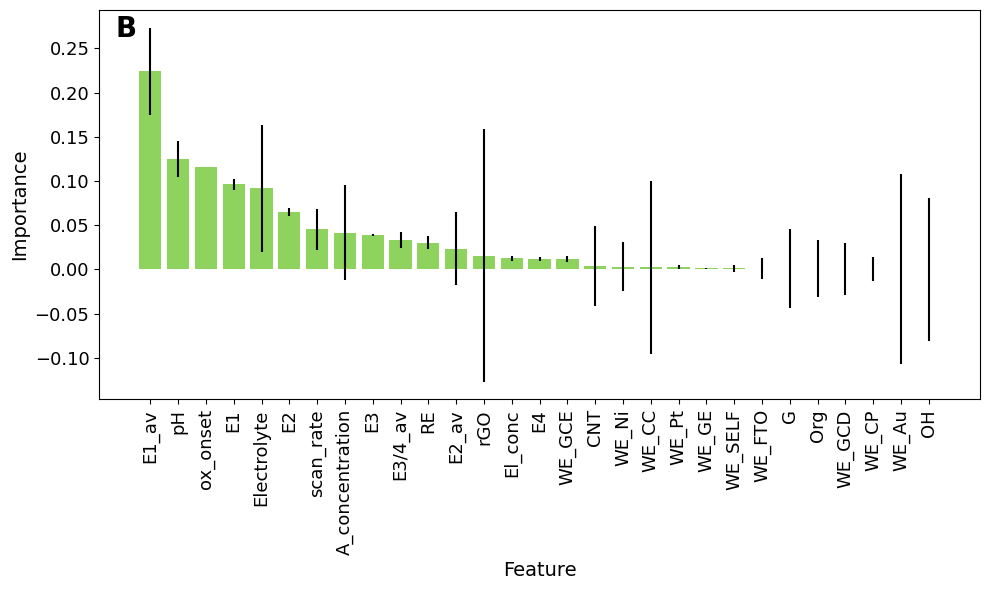

In [ ]:
ada_onset.fit(X_onset, y_onset)

# Obtendo as importâncias das features
importances = ada_onset.feature_importances_

# Criando um DataFrame para armazenar as importâncias das features
feature_importance_df = pd.DataFrame({
    'Feature': X_onset.columns,
    'Importance': importances
})

# Ordenando as features por importância
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Calculando o desvio padrão das importâncias das features entre as árvores
std_deviation = np.std([tree.feature_importances_ for tree in ada_onset.estimators_], axis=0)
feature_importance_df['Std_Dev'] = std_deviation

# Configurações do gráfico
plt.figure(figsize=(10, 6))
bar_color = '#8dd35eff'  # Cor das barras

# Plotando o gráfico de barras
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'], color=bar_color, yerr=feature_importance_df['Std_Dev'])
plt.xticks(rotation=90, fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Feature', fontsize=14)
plt.ylabel('Importance', fontsize=14)
plt.text(
    0.03, 0.95, 'B',  # Ajuste de posição (x, y)
    transform=plt.gca().transAxes,  # Coordenadas relativas ao gráfico
    fontsize=20, fontweight='bold',
    ha='center', va='center', color='black'
)
#plt.title('Feature Importance', fontsize=16)
plt.tight_layout()
plt.savefig("feature_importance_onset.png", bbox_inches='tight', transparent=True)
plt.show()

### ANN

In [ ]:
# Função para construir o modelo
def build_model(input_shape, learning_rate=0.001, dropout_rate=0.0):
    model = Sequential()
    model.add(Dense(64, input_shape=(input_shape,), activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1))
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss=MeanSquaredError())
    return model

# Parâmetros a serem testados
learning_rates = [0.001, 0.01, 0.1]
dropout_rates = [0.0, 0.2, 0.5]
batch_sizes = [16, 32, 64]
epochs = 100

# Dividir o conjunto de dados em treino e validação para o onset potential
X_train_onset, X_val_onset, y_train_onset, y_val_onset = train_test_split(X_onset, y_onset, test_size=0.2, random_state=50)

# Normalização
scaler = StandardScaler()
X_train_scaled_onset = scaler.fit_transform(X_train_onset)
X_val_scaled_onset = scaler.transform(X_val_onset)

best_score = float('inf')
best_params = {}

for lr in learning_rates:
    for dr in dropout_rates:
        for bs in batch_sizes:
            model = build_model(input_shape=X_train_scaled_onset.shape[1], learning_rate=lr, dropout_rate=dr)
            model.fit(X_train_scaled_onset, y_train_onset, epochs=epochs, batch_size=bs, validation_data=(X_val_scaled_onset, y_val_onset), verbose=0)

            y_pred_val_onset = model.predict(X_val_scaled_onset)
            mse_onset = mean_squared_error(y_val_onset, y_pred_val_onset)

            if mse_onset < best_score:
                best_score = mse_onset
                best_params = {'learning_rate': lr, 'dropout_rate': dr, 'batch_size': bs}

# Melhor modelo
best_model_onset = build_model(input_shape=X_train_scaled_onset.shape[1], learning_rate=best_params['learning_rate'], dropout_rate=best_params['dropout_rate'])
best_model_onset.fit(X_train_scaled_onset, y_train_onset, epochs=epochs, batch_size=best_params['batch_size'], verbose=1)

# Previsões e avaliação no conjunto de validação
y_pred_onset_val = best_model_onset.predict(X_val_scaled_onset)
mse_onset_val = mean_squared_error(y_val_onset, y_pred_onset_val)
rmse_onset_val = np.sqrt(mse_onset_val)
r2_onset_val = r2_score(y_val_onset, y_pred_onset_val)

# Imprimir os melhores parâmetros e métricas de avaliação
print('Best Parameters for Onset Potential:', best_params)
print('Validation Set - Mean Squared Error:', mse_onset_val)
print('Validation Set - RMSE:', rmse_onset_val)
print('Validation Set - R2 Score:', r2_onset_val)

# Comparar os valores reais e preditos
reg_model_diff_onset = pd.DataFrame({'Actual value': y_val_onset, 'Predicted value': y_pred_onset_val})
print(reg_model_diff_onset)

# Plotar os valores reais vs preditos
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_val_onset, y_pred_onset_val, color='blue')
plt.plot([min(y_val_onset), max(y_val_onset)], [min(y_val_onset), max(y_val_onset)], color='red', linewidth=2)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted values (Best Model for Onset Potential)')
plt.show()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


KeyboardInterrupt: 

In [ ]:
# Definição da função para construir o modelo de rede neural
def build_model(input_shape, learning_rate=0.01, dropout_rate=0.2):
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(input_shape,)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1))  # Saída para regressão

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# Parâmetros específicos
best_learning_rate = 0.01
best_dropout_rate = 0.2
epochs = 100
best_batch_size = 32

# Treinamento do modelo ANN
ann_model_onset = build_model(input_shape=X_train_onset.shape[1], learning_rate=best_learning_rate, dropout_rate=best_dropout_rate)
ann_model_onset.fit(X_train_onset, y_train_onset, epochs=epochs, batch_size=best_batch_size, verbose=0)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### LASSO

Training MSE: 0.06681228925103226
Testing MSE: 0.06819670031783699
Training RMSE: 0.2584807328429573
Testing RMSE: 0.26114497949958176
Training R2 Score: 0.5203994279529487
Testing R2 Score: 0.5202225099795856


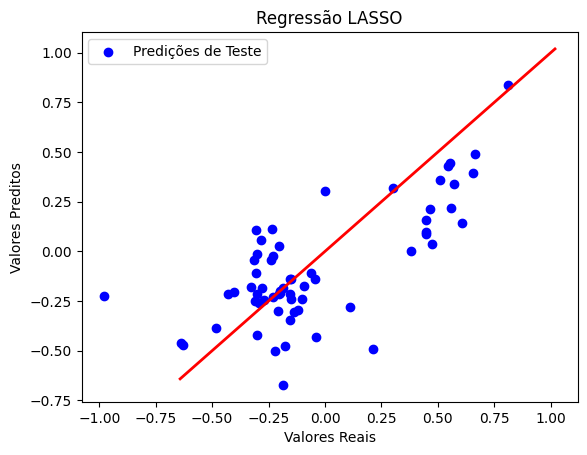

In [ ]:
# Criação do modelo LASSO
lasso = Lasso(alpha=0.001)

# Treinamento do modelo
lasso.fit(X_train_onset, y_train_onset)

# Predição
y_train_pred_onset = lasso.predict(X_train_onset)
y_test_pred_onset = lasso.predict(X_test_onset)

# Avaliação do modelo
mse_train = mean_squared_error(y_train_onset, y_train_pred_onset)
mse_test = mean_squared_error(y_test_onset, y_test_pred_onset)
r2_train = r2_score(y_train_onset, y_train_pred_onset)
r2_test = r2_score(y_test_onset, y_test_pred_onset)

# Cálculo do RMSE
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

# Exibir resultados
print(f'Training MSE: {mse_train}')
print(f'Testing MSE: {mse_test}')
print(f'Training RMSE: {rmse_train}')
print(f'Testing RMSE: {rmse_test}')
print(f'Training R2 Score: {r2_train}')
print(f'Testing R2 Score: {r2_test}')

# Plotando os resultados
plt.scatter(y_test_onset, y_test_pred_onset, color='blue', label='Predições de Teste')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel('Valores Reais')
plt.ylabel('Valores Preditos')
plt.title('Regressão LASSO')
plt.legend()
plt.show()

### Histogram-Based Gradient(HBG)

In [ ]:
# Instanciar o modelo
model = HistGradientBoostingRegressor(random_state=50)

# Ajustar o modelo aos dados de treino
model.fit(X_train_onset, y_train_onset)

# Fazer previsões
y_pred_onset = model.predict(X_test_onset)

# Comparar o valor real de teste com o valor predito pelo modelo
reg_model_diff = pd.DataFrame({'Actual value': y_test_onset, 'Predicted value': y_pred})
print(reg_model_diff)

# Avaliar o modelo com as métricas
mae = mean_squared_error(y_test_onset, y_pred_onset, squared=False)
mse = mean_squared_error(y_test_onset, y_pred_onset)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_onset, y_pred_onset)

print('Mean Absolute Error:', mae)
print('Mean Square Error:', mse)
print('Root Mean Square Error:', rmse)
print('R2 Score:', r2)


     Actual value  Predicted value
114      -0.03930        -0.196431
74       -0.30600        -0.249463
256      -0.31296        -0.240142
82       -0.28000        -0.158069
234      -0.04600        -0.208600
..            ...              ...
233      -0.47500        -0.339541
67        0.61536         0.301271
280      -0.21300        -0.178678
38       -0.20000        -0.216960
205       0.32700        -0.043176

[92 rows x 2 columns]
Mean Absolute Error: 0.20896195035324433
Mean Square Error: 0.04366509669543175
Root Mean Square Error: 0.20896195035324433
R2 Score: 0.7011528439962631


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
# Inicializar o modelo HistGradientBoostingRegressor
model = HistGradientBoostingRegressor(random_state=50)

# Definir os hiperparâmetros para busca
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_iter': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'min_samples_leaf': [20, 30, 40]
}

# Configurar o GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=1)

# Ajustar o modelo com os dados de treinamento
grid_search.fit(X_train_onset, y_train_onset)

# Obter os melhores parâmetros
best_params = grid_search.best_params_
print("Melhores parâmetros encontrados: ", best_params)

# Treinar o modelo com os melhores parâmetros
best_model = HistGradientBoostingRegressor(**best_params, random_state=50)
best_model.fit(X_train_onset, y_train_onset)

# Fazer previsões no conjunto de teste
y_pred_onset = best_model.predict(X_test_onset)

# Avaliar o modelo com as métricas

mae = mean_squared_error(y_test_onset, y_pred_onset, squared=False)
mse = mean_squared_error(y_test_onset, y_pred_onset)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_onset, y_pred_onset)

# Imprimir as métricas de avaliação
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('R2 Score:', r2)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Melhores parâmetros encontrados:  {'learning_rate': 0.1, 'max_depth': 5, 'max_iter': 100, 'min_samples_leaf': 20}
Mean Squared Error: 0.042145445212270365
Root Mean Squared Error: 0.20529355862342677
R2 Score: 0.7115534513057427


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
# Inicializar o modelo HistGradientBoostingRegressor
model = HistGradientBoostingRegressor(random_state=50)

# Definir os hiperparâmetros para busca
param_dist = {
    'learning_rate': np.linspace(0.01, 0.3, 30),  # Taxa de aprendizado entre 0.01 e 0.3
    'max_iter': [50, 100, 200, 300, 500],         # Número de iterações
    'max_depth': [None, 3, 5, 7, 10],            # Profundidade máxima (None = ilimitado)
    'min_samples_leaf': [10, 20, 30, 40, 50],    # Mínimo de amostras em cada folha
}

# Configurar o RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=500,              # Número de iterações
    cv=5,                    # Validação cruzada com 5 folds
    scoring='neg_mean_squared_error',  # Métrica de avaliação
    verbose=1,               # Verbosidade para acompanhar o progresso
    n_jobs=-1,               # Utilizar todos os núcleos disponíveis
    random_state=42
)

# Ajustar o modelo com os dados de treinamento
random_search.fit(X_train_onset, y_train_onset)

# Obter os melhores parâmetros
best_params = random_search.best_params_
print("Melhores parâmetros encontrados: ", best_params)

# Treinar o modelo com os melhores parâmetros
best_model = HistGradientBoostingRegressor(**best_params, random_state=50)
best_model.fit(X_train_onset, y_train_onset)

# Fazer previsões no conjunto de teste
y_pred_onset = best_model.predict(X_test_onset)

# Avaliar o modelo com as métricas
mse = mean_squared_error(y_test_onset, y_pred_onset)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_onset, y_pred_onset)

# Imprimir as métricas de avaliação
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('R2 Score:', r2)


Fitting 5 folds for each of 500 candidates, totalling 2500 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Melhores parâmetros encontrados:  {'min_samples_leaf': 10, 'max_iter': 300, 'max_depth': 5, 'learning_rate': 0.10999999999999997}
Mean Squared Error: 0.024112016639236056
Root Mean Squared Error: 0.15528044512827768
R2 Score: 0.830367117931109


In [ ]:
# Fitting 5 folds for each of 500 candidates, totalling 2500 fits
# /usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
#   _data = np.array(data, dtype=dtype, copy=copy,
# Melhores parâmetros encontrados:  {'min_samples_leaf': 10, 'max_iter': 300, 'max_depth': 5, 'learning_rate': 0.10999999999999997}
# Mean Squared Error: 0.024112016639236056
# Root Mean Squared Error: 0.15528044512827768
# R2 Score: 0.830367117931109

### KNN Regression

In [ ]:
# Definir o modelo KNN
knn = KNeighborsRegressor()

# Definir a grade de parâmetros para o GridSearch
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [20, 30, 40, 50],
    'p': [1, 2]
}

# Utilizar GridSearchCV para encontrar os melhores hiperparâmetros
try:
    grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, n_jobs=1, scoring='neg_mean_squared_error')
    grid_search.fit(X_train_onset, y_train_onset)

    # Melhor modelo encontrado
    best_knn = grid_search.best_estimator_

    # Treinar o modelo com os melhores hiperparâmetros
    best_knn.fit(X_train_onset, y_train_onset)

    # Fazer previsões
    y_pred_onset = best_knn.predict(X_test_onset)

    # Avaliar o modelo com as métricas
    mae = mean_squared_error(y_test_onset, y_pred_onset, squared=False)
    mse = mean_squared_error(y_test_onset, y_pred_onset)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test_onset, y_pred_onset)

    # Imprimir os melhores parâmetros e as métricas de avaliação
    print('Best Parameters:', grid_search.best_params_)
    print('Mean Squared Error:', mse)
    print('Root Mean Squared Error:', rmse)
    print('R2 Score:', r2)

except Exception as e:
    print("An error occurred during the grid search process:", str(e))


Best Parameters: {'algorithm': 'auto', 'leaf_size': 20, 'metric': 'manhattan', 'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
Mean Squared Error: 0.06810708371757129
Root Mean Squared Error: 0.2609733390934241
R2 Score: 0.5208529807698035


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
# Best Parameters: {'algorithm': 'auto', 'leaf_size': 20, 'metric': 'manhattan', 'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
# Mean Squared Error: 0.06810708371757129
# Root Mean Squared Error: 0.2609733390934241
# R2 Score: 0.5208529807698035
# /usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
#   _data = np.array(data, dtype=dtype, copy=copy,
# /usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
#   warnings.warn(

### Linear Regression

In [ ]:
# Criar o modelo XGBoost para regressão
model = LinearRegression()


# Treinar o modelo
model.fit(X_train_onset, y_train_onset)

# Fazer previsões
y_pred_onset = model.predict(X_test_onset)

# Avaliar o modelo com as métricas
mae = mean_squared_error(y_test_onset, y_pred_onset, squared=False)
mse = mean_squared_error(y_test_onset, y_pred_onset)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_onset, y_pred_onset)

print('Linear Regression Metrics:')
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('R2 Score:', r2)



Linear Regression Metrics:
Mean Absolute Error: 0.2774647902870595
Mean Squared Error: 0.07698670984904192
Root Mean Squared Error: 0.2774647902870595
R2 Score: 0.4583830266837349


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


###Bayesian Ridge regression

Mean Squared Error (MSE): 0.06186076840245808
Root Mean Squared Error (RMSE): 0.2487182510441445
R2 Score: 0.564797064131521


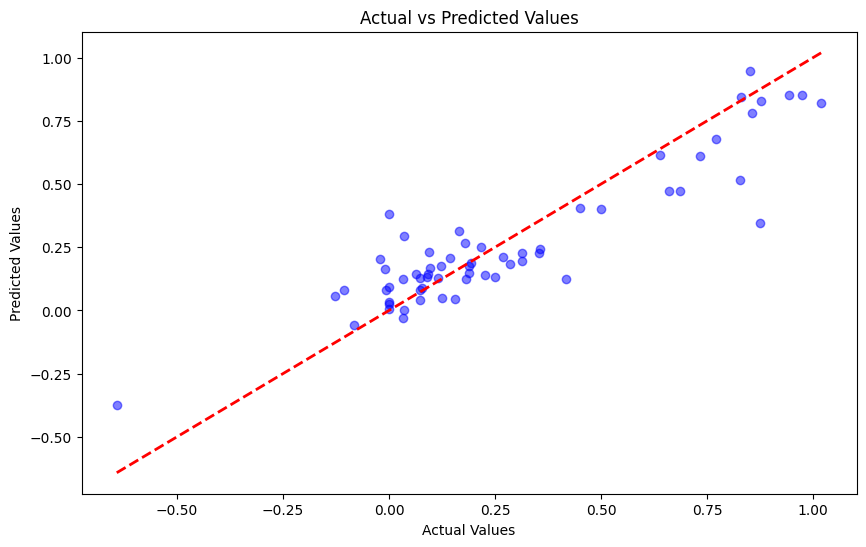

In [ ]:
# Instanciando o modelo Bayesian Ridge Regression
bayesian_ridge = BayesianRidge()

# Treinando o modelo
bayesian_ridge.fit(X_train_onset, y_train_onset)

# Fazendo previsões no conjunto de teste
y_pred_onset = bayesian_ridge.predict(X_test_onset)

# Avaliar o modelo com as métricas
mae = mean_absolute_error(y_test_onset, y_pred_onset)
mse = mean_squared_error(y_test_onset, y_pred_onset)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_onset, y_pred_onset)

# Imprimindo as métricas de avaliação
print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)
print('R2 Score:', r2)

# Plotando previsões versus valores reais
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()


In [ ]:
# Definir o modelo Bayesian Ridge
model = BayesianRidge()

# Definir a grade de hiperparâmetros para RandomizedSearchCV
param_dist = {
    'alpha_1': loguniform(1e-9, 1e-3),
    'alpha_2': loguniform(1e-9, 1e-3),
    'lambda_1': loguniform(1e-9, 1e-3),
    'lambda_2': loguniform(1e-9, 1e-3)
}

# Utilizar RandomizedSearchCV para encontrar os melhores hiperparâmetros
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=500, cv=5, verbose=1, random_state=50)
random_search.fit(X_train_onset, y_train_onset)

# Melhor modelo encontrado
best_model = random_search.best_estimator_

# Fazer previsões com o melhor modelo
y_pred_onset = best_model.predict(X_test_onset)

# Avaliar o modelo com as métricas
mae = mean_squared_error(y_test_onset, y_pred_onset, squared=False)
mse = mean_squared_error(y_test_onset, y_pred_onset)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_onset, y_pred_onset)

print('Bayesian Ridge Regression Metrics:')
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('R2 Score:', r2)

print('Best Parameters:', random_search.best_params_)


Fitting 5 folds for each of 500 candidates, totalling 2500 fits
Bayesian Ridge Regression Metrics:
Mean Absolute Error: 0.24781075018877663
Mean Squared Error: 0.06141016790912426
Root Mean Squared Error: 0.24781075018877663
R2 Score: 0.5679671291447268
Best Parameters: {'alpha_1': 2.15840643473397e-06, 'alpha_2': 3.0656679194337834e-09, 'lambda_1': 1.826367745989214e-05, 'lambda_2': 0.0009621177334450277}


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


###Decision Tree

In [ ]:
results = []

# Definindo o intervalo de valores para random_state
random_states = range(1, 100)  # ou qualquer intervalo que desejar

for rs_split in random_states:

    # Escolhendo o modelo como Decision Tree Regressor
    tree_reg = DecisionTreeRegressor(random_state=rs_split)

    # Ajustando o modelo com os dados de treino
    tree_reg.fit(X_train_onset, y_train_onset)

    # Fazendo predições com os dados de teste
    y_pred_tree = tree_reg.predict(X_test_onset)

    # Calculando as métricas de erro
    mae_tree = metrics.mean_absolute_error(y_test_onset, y_pred_tree)
    mse_tree = metrics.mean_squared_error(y_test_onset, y_pred_tree)
    rmse_tree = np.sqrt(metrics.mean_squared_error(y_test_onset, y_pred_tree))
    r2_tree = r2_score(y_test_onset, y_pred_tree)

    # Armazenando os resultados
    results.append((rs_split, mae_tree, mse_tree, rmse_tree, r2_tree))

# Convertendo os resultados para um DataFrame
results_df = pd.DataFrame(results, columns=['Random State', 'MAE', 'MSE', 'RMSE', 'R2'])

# Selecionando os 10 melhores valores de R2
top_10_r2 = results_df.nlargest(10, 'R2')

# Selecionando os 10 melhores valores de RMSE (os menores)
top_10_rmse = results_df.nsmallest(10, 'RMSE')

# Exibindo os resultados
print("Top 10 melhores valores de R2:")
print(top_10_r2)

print("\nTop 10 melhores valores de RMSE:")
print(top_10_rmse)

Top 10 melhores valores de R2:
    Random State       MAE       MSE      RMSE        R2
45            46  0.097995  0.028436  0.168630  0.799946
81            82  0.097154  0.030596  0.174916  0.784753
23            24  0.098578  0.030885  0.175741  0.782719
75            76  0.100518  0.031722  0.178107  0.776829
78            79  0.101839  0.031969  0.178799  0.775090
77            78  0.104277  0.032285  0.179681  0.772866
46            47  0.102877  0.032297  0.179712  0.772788
98            99  0.104787  0.032616  0.180598  0.770543
24            25  0.102779  0.032650  0.180694  0.770298
84            85  0.106128  0.032827  0.181183  0.769054

Top 10 melhores valores de RMSE:
    Random State       MAE       MSE      RMSE        R2
45            46  0.097995  0.028436  0.168630  0.799946
81            82  0.097154  0.030596  0.174916  0.784753
23            24  0.098578  0.030885  0.175741  0.782719
75            76  0.100518  0.031722  0.178107  0.776829
78            79  0.101

In [ ]:
tree_model = DecisionTreeRegressor(random_state = 46)


#aqui ele usara o dado de treino para ajustar o modelo
tree_model.fit(X_train_onset, y_train_onset)

#aqui ele testará a predição a partir dos dados de teste
y_pred_onset= tree_model.predict(X_test_onset)

#aqui vai comparar o valor de teste real e o predito pelo modelo
reg_model_diff = pd.DataFrame({'Actual value': y_test_onset, 'Predicted value': y_pred_onset})
reg_model_diff

# Avaliar o modelo com as métricas
mae = mean_squared_error(y_test_onset, y_pred_onset, squared=False)
mse = mean_squared_error(y_test_onset, y_pred_onset)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_onset, y_pred_onset)
print('Mean Absolute Error:', mae)
print('Mean Square Error:', mse)

print('Root Mean Square Error:', rmse)
print('R2 Score:', r2)




Mean Absolute Error: 0.16863027015605245
Mean Square Error: 0.02843616801290323
Root Mean Square Error: 0.16863027015605245
R2 Score: 0.7999458441325622


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### Gaussian Process Regression

In [ ]:
# Defina o kernel do GPR
kernel = RBF(length_scale=1.0, length_scale_bounds=(1e-1, 10.0)) + WhiteKernel(noise_level=1, noise_level_bounds=(1e-3, 1e0))

# Crie o modelo GPR com o kernel definido
model = GaussianProcessRegressor(kernel=kernel, random_state=50)

# Treine o modelo com os dados de treino
model.fit(X_train_onset, y_train_onset)

# Faça previsões nos dados de teste
y_pred_onset, sigma_onset = model.predict(X_test_onset, return_std=True)

# Calculando métricas de avaliação
mse = mean_squared_error(y_test_onset, y_pred_onset)
rmse = mean_squared_error(y_test_onset, y_pred_onset, squared=False)  # RMSE
r2 = r2_score(y_test_onset, y_pred_onset)

# Imprimindo as métricas de avaliação
print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)
print('R2 Score:', r2)


Mean Squared Error (MSE): 0.06260695848291412
Root Mean Squared Error (RMSE): 0.25021382552311955
R2 Score: 0.5595474669778344


/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__length_scale is close to the specified upper bound 10.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
# Defina a grade de hiperparâmetros
param_grid = {
    'kernel': [1.0 * RBF(length_scale=1.0, length_scale_bounds=(1e-1, 10.0)) + WhiteKernel(noise_level=1, noise_level_bounds=(1e-3, 1e0)),
               1.0 * RBF(length_scale=0.5, length_scale_bounds=(1e-2, 1.0)) + WhiteKernel(noise_level=1, noise_level_bounds=(1e-3, 1e0)),
               1.0 * RBF(length_scale=2.0, length_scale_bounds=(1e-1, 20.0)) + WhiteKernel(noise_level=1, noise_level_bounds=(1e-3, 1e0))]
}

# Crie o modelo GPR
model = GaussianProcessRegressor(random_state=50)

# Defina a métrica de avaliação - MSE
scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Inicialize o GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scorer, cv=5, verbose=1)

# Execute o GridSearchCV para encontrar os melhores hiperparâmetros
grid_search.fit(X_train_onset, y_train_onset)

# Obtenha o modelo com os melhores hiperparâmetros
best_model = grid_search.best_estimator_

# Faça previsões nos dados de teste
y_pred_onset = best_model.predict(X_test_onset)

# Calcule métricas de avaliação com os melhores hiperparâmetros
mse = mean_squared_error(y_test_onset, y_pred_onset)
r2 = best_model.score(X_test_onset, y_test_onset)
rmse = mean_squared_error(y_test_onset, y_pred_onset, squared=False)  # RMSE


print('Best parameters found by GridSearchCV:')
print(grid_search.best_params_)
print('Mean Squared Error (MSE):', mse)
print('Root mean squared error(RMSE):', rmse)
print('R2 Score:', r2)


Fitting 5 folds for each of 3 candidates, totalling 15 fits


/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified upper bound 10.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified upper bound 1.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified upper bound 1.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:452: Convergen

Best parameters found by GridSearchCV:
{'kernel': 1**2 * RBF(length_scale=1) + WhiteKernel(noise_level=1)}
Mean Squared Error (MSE): 0.059180149830849633
Root mean squared error(RMSE): 0.2432697059455814
R2 Score: 0.5836557544199721


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### CatBoost

In [ ]:
# Criando o modelo CatBoostRegressor
model = cb.CatBoostRegressor(
    iterations=5000,       # Número de árvores
    learning_rate=0.0384,    # Taxa de aprendizado
    depth=6,              # Profundidade da árvore
    verbose=0,            # Exibir a cada 10 iterações
)

# Treinando o modelo
model.fit(X_train_onset, y_train_onset)

# Fazendo previsões no conjunto de teste
y_pred_onset = model.predict(X_test_onset)

# Avaliando o desempenho do modelo
mse = mean_squared_error(y_test_onset, y_pred_onset)
rmse = mse ** 0.5
r2 = r2_score(y_test_onset, y_pred_onset)

# Exibindo os resultados
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R2 Score: {r2:.4f}")


Mean Squared Error (MSE): 0.0186
Root Mean Squared Error (RMSE): 0.1364
R2 Score: 0.8692


Train Mean Squared Error (MSE): 0.0000
Train Root Mean Squared Error (RMSE): 0.0004
Train R2 Score: 1.0000

Test Mean Squared Error (MSE): 0.0186
Test Root Mean Squared Error (RMSE): 0.1364
Test R2 Score: 0.8692


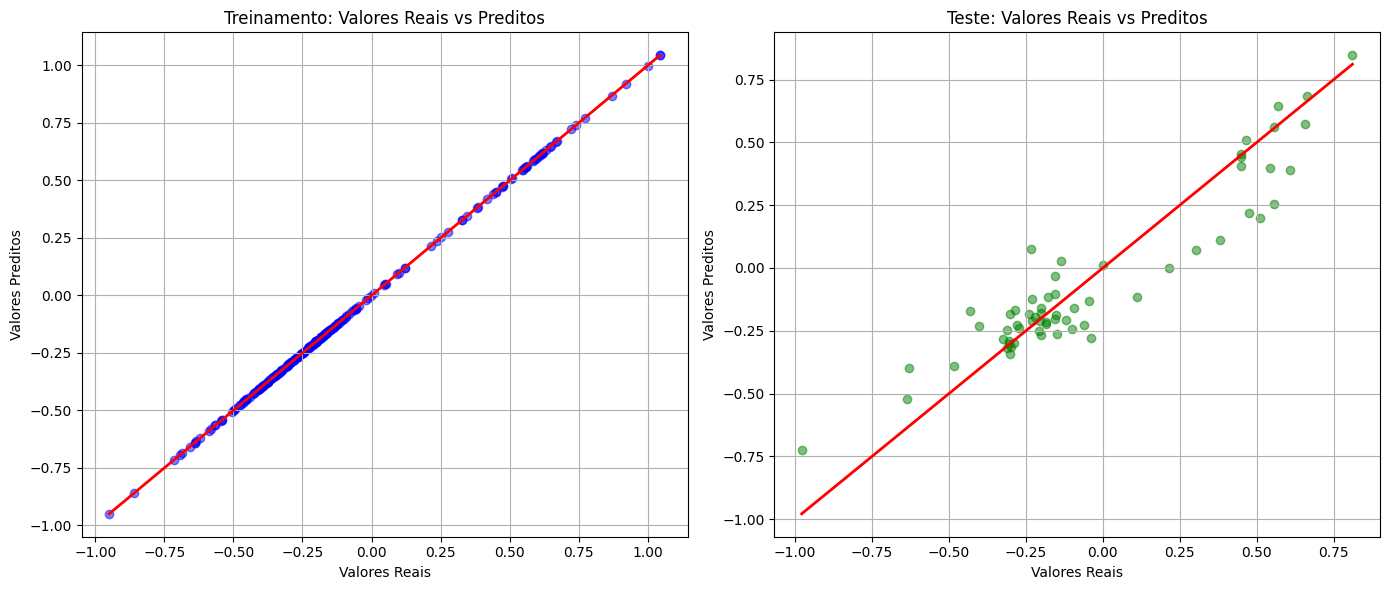

In [ ]:
# Criando o modelo CatBoostRegressor
model = cb.CatBoostRegressor(
    iterations=5000,       # Número de árvores
    learning_rate=0.0384,     # Taxa de aprendizado
    depth=6,               # Profundidade da árvore
    verbose=0,            # Exibir a cada 10 iterações
)

# Treinando o modelo
model.fit(X_train_onset, y_train_onset)

# Fazendo previsões nos conjuntos de treino e teste
y_train_pred_onset = model.predict(X_train_onset)
y_test_pred_onset = model.predict(X_test_onset)

# Avaliando o desempenho do modelo no conjunto de teste
mse_train = mean_squared_error(y_train_onset, y_train_pred_onset)
rmse_train = mse_train ** 0.5
r2_train = r2_score(y_train_onset, y_train_pred_onset)

mse_test = mean_squared_error(y_test_onset, y_test_pred_onset)
rmse_test = mse_test ** 0.5
r2_test = r2_score(y_test_onset, y_test_pred_onset)

# Exibindo os resultados
print(f"Train Mean Squared Error (MSE): {mse_train:.4f}")
print(f"Train Root Mean Squared Error (RMSE): {rmse_train:.4f}")
print(f"Train R2 Score: {r2_train:.4f}")
print()
print(f"Test Mean Squared Error (MSE): {mse_test:.4f}")
print(f"Test Root Mean Squared Error (RMSE): {rmse_test:.4f}")
print(f"Test R2 Score: {r2_test:.4f}")

# Gerando os gráficos
plt.figure(figsize=(14, 6))

# Gráfico para os dados de treinamento
plt.subplot(1, 2, 1)
plt.scatter(y_train_onset, y_train_pred_onset, color='blue', alpha=0.5)
plt.plot([min(y_train_onset), max(y_train_onset)], [min(y_train_onset), max(y_train_onset)], color='red', lw=2)
plt.title("Treinamento: Valores Reais vs Preditos")
plt.xlabel("Valores Reais")
plt.ylabel("Valores Preditos")
plt.grid(True)

# Gráfico para os dados de teste
plt.subplot(1, 2, 2)
plt.scatter(y_test_onset, y_test_pred_onset, color='green', alpha=0.5)
plt.plot([min(y_test_onset), max(y_test_onset)], [min(y_test_onset), max(y_test_onset)], color='red', lw=2)
plt.title("Teste: Valores Reais vs Preditos")
plt.xlabel("Valores Reais")
plt.ylabel("Valores Preditos")
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
# Valores de learning rate a serem testados
learning_rates = np.linspace(0.01, 0.1, 50)  # Testando 20 valores entre 0.01 e 0.1

# Variáveis para armazenar os melhores resultados
best_learning_rate = None
best_rmse = float('inf')
best_model = None

# Iterar pelos valores de learning rate
results = []
for lr in learning_rates:
    # Criar e treinar o modelo com o learning rate atual
    model = cb.CatBoostRegressor(
        iterations=5000,
        learning_rate=lr,
        depth=6,
        verbose=0
    )

    model.fit(X_train_onset, y_train_onset)

    # Fazer previsões no conjunto de teste
    y_pred_onset = model.predict(X_test_onset)

    # Calcular métricas
    mse = mean_squared_error(y_test_onset, y_pred_onset)
    rmse = mse ** 0.5
    r2 = r2_score(y_test_onset, y_pred_onset)

    # Armazenar resultados
    results.append((lr, mse, rmse, r2))

    # Atualizar o melhor modelo se o RMSE for menor
    if rmse < best_rmse:
        best_rmse = rmse
        best_learning_rate = lr
        best_model = model

# Exibir os resultados para cada learning rate
print(f"{'Learning Rate':<15} {'MSE':<10} {'RMSE':<10} {'R2 Score':<10}")
for lr, mse, rmse, r2 in results:
    print(f"{lr:<15.4f} {mse:<10.4f} {rmse:<10.4f} {r2:<10.4f}")

# Exibir o melhor learning rate encontrado
print("\nMelhor resultado:")
print(f"Learning Rate: {best_learning_rate:.4f}")
print(f"RMSE: {best_rmse:.4f}")


Learning Rate   MSE        RMSE       R2 Score  
0.0100          0.0190     0.1377     0.8665    
0.0118          0.0189     0.1376     0.8668    
0.0137          0.0187     0.1369     0.8681    
0.0155          0.0190     0.1380     0.8660    
0.0173          0.0190     0.1379     0.8663    
0.0192          0.0179     0.1338     0.8741    
0.0210          0.0186     0.1362     0.8695    
0.0229          0.0188     0.1371     0.8677    
0.0247          0.0193     0.1391     0.8639    
0.0265          0.0185     0.1362     0.8696    
0.0284          0.0185     0.1362     0.8695    
0.0302          0.0186     0.1365     0.8689    
0.0320          0.0192     0.1387     0.8646    
0.0339          0.0178     0.1332     0.8751    
0.0357          0.0180     0.1341     0.8735    
0.0376          0.0195     0.1397     0.8627    
0.0394          0.0189     0.1376     0.8667    
0.0412          0.0186     0.1362     0.8695    
0.0431          0.0183     0.1353     0.8711    
0.0449          0.01

### Ridge


Training MSE: 0.06613383165540276
Testing MSE: 0.0769857266569792
Training R2 Score: 0.5252696195692096
Testing R2 Score: 0.45838994363745633


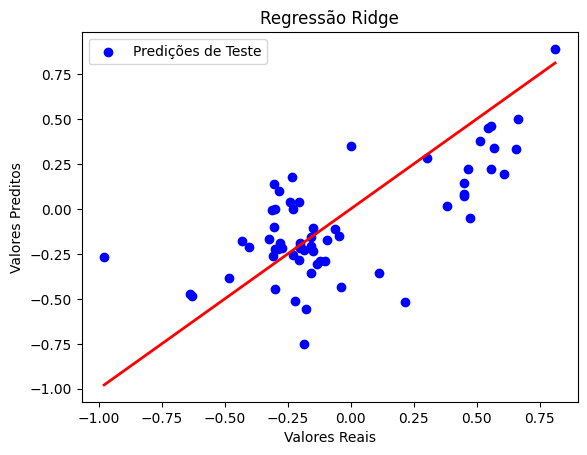

In [ ]:
# Criação do modelo Ridge
ridge = Ridge(alpha=0.0001)

# Treinamento do modelo
ridge.fit(X_train_onset, y_train_onset)

# Predição
y_train_pred_onset = ridge.predict(X_train_onset)
y_test_pred_onset = ridge.predict(X_test_onset)

# Avaliação do modelo
mse_train = mean_squared_error(y_train_onset, y_train_pred_onset)
mse_test = mean_squared_error(y_test_onset, y_test_pred_onset)
r2_train = r2_score(y_train_onset, y_train_pred_onset)
r2_test = r2_score(y_test_onset, y_test_pred_onset)

print(f'Training MSE: {mse_train}')
print(f'Testing MSE: {mse_test}')
print(f'Training R2 Score: {r2_train}')
print(f'Testing R2 Score: {r2_test}')

# Plotando os resultados
plt.scatter(y_test_onset, y_test_pred_onset, color='blue', label='Predições de Teste')
plt.plot([min(y_test_onset), max(y_test_onset)], [min(y_test_onset), max(y_test_onset)], color='red', linewidth=2)
plt.xlabel('Valores Reais')
plt.ylabel('Valores Preditos')
plt.title('Regressão Ridge')
plt.legend()
plt.show()


Melhor valor de alpha: 0.0001
RMSE com melhor alpha: 0.2774630185393708


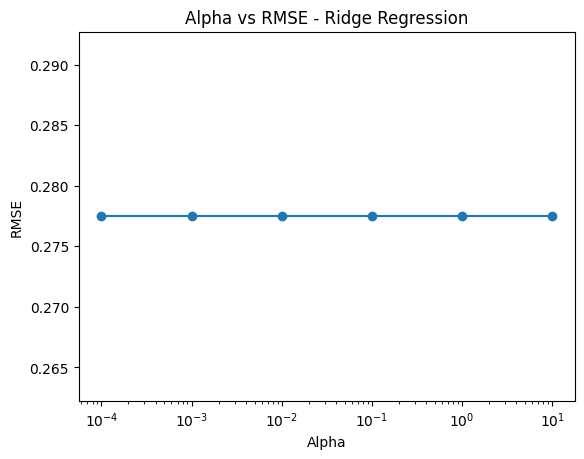

In [ ]:
# Lista de valores de alpha para testar
alpha_values = [0.0001, 0.001, 0.01, 0.1, 1, 10]

# Variáveis para armazenar o melhor alpha e seu respectivo RMSE
best_alpha = None
best_rmse = float('inf')

# Dicionário para armazenar os resultados
results = {}

# Iterar sobre os valores de alpha
for alpha in alpha_values:
    # Criar o modelo Ridge com o valor de alpha atual
    ridge = Ridge(alpha=alpha)

    # Treinar o modelo
    ridge.fit(X_train_onset, y_train_onset)

    # Fazer predições no conjunto de teste
    y_test_pred = ridge.predict(X_test_onset)

    # Calcular o MSE e RMSE
    mse_test = mean_squared_error(y_test_onset, y_test_pred_onset)
    rmse_test = np.sqrt(mse_test)

    # Armazenar os resultados
    results[alpha] = rmse_test

    # Verificar se este alpha tem o menor RMSE
    if rmse_test < best_rmse:
        best_rmse = rmse_test
        best_alpha = alpha

# Exibir o melhor valor de alpha e o RMSE correspondente
print(f'Melhor valor de alpha: {best_alpha}')
print(f'RMSE com melhor alpha: {best_rmse}')

# Plotar os valores de alpha vs RMSE
plt.plot(list(results.keys()), list(results.values()), marker='o')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('RMSE')
plt.title('Alpha vs RMSE - Ridge Regression')
plt.show()

### Onset potential algorithms - Overview

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1596 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Resultados da Avaliação:
       Model     MSE_Train  MSE_Test    RMSE_Train  RMSE_Test  R2_Train  \
0      Lasso  6.681229e-02  0.068197  2.584807e-01   0.261145  0.520399   
1      Ridge  6.613383e-02  0.076986  2.571650e-01   0.277463  0.525270   
2        KNN  0.000000e+00  0.068107  0.000000e+00   0.260973  1.000000   
3   CatBoost  1.329567e-07  0.018593  3.646323e-04   0.136355  0.999999   
4   AdaBoost  2.401153e-04  0.013851  1.549565e-02   0.117689  0.998276   
5        XGB  4.042834e-03  0.023909  6.358329e-02   0.154627  0.970979   
6        HGB  7.776646e-04  0.024112  2.788664e-02   0.155280  0.994418   
7         RF  3.904896e-04  0.020880  1.976081e-02   0.144498  0.997197   
8         LR  6.613383e-02  0.076987  2.571650e-01   0.277465  0.525270   
9        GPR  7.238462e-03  0.059180  8.507915e-02   0.243270  0.948040   
10       BRR  7.60000

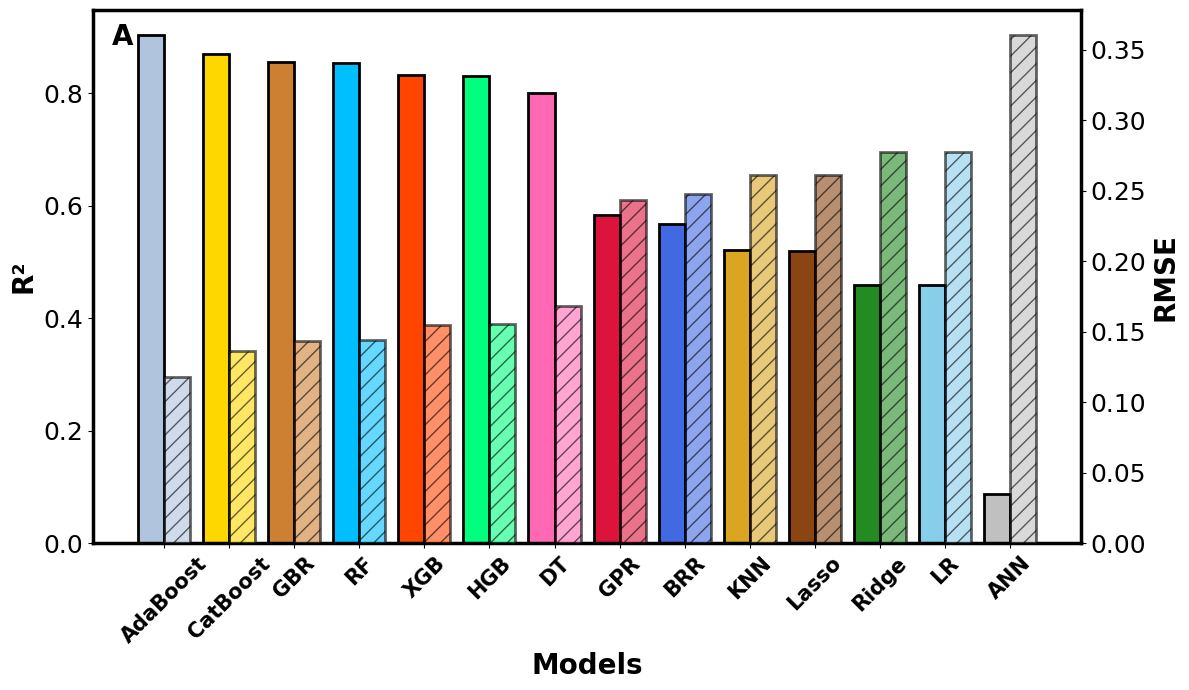

In [ ]:
class ModelEvaluator:
    def __init__(self, X_train_onset, X_test_onset, y_train_onset, y_test_onset):
        self.X_train = X_train_onset.copy()
        self.X_test = X_test_onset.copy()
        self.y_train = y_train_onset.copy()
        self.y_test = y_test_onset.copy()

        # Criar versões escalonadas dos dados
        self.scaler = StandardScaler()
        self.X_train_scaled = self.scaler.fit_transform(self.X_train)
        self.X_test_scaled = self.scaler.transform(self.X_test)

        # Definir modelos com seus respectivos parâmetros
        self.models = {
            'Lasso': Lasso(alpha=0.001),
            'Ridge': Ridge(alpha=0.0001),
            'KNN': KNeighborsRegressor(
                algorithm='auto', leaf_size=20,
                metric='manhattan', n_neighbors=3,
                p=1, weights='distance'
            ),
            'CatBoost': cb.CatBoostRegressor(
                iterations=5000, learning_rate=0.0384,
                depth=6, verbose=0
            ),
            'AdaBoost': AdaBoostRegressor(
                estimator=DecisionTreeRegressor(max_depth=52),
                random_state=100, learning_rate=0.8450247602329297,
                n_estimators=74
            ),
            'XGB': XGBRegressor(
                random_state =15,
                n_estimators=160, max_depth=3, learning_rate = 0.1256346712256433
            ),
            'HGB': HistGradientBoostingRegressor(
                learning_rate=0.10999999999999997, max_depth=5,
                max_iter=300, min_samples_leaf=10,
            ),
            'RF': RandomForestRegressor(
                n_estimators=92, min_samples_split=2,
                min_samples_leaf=1, max_features='log2',
                criterion='squared_error', bootstrap=False,
                random_state=10, max_depth=17
            ),
            'LR': LinearRegression(),
            'GPR': GaussianProcessRegressor(
                kernel=1.0 ** 2 * RBF(length_scale=1.0) + WhiteKernel(noise_level=1)
            ),
            'BRR': BayesianRidge(
                alpha_1=2.17e-09, alpha_2=0.000154,
                lambda_1=7.54e-05, lambda_2=0.000996
            ),
            'DT': DecisionTreeRegressor(random_state=46),
            'GBR': GradientBoostingRegressor(
                n_estimators=200,criterion = 'squared_error',
                max_depth=3, random_state=6
            ),
            'ANN': ann_model  # Assumindo que ann_model já está definido
        }

        # Lista de modelos que precisam de dados escalonados
        self.scaled_models = ['ANN', 'AdaBoost']

    def evaluate_model(self, name, model):
        """Avalia um único modelo e retorna suas métricas"""
        # Decide se usa dados escalonados ou não
        if name in self.scaled_models:
            X_train = self.X_train_scaled
            X_test = self.X_test_scaled
        else:
            X_train = self.X_train
            X_test = self.X_test

        # Treina o modelo
        model.fit(X_train, self.y_train)

        # Faz previsões
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Calcula métricas
        metrics = {
            'Model': name,
            'MSE_Train': mean_squared_error(self.y_train, y_train_pred),
            'MSE_Test': mean_squared_error(self.y_test, y_test_pred),
            'RMSE_Train': np.sqrt(mean_squared_error(self.y_train, y_train_pred)),
            'RMSE_Test': np.sqrt(mean_squared_error(self.y_test, y_test_pred)),
            'R2_Train': r2_score(self.y_train, y_train_pred),
            'R2_Test': r2_score(self.y_test, y_test_pred)
        }

        return metrics

    def evaluate_all_models(self):
        """Avalia todos os modelos e retorna um DataFrame com os resultados"""
        results = []
        for name, model in self.models.items():
            try:
                metrics = self.evaluate_model(name, model)
                results.append(metrics)
            except Exception as e:
                print(f"Erro ao avaliar {name}: {str(e)}")

        return pd.DataFrame(results)

    def plot_results(self, results_df):
        '''plotando'''
        import matplotlib.pyplot as plt
        import numpy as np

        # Cores metálicas personalizadas
        colors = [
            '#B0C4DE', '#FFD700', '#CD7F32', '#00BFFF',
            '#FF4500', '#00FF7F', '#FF69B4', '#DC143C',
            '#4169E1', '#DAA520', '#8B4513', '#228B22',
            '#87CEEB', '#C0C0C0'
        ]

        # Ordenar por R2
        results_sorted = results_df.sort_values('R2_Test', ascending=False)

        # Preparar figura
        fig, ax1 = plt.subplots(figsize=(12, 7))
        ax2 = ax1.twinx()

        # Configurar x
        x = np.arange(len(results_sorted['Model']))
        width = 0.4

        # R² Bars (eixo esquerdo)
        r2_bars = ax1.bar(
            x - width/2,
            results_sorted['R2_Test'],
            width,
            color=colors,
            edgecolor='black',
            linewidth=2,
            label='R²'
        )

        # RMSE Bars (eixo direito)
        rmse_bars = ax2.bar(
            x + width/2,
            results_sorted['RMSE_Test'],
            width,
            color=colors,
            edgecolor='black',
            linewidth=2,
            alpha=0.6,  # Mais transparente
            hatch='//',  # Adiciona hatch para alguns modelos
            label='RMSE'
        )

        # Configurações do eixo R²
        ax1.set_xlabel("Models", fontsize=20, fontweight='bold')
        ax1.set_ylabel("R²", color='black', fontsize=20, fontweight='bold')
        ax1.set_xticks(x)
        ax1.set_xticklabels(results_sorted['Model'], rotation=45, fontsize=15, fontweight='bold')
        ax1.tick_params(axis='y', labelcolor='black', labelsize=18)
        ax1.spines['left'].set_color('black')
        ax1.spines['left'].set_linewidth(2)

        # Configurações do eixo RMSE
        ax2.set_ylabel("RMSE", color='black', fontsize=20, fontweight='bold')
        ax2.tick_params(axis='y', labelcolor='black', labelsize=18)
        ax2.spines['right'].set_color('black')
        ax2.spines['right'].set_linewidth(2)

        # Ajustar espessura dos eixos
        ax1.spines['top'].set_linewidth(2.5)
        ax1.spines['right'].set_linewidth(2.5)
        ax1.spines['bottom'].set_linewidth(2.5)
        ax1.spines['left'].set_linewidth(2.5)

        plt.text(
        0.03, 0.95, 'A',  # Ajuste de posição (x, y)
        transform=plt.gca().transAxes,  # Coordenadas relativas ao gráfico
        fontsize=20, fontweight='bold',
        ha='center', va='center', color='black'
        )

        # Estilo geral
        plt.tight_layout()
        plt.savefig("onset_outputs.png", dpi=300, bbox_inches='tight')
        plt.show()


# Uso da classe
evaluator = ModelEvaluator(X_train_onset, X_test_onset, y_train_onset, y_test_onset)
results_df = evaluator.evaluate_all_models()
print("Resultados da Avaliação:")
print(results_df)
evaluator.plot_results(results_df)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1710 


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1996 


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1005 


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
<ipython-input-16-6493dc53561a>:142: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(sorted_results['Model'], rotation=90, fontsize=18, fontweight='bold')


Average Training Times (in seconds):
       Model      mean       std
0        ANN  0.063201  0.004532
1   AdaBoost  0.141408  0.002505
2        BRR  0.001964  0.000067
3   CatBoost  3.053815  1.090363
4         DT  0.002676  0.000047
5        GBR  0.165878  0.008110
6        GPR  0.110783  0.006919
7        HGB  0.188570  0.003457
8        KNN  0.000422  0.000138
9         LR  0.001235  0.000061
10     Lasso  0.001544  0.000143
11        RF  0.069370  0.000252
12     Ridge  0.001002  0.000220
13       XGB  0.031195  0.001006


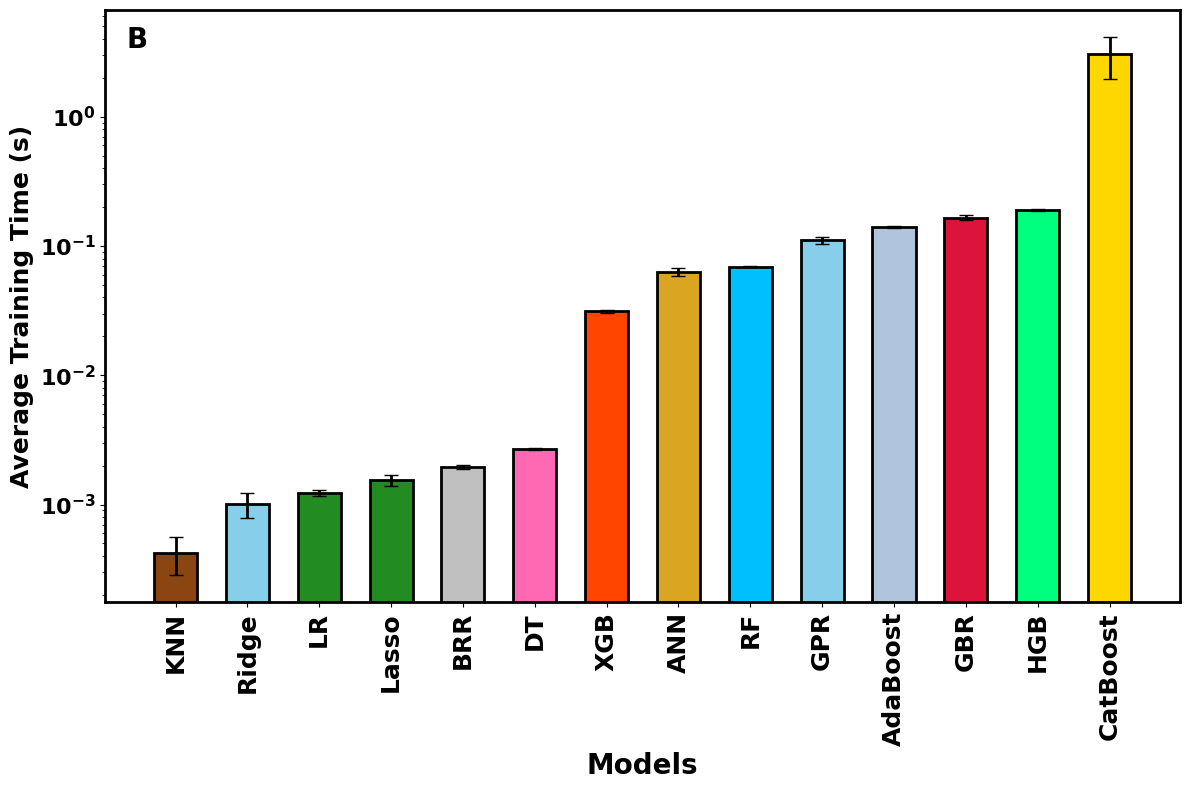

In [ ]:
import time
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Cores metálicas personalizadas
colors = [
    '#B0C4DE', '#FFD700', '#CD7F32', '#00BFFF',
    '#FF4500', '#00FF7F', '#FF69B4', '#DC143C',
    '#4169E1', '#DAA520', '#8B4513', '#228B22',
    '#87CEEB', '#C0C0C0'
]

# Função para calcular o tempo de treinamento
def calculate_training_time(name, model, X_train, y_train, scaler=None):
    if scaler is not None and name in ['ANN', 'AdaBoost']:
        X_train = scaler.transform(X_train)

    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time
    return {'Model': name, 'Training_Time': training_time}

# Definir modelos com seus hiperparâmetros otimizados
models = [
    ('Lasso', Lasso(alpha=0.001)),
    ('Ridge', Ridge(alpha=0.0001)),
    ('KNN', KNeighborsRegressor(
        algorithm='auto', leaf_size=20,
        metric='manhattan', n_neighbors=3,
        p=1, weights='distance'
    )),
    ('CatBoost', cb.CatBoostRegressor(
        iterations=5000, learning_rate=0.0384,
        depth=6, verbose=0
    )),
    ('AdaBoost', AdaBoostRegressor(
        estimator=DecisionTreeRegressor(max_depth=52),
        random_state=100, learning_rate=0.8450247602329297,
        n_estimators=74
    )),
    ('XGB', XGBRegressor(
        random_state=15, n_estimators=160,
        max_depth=3, learning_rate=0.1256346712256433
    )),
    ('HGB', HistGradientBoostingRegressor(
        learning_rate=0.10999999999999997, max_depth=5,
        max_iter=300, min_samples_leaf=10
    )),
    ('RF', RandomForestRegressor(
        n_estimators=92, min_samples_split=2,
        min_samples_leaf=1, max_features='log2',
        criterion='squared_error', bootstrap=False,
        random_state=10, max_depth=17
    )),
    ('LR', LinearRegression()),
    ('GPR', GaussianProcessRegressor(
        kernel=1.0 ** 2 * RBF(length_scale=1.0) + WhiteKernel(noise_level=1)
    )),
    ('BRR', BayesianRidge(
        alpha_1=2.17e-09, alpha_2=0.000154,
        lambda_1=7.54e-05, lambda_2=0.000996
    )),
    ('DT', DecisionTreeRegressor(random_state=46)),
    ('GBR', GradientBoostingRegressor(
        n_estimators=200, criterion='squared_error',
        max_depth=3, random_state=6
    )),
    ('ANN', ann_model)  # Assumindo que ann_model já foi definido
]

# Escalonamento dos dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Lista para armazenar os resultados
all_results = []

# Executar o treinamento 3 vezes para calcular a média
for _ in range(3):
    run_results = []
    for name, model in models:
        run_results.append(calculate_training_time(name, model, X_train_scaled, y_train, scaler))
    all_results.append(pd.DataFrame(run_results))

# Combinar os resultados e calcular média e desvio padrão
results_df = pd.concat(all_results)
average_training_times = results_df.groupby('Model')['Training_Time'].agg(['mean', 'std']).reset_index()

# Imprimir os valores de tempo de treinamento para cada modelo
print("Average Training Times (in seconds):")
print(average_training_times)

# Mapeamento das cores personalizadas para cada modelo
model_colors = {
    'Lasso': '#228B22',
    'Ridge': '#87CEEB',
    'KNN': '#8B4513',
    'CatBoost': '#FFD700',
    'AdaBoost': '#B0C4DE',
    'XGB': '#FF4500',
    'HGB': '#00FF7F',
    'RF': '#00BFFF',
    'LR': '#228B22',
    'GPR': '#87CEEB',
    'BRR': '#C0C0C0',
    'DT': '#FF69B4',
    'GBR': '#DC143C',
    'ANN': '#DAA520'
}
# Gráfico de barras com as cores atribuídas
fig, ax = plt.subplots(figsize=(12, 8))

# Ordenar os resultados por tempo médio
sorted_results = average_training_times.sort_values(by='mean')

# Adicionar cores baseadas no mapeamento
bar_colors = [model_colors[model] for model in sorted_results['Model']]

# Criar gráfico de barras
bars = ax.bar(
    sorted_results['Model'],
    sorted_results['mean'],
    color=bar_colors,
    edgecolor='black',
    linewidth=2,
    width=0.6
)

# Adicionar barras de erro
ax.errorbar(
    sorted_results['Model'],
    sorted_results['mean'],
    yerr=sorted_results['std'],
    fmt='none',
    ecolor='black',
    elinewidth=2,
    capsize=5
)

# Configurações de estilo
ax.set_xticklabels(sorted_results['Model'], rotation=90, fontsize=18, fontweight='bold')
ax.set_yscale('log')
ax.set_ylabel("Average Training Time (s)", fontsize=18, fontweight='bold')
ax.set_xlabel("Models", fontsize=20, fontweight='bold')
plt.yticks(fontsize=16, fontweight = 'bold')

# Estilo dos eixos
for spine in ax.spines.values():
    spine.set_linewidth(2)

# Alterar fundo
ax.set_facecolor('white')
fig.patch.set_facecolor('white')

# # Título
# ax.set_title("Average Training Time of Models with Error Bars", fontsize=18)

# Ajustar layout
plt.tight_layout()

plt.text(
    0.03, 0.95, 'B',  # Ajuste de posição (x, y)
    transform=plt.gca().transAxes,  # Coordenadas relativas ao gráfico
    fontsize=20, fontweight='bold',
    ha='center', va='center', color='black'
)

# Salvar gráfico
plt.savefig("onset_training_time_with_error_bars.png", dpi=300, bbox_inches='tight')

# Mostrar gráfico
plt.show()



## Onset to forecast oxidation - Best possible model


A ideia aqui foi pegar o melhor modelo de onset possível (AdaBoost) como feature para o melhor modelo de potencial de oxidação possível (Também AdaBoost).

Treino:
Mean Absolute Error: 0.0022145081967213103
Mean Square Error: 4.575350983606555e-05
Root Mean Square Error: 0.006764134078806063
R2 Score: 0.9995434452584884

Teste:
Mean Absolute Error: 0.10551854838709676
Mean Square Error: 0.026693672511290317
Root Mean Square Error: 0.1633819834354153
R2 Score: 0.7682093230662137


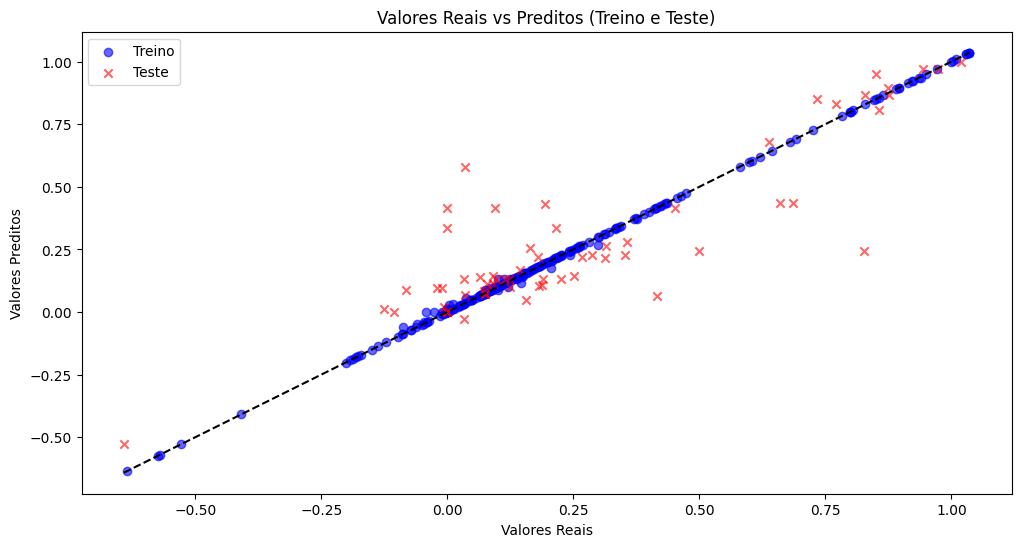

In [ ]:
# Normalização dos dados de onset
scaler_onset = StandardScaler()
X_train_onset_scaled = scaler_onset.fit_transform(X_train_onset)
X_test_onset_scaled = scaler_onset.transform(X_test_onset)

# Melhor modelo para onset
best_params_onset = {'estimator__max_depth': 55, 'learning_rate': 0.7628685097778812, 'n_estimators': 71, 'random_state': 90}

best_base_model_onset = DecisionTreeRegressor(max_depth=best_params_onset['estimator__max_depth'])
best_model_onset = AdaBoostRegressor(estimator=best_base_model_onset,
                                     n_estimators=best_params_onset['n_estimators'],
                                     learning_rate=best_params_onset['learning_rate'],
                                     random_state=best_params_onset['random_state'])

best_model_onset.fit(X_train_onset_scaled, y_train_onset)

# Fazer previsões de onset para todos os dados
X_onset_all_scaled = scaler_onset.transform(X_onset)
onset_predictions = best_model_onset.predict(X_onset_all_scaled)

# Adicionar previsões de onset como uma nova feature para o modelo de potencial de oxidação
X_with_onset = pd.concat([X.reset_index(drop=True), pd.Series(onset_predictions, name='onset_pred')], axis=1)

# Dividir os dados para o modelo de potencial de oxidação
X_train, X_test, y_train, y_test = train_test_split(X_with_onset, y, test_size=0.2, random_state=50)

# Normalização dos dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Melhor modelo para potencial de oxidação
best_params = {'estimator__max_depth': 75, 'learning_rate': 0.9063697846295019, 'n_estimators': 75, 'random_state': 50}

best_base_model = DecisionTreeRegressor(max_depth=best_params['estimator__max_depth'])
best_model = AdaBoostRegressor(estimator=best_base_model,
                               n_estimators=best_params['n_estimators'],
                               learning_rate=best_params['learning_rate'],
                               random_state=best_params['random_state'])

best_model.fit(X_train_scaled, y_train)

# Previsões
y_train_pred = best_model.predict(X_train_scaled)
y_test_pred = best_model.predict(X_test_scaled)

# Avaliar o modelo com as métricas para o conjunto de treino
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

print('Treino:')
print('Mean Absolute Error:', train_mae)
print('Mean Square Error:', train_mse)
print('Root Mean Square Error:', train_rmse)
print('R2 Score:', train_r2)

# Avaliar o modelo com as métricas para o conjunto de teste
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

print('\nTeste:')
print('Mean Absolute Error:', test_mae)
print('Mean Square Error:', test_mse)
print('Root Mean Square Error:', test_rmse)
print('R2 Score:', test_r2)

# Gráfico dos valores reais vs preditos
plt.figure(figsize=(12, 6))

# Treino
plt.scatter(y_train, y_train_pred, color='blue', label='Treino', alpha=0.6, marker='o')
# Teste
plt.scatter(y_test, y_test_pred, color='red', label='Teste', alpha=0.6, marker='x')

# Linha de referência
plt.plot([min(y), max(y)], [min(y), max(y)], color='black', linestyle='--')

plt.xlabel('Valores Reais')
plt.ylabel('Valores Preditos')
plt.title('Valores Reais vs Preditos (Treino e Teste)')
plt.legend()
plt.show()

A saída de streaming foi truncada nas últimas 5000 linhas.
Parameters: n_estimators=100, learning_rate=0.6, estimator__max_depth=3, random_state=70
RMSE: 0.1479
------------------------
Parameters: n_estimators=100, learning_rate=0.6, estimator__max_depth=3, random_state=80
RMSE: 0.1456
------------------------
Parameters: n_estimators=100, learning_rate=0.6, estimator__max_depth=3, random_state=90
RMSE: 0.1411
------------------------
Parameters: n_estimators=100, learning_rate=0.6, estimator__max_depth=3, random_state=100
RMSE: 0.1455
------------------------
Parameters: n_estimators=100, learning_rate=0.6, estimator__max_depth=4, random_state=0
RMSE: 0.1282
------------------------
Parameters: n_estimators=100, learning_rate=0.6, estimator__max_depth=4, random_state=10
RMSE: 0.1260
------------------------
Parameters: n_estimators=100, learning_rate=0.6, estimator__max_depth=4, random_state=20
RMSE: 0.1252
------------------------
Parameters: n_estimators=100, learning_rate=0.6, est

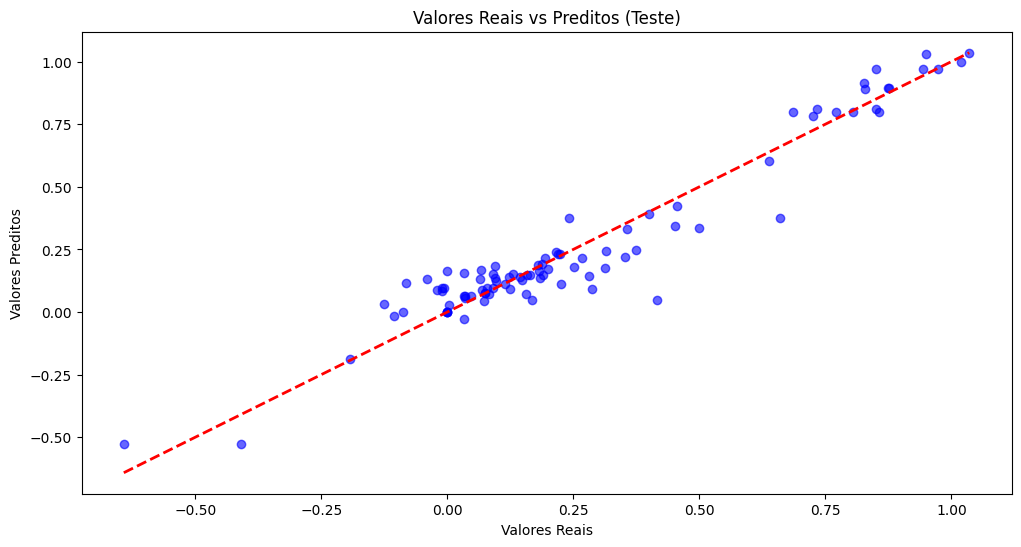

In [ ]:
# Modelo de onset
def train_onset_model(X_onset, y_onset):
    X_train_onset, X_test_onset, y_train_onset, y_test_onset = train_test_split(X_onset, y_onset, test_size=0.2, random_state=50)

    scaler_onset = StandardScaler()
    X_train_onset_scaled = scaler_onset.fit_transform(X_train_onset)
    X_test_onset_scaled = scaler_onset.transform(X_test_onset)

    best_params_onset = {'n_estimators': 9, 'learning_rate': 0.7, 'estimator__max_depth': 9, 'random_state': 60}

    best_base_model_onset = DecisionTreeRegressor(max_depth=best_params_onset['estimator__max_depth'])
    best_model_onset = AdaBoostRegressor(estimator=best_base_model_onset,
                                         n_estimators=best_params_onset['n_estimators'],
                                         learning_rate=best_params_onset['learning_rate'],
                                         random_state=best_params_onset['random_state'])

    best_model_onset.fit(X_train_onset_scaled, y_train_onset)

    return best_model_onset, scaler_onset

# Treinar o modelo de onset
onset_model, onset_scaler = train_onset_model(X_onset, y_onset)

# Fazer previsões de onset para todos os dados
X_onset_all_scaled = onset_scaler.transform(X_onset)
onset_predictions = onset_model.predict(X_onset_all_scaled)

# Adicionar previsões de onset como uma nova feature para o modelo de potencial de oxidação
X_with_onset = pd.concat([X.reset_index(drop=True), pd.Series(onset_predictions, name='onset_pred')], axis=1)

# Dividir os dados para o modelo de potencial de oxidação
X_train, X_test, y_train, y_test = train_test_split(X_with_onset, y, test_size=0.3, random_state=50)

# Normalização dos dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Definir os hiperparâmetros para busca
param_grid = {
    'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5, 0.6, 0.7, 0.8, 1.0],
    'estimator__max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50],
    'random_state': list(range(0, 101, 10))
}

best_rmse = float('inf')
best_params = {}

for n_estimators in param_grid['n_estimators']:
    for learning_rate in param_grid['learning_rate']:
        for max_depth in param_grid['estimator__max_depth']:
            for random_state in param_grid['random_state']:
                estimator = DecisionTreeRegressor(max_depth=max_depth)
                model = AdaBoostRegressor(estimator=estimator, n_estimators=n_estimators,
                                          learning_rate=learning_rate, random_state=random_state)
                model.fit(X_train_scaled, y_train)
                y_pred = model.predict(X_test_scaled)
                rmse = np.sqrt(mean_squared_error(y_test, y_pred))

                if rmse < best_rmse:
                    best_rmse = rmse
                    best_params = {
                        'n_estimators': n_estimators,
                        'learning_rate': learning_rate,
                        'estimator__max_depth': max_depth,
                        'random_state': random_state
                    }
                    print(f"Best_params: n_estimators={n_estimators}, learning_rate={learning_rate}, estimator__max_depth={max_depth}, random_state={random_state}")
                    print(f"RMSE: {rmse:.4f}")
                    print("------------------------")

                print(f"Parameters: n_estimators={n_estimators}, learning_rate={learning_rate}, estimator__max_depth={max_depth}, random_state={random_state}")
                print(f"RMSE: {rmse:.4f}")
                print("------------------------")

# Treinar o modelo final com os melhores parâmetros
best_estimator = DecisionTreeRegressor(max_depth=best_params['estimator__max_depth'])
best_model = AdaBoostRegressor(estimator=best_estimator,
                               n_estimators=best_params['n_estimators'],
                               learning_rate=best_params['learning_rate'],
                               random_state=best_params['random_state'])
best_model.fit(X_train_scaled, y_train)
y_pred = best_model.predict(X_test_scaled)

# Avaliar o modelo final com as métricas
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('Best parameters:', best_params)
print('Mean Absolute Error:', mae)
print('Mean Square Error:', mse)
print('Root Mean Square Error:', rmse)
print('R2 Score:', r2)

# Gráfico dos valores reais vs preditos
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Valores Reais')
plt.ylabel('Valores Preditos')
plt.title('Valores Reais vs Preditos (Teste)')
plt.show()

Métricas de Treino:
MAE: 0.0048
MSE: 0.0002
RMSE: 0.0137
R2: 0.9987

Métricas de Teste:
MAE: 0.0909
MSE: 0.0197
RMSE: 0.1402
R2: 0.8618


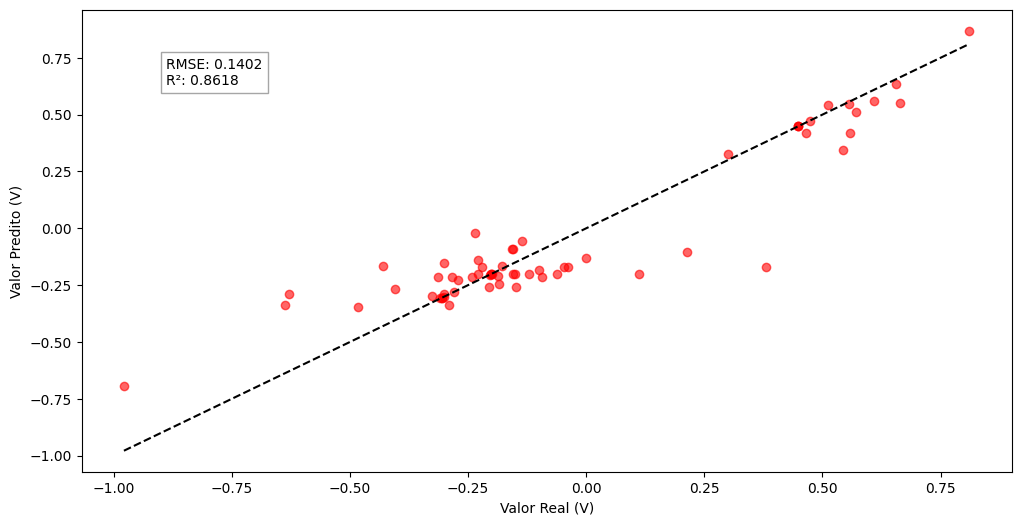

In [ ]:
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

class OxidationPredictor(BaseEstimator, TransformerMixin):
    def __init__(self, base_model=None):
        self.base_model = base_model

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        # Fazer previsões e adicionar como nova feature
        predictions = self.base_model.predict(X)
        # Retornar array com features originais + previsões
        return np.column_stack((X, predictions))

def create_oxidation_onset_pipeline(best_model_ox, X_train_onset, X_test_onset, y_train_onset, y_test_onset):
    """
    Cria uma pipeline que usa as previsões do modelo de oxidação
    como features adicionais para o modelo de onset.

    Parameters:
    -----------
    best_model_ox : modelo treinado de oxidação
    X_train_onset : features de treino para onset
    X_test_onset : features de teste para onset
    y_train_onset : valores alvo de treino para onset
    y_test_onset : valores alvo de teste para onset

    Returns:
    --------
    pipeline, X_train_onset, X_test_onset, y_train_onset, y_test_onset
    """

    # Criar pipeline
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('oxidation_predictor', OxidationPredictor(base_model=best_model_ox)),
        ('onset_model', AdaBoostRegressor(
            DecisionTreeRegressor(max_depth=75),
            n_estimators=75,
            learning_rate=0.9,
            random_state=50
        ))
    ])

    return pipeline, X_train_onset, X_test_onset, y_train_onset, y_test_onset

def evaluate_model(model, X_train_onset, X_test_onset, y_train_onset, y_test_onset):
    """
    Avalia o modelo nos conjuntos de treino e teste.
    """
    # Previsões
    y_train_pred = model.predict(X_train_onset)
    y_test_pred = model.predict(X_test_onset)

    # Métricas de treino
    train_metrics = {
        'MAE': mean_absolute_error(y_train_onset, y_train_pred),
        'MSE': mean_squared_error(y_train_onset, y_train_pred),
        'RMSE': np.sqrt(mean_squared_error(y_train_onset, y_train_pred)),
        'R2': r2_score(y_train_onset, y_train_pred)
    }

    # Métricas de teste
    test_metrics = {
        'MAE': mean_absolute_error(y_test_onset, y_test_pred),
        'MSE': mean_squared_error(y_test_onset, y_test_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test_onset, y_test_pred)),
        'R2': r2_score(y_test_onset, y_test_pred)
    }

    return train_metrics, test_metrics, y_test_pred

# Criar e treinar pipeline
pipeline, X_train_onset, X_test_onset, y_train_onset, y_test_onset = create_oxidation_onset_pipeline(
    best_model_ox, X_train_onset, X_test_onset, y_train_onset, y_test_onset
)
scaler = StandardScaler()
X_train_onset = scaler.fit_transform(X_train_onset)
X_test_onset = scaler.transform(X_test_onset)
# Treinar modelo
pipeline.fit(X_train_onset, y_train_onset)

# Avaliar modelo
train_metrics, test_metrics, y_test_pred = evaluate_model(
    pipeline, X_train_onset, X_test_onset, y_train_onset, y_test_onset
)

# Imprimir resultados
print("Métricas de Treino:")
for metric, value in train_metrics.items():
    print(f"{metric}: {value:.4f}")

print("\nMétricas de Teste:")
for metric, value in test_metrics.items():
    print(f"{metric}: {value:.4f}")

# Plotar resultados
plt.figure(figsize=(12, 6))
plt.scatter(y_test_onset, y_test_pred, color='red', alpha=0.6, marker='o')
plt.plot([y_test_onset.min(), y_test_onset.max()],
         [y_test_onset.min(), y_test_onset.max()],
         color='black', linestyle='--')

metrics_text = f"RMSE: {test_metrics['RMSE']:.4f}\nR²: {test_metrics['R2']:.4f}"
plt.text(x=y_test_onset.min() + (y_test_onset.max() - y_test_onset.min()) * 0.05,
         y=y_test_onset.max() - (y_test_onset.max() - y_test_onset.min()) * 0.1,
         s=metrics_text,
         fontsize=10,
         bbox=dict(facecolor='white', alpha=0.7, edgecolor='gray'))

plt.xlabel('Valor Real (V)')
plt.ylabel('Valor Predito (V)')
plt.show()

In [ ]:
class OxidationPredictor(BaseEstimator, TransformerMixin):
    def __init__(self, base_model=None):
        self.base_model = base_model

    def fit(self, X, y=None):
        # Fit the base_model here if it's not already fitted
        if self.base_model is not None and not hasattr(self.base_model, 'estimators_'):
            self.base_model.fit(X, y)
        return self

    def transform(self, X):
        if self.base_model is None:
            raise ValueError("O modelo base não foi fornecido")
        predictions = self.base_model.predict(X)
        return np.column_stack((X, predictions))

def create_and_optimize_pipeline(X_train_ox, y_train_ox, X_train_onset, X_test_onset, y_train_onset, y_test_onset):
    """
    Cria e otimiza uma pipeline que usa as previsões do modelo de oxidação
    como features adicionais para o modelo de onset.
    """
    # Primeiro, treinar o modelo de oxidação
    best_model_ox = AdaBoostRegressor(
        estimator=DecisionTreeRegressor(),
        n_estimators=100,
        random_state=42
    )
    best_model_ox.fit(X_train_ox, y_train_ox)

    # Definir os parâmetros para busca
    param_grid = {
        'onset_model__random_state': list(range(0, 101, 10)),
        'onset_model__estimator__max_depth': randint(1, 100),
        'onset_model__n_estimators': randint(1, 200),
        'onset_model__learning_rate': uniform(0, 1)
    }

    # Criar pipeline base
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('oxidation_predictor', OxidationPredictor(base_model=best_model_ox)),
        ('onset_model', AdaBoostRegressor(estimator=DecisionTreeRegressor()))
    ])

    # Configurar e executar RandomizedSearchCV
    random_search = RandomizedSearchCV(
        estimator=pipeline,
        param_distributions=param_grid,
        n_iter=1000,
        cv=5,
        n_jobs=-1,
        verbose=1,
        scoring='neg_mean_squared_error'
    )

    # Treinar o modelo
    random_search.fit(X_train_onset, y_train_onset)

    # Imprimir os melhores parâmetros encontrados
    print("\nMelhores parâmetros encontrados:")
    for param, value in random_search.best_params_.items():
        print(f"{param}: {value}")

    return random_search.best_estimator_

def evaluate_model(model, X_train_onset, X_test_onset, y_train_onset, y_test_onset):
    """
    Avalia o modelo nos conjuntos de treino e teste.
    """
    # Previsões
    y_train_pred = model.predict(X_train_onset)
    y_test_pred = model.predict(X_test_onset)

    # Métricas de treino
    train_metrics = {
        'MAE': mean_absolute_error(y_train_onset, y_train_pred),
        'MSE': mean_squared_error(y_train_onset, y_train_pred),
        'RMSE': np.sqrt(mean_squared_error(y_train_onset, y_train_pred)),
        'R2': r2_score(y_train_onset, y_train_pred)
    }

    # Métricas de teste
    test_metrics = {
        'MAE': mean_absolute_error(y_test_onset, y_test_pred),
        'MSE': mean_squared_error(y_test_onset, y_test_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test_onset, y_test_pred)),
        'R2': r2_score(y_test_onset, y_test_pred)
    }

    return train_metrics, test_metrics, y_test_pred

def plot_results(y_test_onset, y_test_pred, test_metrics):
    """
    Plota os resultados do modelo.
    """
    plt.figure(figsize=(12, 6))
    plt.scatter(y_test_onset, y_test_pred, color='red', alpha=0.6, marker='o')
    plt.plot([y_test_onset.min(), y_test_onset.max()],
             [y_test_onset.min(), y_test_onset.max()],
             color='black', linestyle='--')

    metrics_text = f"RMSE: {test_metrics['RMSE']:.4f}\nR²: {test_metrics['R2']:.4f}"
    plt.text(x=y_test_onset.min() + (y_test_onset.max() - y_test_onset.min()) * 0.05,
             y=y_test_onset.max() - (y_test_onset.max() - y_test_onset.min()) * 0.1,
             s=metrics_text,
             fontsize=10,
             bbox=dict(facecolor='white', alpha=0.7, edgecolor='gray'))

    plt.xlabel('Valor Real (V)')
    plt.ylabel('Valor Predito (V)')
    plt.show()

# Exemplo de uso
if __name__ == "__main__":
    # Criar e otimizar pipeline
    best_pipeline = create_and_optimize_pipeline(
        X_train, y_train,  # Dados para treinar o modelo de oxidação
        X_train_onset, X_test_onset, y_train_onset, y_test_onset  # Dados para o modelo de onset
    )

    # Avaliar modelo
    train_metrics, test_metrics, y_test_pred = evaluate_model(
        best_pipeline, X_train_onset, X_test_onset, y_train_onset, y_test_onset
    )

    # Imprimir resultados
    print("\nMétricas de Treino:")
    for metric, value in train_metrics.items():
        print(f"{metric}: {value:.4f}")

    print("\nMétricas de Teste:")
    for metric, value in test_metrics.items():
        print(f"{metric}: {value:.4f}")

    # Plotar resultados
    plot_results(y_test_onset, y_test_pred, test_metrics)

NameError: name 'BaseEstimator' is not defined

## NEW DATA FORECAST

A ideia aqui é pegar "novos dados" que não estão presentes no dataset inicial e escrever um código para prever os potenciais de oxidação (pico e onset).

In [ ]:
# Convert the 'Ox_Onset' column to numeric type
data_features_oxidation['Ox_Onset'] = pd.to_numeric(data_features_oxidation['Ox_Onset'], errors='coerce')

# Calculate the mean of the 'Ox_Onset' column
ox_onset_media = data_features_oxidation['Ox_Onset'].mean()

print(ox_onset_media)

0.34191793039215684


In [ ]:
# O código abaixo itera E1 para diferentes elementos metálicos, mantendo E2, E3 e E4 fixos.

In [ ]:
# Definir o modelo para prever o onset potential
ada_best_onset_model = AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=9), learning_rate=0.7, n_estimators=9, random_state=60)

X_onset = data_features_onset_potential[['rGO', 'E3/4_av', 'OH', 'WE_FTO', 'Ox_Onset', 'WE_CC', 'WE_CF', 'E2_av','E3', 'WE_Au', 'WE_Ni', 'WE_Pt', 'E2', 'E1_av', 'Org', 'WE_GCD', 'WE_SELF', 'A_concentration', 'E4', 'E1', 'G', 'WE_CP', 'WE_GE', 'CNT', 'scan(mV/s)', 'WE_GCE', 'RE', 'El_conc(M)', 'pH', 'Electrolyte']]
y_onset = data_features_onset_potential['Pot_Onset_V (NHE)']

# Escalar os dados
scaler_onset = StandardScaler()
X_onset_scaled = scaler_onset.fit_transform(X_onset)

# Ajustar o modelo
ada_best_onset_model.fit(X_onset_scaled, y_onset)

# Carregar o arquivo elements_properties.csv
elements_properties_path = '/content/data_glycerol/element_properties.csv'  # Ajuste o caminho conforme necessário
elements_df = pd.read_csv(elements_properties_path)

# Função para obter o valor médio (eV) com base no elemento
def get_average_ev(element_number, elements_df):
    # Convert element_number to integer
    element_number = int(element_number)
    # Check if element_number exists in the DataFrame
    if element_number in elements_df['Atomic Number'].values:
        return elements_df.loc[elements_df['Atomic Number'] == element_number, 'Average (eV)'].values[0]
    else:
        # Return a default value (e.g., 0) if element_number is not found
        return 0

ox_onset_media = data_features_oxidation['Ox_Onset'].mean()
# Dicionário de features
features_onset_dict = {
    'rGO': 0,  # rGO está presente
    'OH': 1,
    'WE_FTO': 0,
    'Ox_Onset': ox_onset_media,
    'WE_CC': 0,
    'WE_CF': 0,
    'E3': 0,
    'WE_Au': 0,
    'WE_Ni': 1,
    'WE_Pt': 0,
    'E2': 8,
    'Org': 0,
    'WE_GCD': 0,
    'WE_SELF': 0,
    'A_concentration': 0.3,
    'E4': 0,
    'E1': 46,
    'G': 0,
    'WE_CP': 0,
    'WE_GE': 0,
    'CNT': 0,
    'scan(mV/s)': 100,
    'WE_GCE': 0,
    'RE': 4,
    'El_conc(M)': 2,
    'pH': 12.89,
    'Electrolyte': 5,
}

# Converter a coluna 'Average (eV)' para numérico, substituindo vírgulas por pontos
elements_df['Average (eV)'] = elements_df['Average (eV)'].str.replace(',', '.').astype(float)

# Lista de elementos metálicos presentes em material_acc_new
metal_elements = ['Ag', 'Au', 'Bi', 'Ce', 'Co', 'Cu', 'Fe', 'In', 'Ir', 'La', 'Mg', 'Mn', 'Mo', 'Nb', 'Ni', 'Pb', 'Pd', 'Pt', 'Rh', 'Ru', 'Sn', 'Ta', 'Ti', 'V', 'W', 'Zn']

# Filtrar apenas os elementos metálicos no dataset de propriedades de elementos
metal_elements_df = elements_df[elements_df['Element'].isin(metal_elements)]

# Ordem das features para onset
feature_order_onset = ['rGO', 'E3/4_av', 'OH', 'WE_FTO', 'Ox_Onset', 'WE_CC', 'WE_CF', 'E2_av','E3', 'WE_Au', 'WE_Ni', 'WE_Pt', 'E2', 'E1_av', 'Org', 'WE_GCD', 'WE_SELF', 'A_concentration', 'E4', 'E1', 'G', 'WE_CP', 'WE_GE', 'CNT', 'scan(mV/s)', 'WE_GCE', 'RE', 'El_conc(M)', 'pH', 'Electrolyte']

# Lista para armazenar os resultados
results = []

# Iterar sobre os elementos metálicos e calcular o onset potential
for _, row in metal_elements_df.iterrows():
    E1 = row['Atomic Number']
    features_onset_dict['E1'] = E1
    features_onset_dict['E1_av'] = get_average_ev(E1, elements_df)

    # Calcular E3/4_av e E2_av
    E3_E4_avg = (features_onset_dict['E3'] + features_onset_dict['E4']) / 2
    # Pass E3_E4_avg to get_average_ev instead of calling the function directly in features_onset_dict
    features_onset_dict['E3/4_av'] = get_average_ev(E3_E4_avg, elements_df)

    features_onset_dict['E2_av'] = get_average_ev(features_onset_dict['E2'], elements_df)


    # Organizar as features na ordem correta para onset
    features_onset = pd.DataFrame([features_onset_dict])[feature_order_onset]

    # Escalar as features de onset
    features_onset_scaled = scaler_onset.transform(features_onset)

    # Prever o onset potential
    onset_prediction = ada_best_onset_model.predict(features_onset_scaled)[0]

    # Armazenar o resultado
    results.append((E1, row['Element'], onset_prediction))

# Ordenar os resultados pelo onset potential
results_sorted = sorted(results, key=lambda x: x[2])

# Imprimir os resultados
for result in results_sorted:
    print(f"Elemento: {result[1]}, Número Atômico: {result[0]}, Previsão do Onset Potential: {result[2]:.4f}")

print("\nLista dos menores valores de onset potential previstos:")
for result in results_sorted[:5]:  # Mostrar os 5 menores valores
    print(f"{result[1]}: {result[2]:.4f}")

Elemento: Cu, Número Atômico: 29, Previsão do Onset Potential: -0.3010
Elemento: Ag, Número Atômico: 47, Previsão do Onset Potential: -0.3010
Elemento: Ir, Número Atômico: 77, Previsão do Onset Potential: -0.3010
Elemento: Pt, Número Atômico: 78, Previsão do Onset Potential: -0.3010
Elemento: Pd, Número Atômico: 46, Previsão do Onset Potential: -0.2839
Elemento: Mg, Número Atômico: 12, Previsão do Onset Potential: -0.2810
Elemento: Ti, Número Atômico: 22, Previsão do Onset Potential: -0.2810
Elemento: V, Número Atômico: 23, Previsão do Onset Potential: -0.2810
Elemento: Mn, Número Atômico: 25, Previsão do Onset Potential: -0.2810
Elemento: Fe, Número Atômico: 26, Previsão do Onset Potential: -0.2810
Elemento: Co, Número Atômico: 27, Previsão do Onset Potential: -0.2810
Elemento: Ni, Número Atômico: 28, Previsão do Onset Potential: -0.2810
Elemento: Zn, Número Atômico: 30, Previsão do Onset Potential: -0.2810
Elemento: Nb, Número Atômico: 41, Previsão do Onset Potential: -0.2346
Element